In [1]:
import pandas as pd
import collections
import math
import os

import cv2
import matplotlib.pyplot as plt
import cv2
import sys
import numpy as np
import math
import time
from PIL import Image 

from pandas import read_csv  
import configparser

config = configparser.ConfigParser()
config.read('configKitchen1p.txt')

source_folder = config.get('Configuration', 'source_folder')
time_step = int(config.get('Configuration', 'time_step'))
data_folder = config.get('Configuration', 'data_folder')
ini_date = config.get('Configuration', 'ini_date')
end_date = config.get('Configuration', 'end_date')

window_size = int(config.get('Configuration', 'window_size'))

scenes=config.get('Configuration', 'scenes')
scenes = [(item.strip()) for item in scenes.split(',')]

print(scenes)

users=config.get('Configuration', 'users')
users = [(item.strip()) for item in users.split(',')]

anchors=config.get('Configuration', 'anchors')
anchors = [(item.strip()) for item in anchors.split(',')]

room=config.get('Configuration', 'room')

w = int(config.get(room, 'w'))
h = int(config.get(room, 'h'))

user_color={}
for user in users:
    user_color[user]=config.get('Colors', user)
print(user_color)


['Scene1', 'Scene2', 'Scene3', 'Scene4', 'Scene5', 'Scene6']
{'ed9c': 'red'}


In [2]:
import numpy as np
from pandas import read_csv    
import pandas as pd
import time

from datetime import datetime

off_zone=60*60*2

def day_time(ti):
    return int((int)((ti+off_zone)/(60*60*24)))


def time2str(tt):
    return datetime.fromtimestamp(tt).strftime("%Y-%m-%d %H:%M:%S")


t0 = (int)(datetime.strptime(ini_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (ini_date,"Init date is", t0, "day:",day_time(t0), time2str(t0))

tN = (int)(datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (end_date,"End date is", tN, "day:",day_time(tN), time2str(tN))


def day_time0(ti):
    return day_time(ti)-day_time(t0)+1

def relT(ti):
    return (int)((ti-t0)/time_step)

days=list(range(day_time(t0),day_time(tN)+1))
print(days)

i0=0
ts=list(range(t0,tN,1))
print(i0,ts)
print(len(ts))

2024-03-16 19:51:35 Init date is 1710615095 day: 19798 2024-03-16 19:51:35
2024-03-16 20:46:11 End date is 1710618371 day: 19798 2024-03-16 20:46:11
[19798]
0 [1710615095, 1710615096, 1710615097, 1710615098, 1710615099, 1710615100, 1710615101, 1710615102, 1710615103, 1710615104, 1710615105, 1710615106, 1710615107, 1710615108, 1710615109, 1710615110, 1710615111, 1710615112, 1710615113, 1710615114, 1710615115, 1710615116, 1710615117, 1710615118, 1710615119, 1710615120, 1710615121, 1710615122, 1710615123, 1710615124, 1710615125, 1710615126, 1710615127, 1710615128, 1710615129, 1710615130, 1710615131, 1710615132, 1710615133, 1710615134, 1710615135, 1710615136, 1710615137, 1710615138, 1710615139, 1710615140, 1710615141, 1710615142, 1710615143, 1710615144, 1710615145, 1710615146, 1710615147, 1710615148, 1710615149, 1710615150, 1710615151, 1710615152, 1710615153, 1710615154, 1710615155, 1710615156, 1710615157, 1710615158, 1710615159, 1710615160, 1710615161, 1710615162, 1710615163, 1710615164, 

In [3]:
scene_user = {}
lista_timestamps=[]
for d in days:
    for user in users:
        scene_user[user] = {}
        for s in scenes:
            print(d,source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv")
            try:
                series=read_csv(source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv", sep="\t",parse_dates=True, header=None, names=["time","date","time2","x","y"])
                print(d,series.size,(series["time"].iloc[0],series["time"].iloc[-1]))
                scene_user[user][s] = (series["time"].iloc[0],series["time"].iloc[-1])
                #print("test")
                print(scene_user[user][s])
                #if user=='ed9c':
                lista_timestamps.extend(list(range(scene_user[user][s][0],scene_user[user][s][1],1)))
                #print(lista_timestamps)
                #print("test2")
            except Exception as e:
                print("Not data",e)
                continue
def getScene(t0):
    for user, user_scene in scene_user.items():
        for scene, times in user_scene.items():
            #print(t0,times[0],times[1])
            if(t0>times[0]-window_size/2 and t0<times[1]+window_size/2):
                return scene
    return None

19798 ./data/kitchen/1-person-labelled/Scene1/location_gt_ed9c/19798.location.tsv
19798 1350 (1710615095, 1710615399)
(1710615095, 1710615399)
19798 ./data/kitchen/1-person-labelled/Scene2/location_gt_ed9c/19798.location.tsv
19798 1275 (1710615622, 1710615916)
(1710615622, 1710615916)
19798 ./data/kitchen/1-person-labelled/Scene3/location_gt_ed9c/19798.location.tsv
19798 1345 (1710616574, 1710616872)
(1710616574, 1710616872)
19798 ./data/kitchen/1-person-labelled/Scene4/location_gt_ed9c/19798.location.tsv
19798 1500 (1710617078, 1710617377)
(1710617078, 1710617377)
19798 ./data/kitchen/1-person-labelled/Scene5/location_gt_ed9c/19798.location.tsv
19798 1500 (1710617644, 1710617941)
(1710617644, 1710617941)
19798 ./data/kitchen/1-person-labelled/Scene6/location_gt_ed9c/19798.location.tsv
19798 1620 (1710618066, 1710618371)
(1710618066, 1710618371)


In [4]:
def getFPImg(tt):
    img_path = os.path.join(data_folder+"B", "DAY_" + str(day), "FP." + str(tt) + ".png")
    #print(img_path)
    img = np.array(Image.open(img_path))/255.0
    #print(img)
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    #print(top_pad,bottom_pad,left_pad,right_pad)
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    #print(img_padded)
    # Guardar la imagen sobrescrita
    #Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getFPImg0(tt):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "FP." + str(tt) + ".png")
    #print(img_path)
    img = np.array(Image.open(img_path))/255.0
    #print(img)
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    #print(top_pad,bottom_pad,left_pad,right_pad)
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    #print(img_padded)
    # Guardar la imagen sobrescrita
    Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getGTImg(tt, user):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "GT." + user + "." + str(tt) + ".png")
    img = np.array(Image.open(img_path)) / 255.0

    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)

    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad

    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')

    # Procesamiento adicional: propagación de valores
    h_padded, w_padded = img_padded.shape
    img_propagated = img_padded.copy()  # Crear una copia para no modificar la original durante el proceso

    for x in range(h_padded):
        for y in range(w_padded):
            if img_padded[x, y] > 0:
                max_val = img_padded[x, y] / 2.0  # Calcular la mitad del valor actual
                neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1),(x - 1, y-1), (x + 1, y+1), (x+1, y - 1), (x-1, y + 1)]
                #neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
                for nx, ny in neighbors:
                    if 0 <= nx < h_padded and 0 <= ny < w_padded:
                        img_propagated[nx, ny] = max(img_propagated[nx, ny], max_val)

    # Guardar la imagen sobrescrita
    #Image.fromarray((img_propagated * 255).astype(np.uint8)).save(img_path)

    return img_propagated

#test=getFPImg(1710618646)

#test=getFPImg(1710618646)

In [5]:
ts=lista_timestamps
#ts=list(set(ts))

ts=list(dict.fromkeys(ts))
ts.sort()
#ts=list(set(ts))
ts=ts[:-5]
print(enumerate(ts))
print(ts)
print(len(ts))
XY0={}
rssi0={}
Y0={}

T0_user={}
T0=[]
T1=[]
for day in days:
    anchors_data={}
    for user in users:
        XY0[user]=[]
        rssi0[user]=[]
        Y0[user]=[]
        T0_user[user]=[]


        anchors_data[user]={}
        for anchor in anchors:
            print(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv")
            print(user,anchor)
            series=read_csv(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv", sep="\t",parse_dates=True, header=None, names=["time","d"])
            series=series.values
            anchors_data[user][anchor]=series
            

    for it,tt in enumerate(ts):
        print(it,tt)
        imgX=getFPImg(tt)
        print("imgX",imgX.shape)

        for user in users:
            
            imgY=getGTImg(tt,user)
            #if imgY is None:
            #    continue
            print("user",user,"imgY",imgY.shape)

            dist=[]
            for ixa,anchor in enumerate(anchors):
                #if(len(ts))
                d=anchors_data[user][anchor][it][1]
                #print(len(anchors_data[user][anchor]))
                if(d>0):
                    d=d/10.0
                if(d>1):
                    d=1
                print("\t anchor:",anchor, anchors_data[user][anchor][it], "tt:",tt)
                dist.append(d)

            dist=np.array(dist)
            print("dist:",dist)

            rssi0[user].append(dist.reshape(len(anchors),1))
            XY0[user].append(imgX[:, :, np.newaxis])
            Y0[user].append(imgY[:, :, np.newaxis])
            T0_user[user].append(it)
            T0.append(it)
            T1.append(tt)
print(T0)        
print(T1)        
print(len(T1))
T0=list(dict.fromkeys(T0))
T1=list(dict.fromkeys(T1))
print(T0)        
print(T1)
#print(T0_user)

[1710615095, 1710615096, 1710615097, 1710615098, 1710615099, 1710615100, 1710615101, 1710615102, 1710615103, 1710615104, 1710615105, 1710615106, 1710615107, 1710615108, 1710615109, 1710615110, 1710615111, 1710615112, 1710615113, 1710615114, 1710615115, 1710615116, 1710615117, 1710615118, 1710615119, 1710615120, 1710615121, 1710615122, 1710615123, 1710615124, 1710615125, 1710615126, 1710615127, 1710615128, 1710615129, 1710615130, 1710615131, 1710615132, 1710615133, 1710615134, 1710615135, 1710615136, 1710615137, 1710615138, 1710615139, 1710615140, 1710615141, 1710615142, 1710615143, 1710615144, 1710615145, 1710615146, 1710615147, 1710615148, 1710615149, 1710615150, 1710615151, 1710615152, 1710615153, 1710615154, 1710615155, 1710615156, 1710615157, 1710615158, 1710615159, 1710615160, 1710615161, 1710615162, 1710615163, 1710615164, 1710615165, 1710615166, 1710615167, 1710615168, 1710615169, 1710615170, 1710615171, 1710615172, 1710615173, 1710615174, 1710615175, 1710615176, 1710615177, 171

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061527e+09 1.92500000e+00] tt: 1710615273
	 anchor: a304 [1.71061527e+09 1.86400000e+00] tt: 1710615273
dist: [0.1925 0.1864]
179 1710615274
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061527e+09 1.92500000e+00] tt: 1710615274
	 anchor: a304 [1.71061527e+09 1.86400000e+00] tt: 1710615274
dist: [0.1925 0.1864]
180 1710615275
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061528e+09 -1.00000000e+00] tt: 1710615275
	 anchor: a304 [ 1.71061528e+09 -1.00000000e+00] tt: 1710615275
dist: [-1. -1.]
181 1710615276
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061528e+09 -1.00000000e+00] tt: 1710615276
	 anchor: a304 [ 1.71061528e+09 -1.00000000e+00] tt: 1710615276
dist: [-1. -1.]
182 1710615277
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061528e+09 -1.00000000e+00] tt: 1710615277
	 anchor: a304 [ 1.71061528e+09 -1.00000000e+00] tt: 1710615277
dist: [-1. -1.]
183 1710615278
imgX (8, 8)
user ed9c imgY (8, 

user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061563e+09 -1.00000000e+00] tt: 1710615635
	 anchor: a304 [ 1.71061563e+09 -1.00000000e+00] tt: 1710615635
dist: [-1. -1.]
318 1710615636
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061563e+09 -1.00000000e+00] tt: 1710615636
	 anchor: a304 [ 1.71061563e+09 -1.00000000e+00] tt: 1710615636
dist: [-1. -1.]
319 1710615637
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061563e+09 3.10400000e+00] tt: 1710615637
	 anchor: a304 [1.71061563e+09 2.83300000e+00] tt: 1710615637
dist: [0.3104 0.2833]
320 1710615638
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061564e+09 3.10400000e+00] tt: 1710615638
	 anchor: a304 [1.71061564e+09 2.83300000e+00] tt: 1710615638
dist: [0.3104 0.2833]
321 1710615639
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061564e+09 -1.00000000e+00] tt: 1710615639
	 anchor: a304 [ 1.71061564e+09 -1.00000000e+00] tt: 1710615639
dist: [-1. -1.]
322 1710615640
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor:

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061586e+09 -1.00000000e+00] tt: 1710615859
	 anchor: a304 [ 1.71061586e+09 -1.00000000e+00] tt: 1710615859
dist: [-1. -1.]
542 1710615860
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061586e+09 1.97600000e+00] tt: 1710615860
	 anchor: a304 [1.71061586e+09 3.06700000e+00] tt: 1710615860
dist: [0.1976 0.3067]
543 1710615861
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061586e+09 1.97600000e+00] tt: 1710615861
	 anchor: a304 [1.71061586e+09 3.06700000e+00] tt: 1710615861
dist: [0.1976 0.3067]
544 1710615862
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061586e+09 -1.00000000e+00] tt: 1710615862
	 anchor: a304 [ 1.71061586e+09 -1.00000000e+00] tt: 1710615862
dist: [-1. -1.]
545 1710615863
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061586e+09 1.85900000e+00] tt: 1710615863
	 anchor: a304 [1.71061586e+09 3.39900000e+00] tt: 1710615863
dist: [0.1859 0.3399]
546 1710615864
imgX (8, 8)
user ed9c imgY (8

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061663e+09 2.11200000e+00] tt: 1710616638
	 anchor: a304 [1.71061663e+09 1.73700000e+00] tt: 1710616638
dist: [0.2112 0.1737]
663 1710616639
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061663e+09 2.11200000e+00] tt: 1710616639
	 anchor: a304 [1.71061663e+09 1.73700000e+00] tt: 1710616639
dist: [0.2112 0.1737]
664 1710616640
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061663e+09 -1.00000000e+00] tt: 1710616640
	 anchor: a304 [ 1.71061663e+09 -1.00000000e+00] tt: 1710616640
dist: [-1. -1.]
665 1710616641
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061664e+09 -1.00000000e+00] tt: 1710616641
	 anchor: a304 [ 1.71061664e+09 -1.00000000e+00] tt: 1710616641
dist: [-1. -1.]
666 1710616642
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061664e+09 -1.00000000e+00] tt: 1710616642
	 anchor: a304 [ 1.71061664e+09 -1.00000000e+00] tt: 1710616642
dist: [-1. -1.]
667 1710616643
imgX (8, 8)
user ed9c imgY (8, 

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061686e+09 2.42600000e+00] tt: 1710616868
	 anchor: a304 [1.71061686e+09 2.65100000e+00] tt: 1710616868
dist: [0.2426 0.2651]
893 1710616869
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061686e+09 2.41200000e+00] tt: 1710616869
	 anchor: a304 [1.71061686e+09 2.60800000e+00] tt: 1710616869
dist: [0.2412 0.2608]
894 1710616870
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061686e+09 2.41200000e+00] tt: 1710616870
	 anchor: a304 [1.71061686e+09 2.60800000e+00] tt: 1710616870
dist: [0.2412 0.2608]
895 1710616871
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061686e+09 2.43000000e+00] tt: 1710616871
	 anchor: a304 [1.71061686e+09 2.66500000e+00] tt: 1710616871
dist: [0.243  0.2665]
896 1710617078
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061687e+09 2.43000000e+00] tt: 1710617078
	 anchor: a304 [1.71061687e+09 2.65100000e+00] tt: 1710617078
dist: [0.243  0.2651]
897 1710617079
imgX (8, 8)
user ed9c img

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061716e+09 2.48700000e+00] tt: 1710617164
	 anchor: a304 [1.71061716e+09 1.75600000e+00] tt: 1710617164
dist: [0.2487 0.1756]
983 1710617165
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061716e+09 2.48700000e+00] tt: 1710617165
	 anchor: a304 [1.71061716e+09 1.75600000e+00] tt: 1710617165
dist: [0.2487 0.1756]
984 1710617166
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061716e+09 -1.00000000e+00] tt: 1710617166
	 anchor: a304 [ 1.71061716e+09 -1.00000000e+00] tt: 1710617166
dist: [-1. -1.]
985 1710617167
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061716e+09 -1.00000000e+00] tt: 1710617167
	 anchor: a304 [ 1.71061716e+09 -1.00000000e+00] tt: 1710617167
dist: [-1. -1.]
986 1710617168
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061716e+09 -1.00000000e+00] tt: 1710617168
	 anchor: a304 [ 1.71061716e+09 -1.00000000e+00] tt: 1710617168
dist: [-1. -1.]
987 1710617169
imgX (8, 8)
user ed9c imgY (8, 

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061768e+09 1.78400000e+00] tt: 1710617688
	 anchor: a304 [1.71061768e+09 2.40700000e+00] tt: 1710617688
dist: [0.1784 0.2407]
1240 1710617689
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061768e+09 -1.00000000e+00] tt: 1710617689
	 anchor: a304 [ 1.71061768e+09 -1.00000000e+00] tt: 1710617689
dist: [-1. -1.]
1241 1710617690
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061768e+09 -1.00000000e+00] tt: 1710617690
	 anchor: a304 [ 1.71061768e+09 -1.00000000e+00] tt: 1710617690
dist: [-1. -1.]
1242 1710617691
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061768e+09 -1.00000000e+00] tt: 1710617691
	 anchor: a304 [ 1.71061768e+09 -1.00000000e+00] tt: 1710617691
dist: [-1. -1.]
1243 1710617692
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061768e+09 -1.00000000e+00] tt: 1710617692
	 anchor: a304 [ 1.71061768e+09 -1.00000000e+00] tt: 1710617692
dist: [-1. -1.]
1244 1710617693
imgX (8, 8)
user ed9c imgY (

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061775e+09 -1.00000000e+00] tt: 1710617759
	 anchor: a304 [ 1.71061775e+09 -1.00000000e+00] tt: 1710617759
dist: [-1. -1.]
1311 1710617760
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061775e+09 -1.00000000e+00] tt: 1710617760
	 anchor: a304 [ 1.71061775e+09 -1.00000000e+00] tt: 1710617760
dist: [-1. -1.]
1312 1710617761
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061775e+09 -1.00000000e+00] tt: 1710617761
	 anchor: a304 [ 1.71061775e+09 -1.00000000e+00] tt: 1710617761
dist: [-1. -1.]
1313 1710617762
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061775e+09 2.11700000e+00] tt: 1710617762
	 anchor: a304 [1.71061775e+09 1.81700000e+00] tt: 1710617762
dist: [0.2117 0.1817]
1314 1710617763
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061775e+09 2.11700000e+00] tt: 1710617763
	 anchor: a304 [1.71061775e+09 1.81700000e+00] tt: 1710617763
dist: [0.2117 0.1817]
1315 1710617764
imgX (8, 8)
user ed9c imgY

user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061815e+09 2.52900000e+00] tt: 1710618163
	 anchor: a304 [1.71061815e+09 2.24300000e+00] tt: 1710618163
dist: [0.2529 0.2243]
1590 1710618164
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061815e+09 -1.00000000e+00] tt: 1710618164
	 anchor: a304 [ 1.71061815e+09 -1.00000000e+00] tt: 1710618164
dist: [-1. -1.]
1591 1710618165
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061815e+09 -1.00000000e+00] tt: 1710618165
	 anchor: a304 [ 1.71061815e+09 -1.00000000e+00] tt: 1710618165
dist: [-1. -1.]
1592 1710618166
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061815e+09 -1.00000000e+00] tt: 1710618166
	 anchor: a304 [ 1.71061815e+09 -1.00000000e+00] tt: 1710618166
dist: [-1. -1.]
1593 1710618167
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061815e+09 2.53800000e+00] tt: 1710618167
	 anchor: a304 [1.71061815e+09 2.28500000e+00] tt: 1710618167
dist: [0.2538 0.2285]
1594 1710618168
imgX (8, 8)
user ed9c imgY (8, 8)
	 an

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061822e+09 -1.00000000e+00] tt: 1710618233
	 anchor: a304 [ 1.71061822e+09 -1.00000000e+00] tt: 1710618233
dist: [-1. -1.]
1660 1710618234
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061822e+09 -1.00000000e+00] tt: 1710618234
	 anchor: a304 [ 1.71061822e+09 -1.00000000e+00] tt: 1710618234
dist: [-1. -1.]
1661 1710618235
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061822e+09 1.33500000e+00] tt: 1710618235
	 anchor: a304 [1.71061822e+09 3.17900000e+00] tt: 1710618235
dist: [0.1335 0.3179]
1662 1710618236
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061822e+09 1.33500000e+00] tt: 1710618236
	 anchor: a304 [1.71061822e+09 3.17900000e+00] tt: 1710618236
dist: [0.1335 0.3179]
1663 1710618237
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061822e+09 -1.00000000e+00] tt: 1710618237
	 anchor: a304 [ 1.71061822e+09 -1.00000000e+00] tt: 1710618237
dist: [-1. -1.]
1664 1710618238
imgX (8, 8)
user ed9c imgY

In [6]:
for user in users:
    XY0[user]=np.array(XY0[user])
    rssi0[user]=np.array(rssi0[user])
    Y0[user]=np.array(Y0[user])
T0=np.array(T0)
print(T0)
print(len(T0))
#print(XY0.shape)
#frame0=np.median(XY0, axis=(0)).astype(np.uint8)
#for i in range(0,XY0.shape[0]):
#    XY0[i]=XY0[i]-frame0
#print(XY0.shape)

[   0    1    2 ... 1789 1790 1791]
1792


In [7]:
minT=np.min(T0)
maxT=np.max(T0)

print(T0)
print(len(T0))
print(minT)
print(maxT)

print(T1)
print(len(T1))

[   0    1    2 ... 1789 1790 1791]
1792
0
1791
[1710615095, 1710615096, 1710615097, 1710615098, 1710615099, 1710615100, 1710615101, 1710615102, 1710615103, 1710615104, 1710615105, 1710615106, 1710615107, 1710615108, 1710615109, 1710615110, 1710615111, 1710615112, 1710615113, 1710615114, 1710615115, 1710615116, 1710615117, 1710615118, 1710615119, 1710615120, 1710615121, 1710615122, 1710615123, 1710615124, 1710615125, 1710615126, 1710615127, 1710615128, 1710615129, 1710615130, 1710615131, 1710615132, 1710615133, 1710615134, 1710615135, 1710615136, 1710615137, 1710615138, 1710615139, 1710615140, 1710615141, 1710615142, 1710615143, 1710615144, 1710615145, 1710615146, 1710615147, 1710615148, 1710615149, 1710615150, 1710615151, 1710615152, 1710615153, 1710615154, 1710615155, 1710615156, 1710615157, 1710615158, 1710615159, 1710615160, 1710615161, 1710615162, 1710615163, 1710615164, 1710615165, 1710615166, 1710615167, 1710615168, 1710615169, 1710615170, 1710615171, 1710615172, 1710615173, 171

In [8]:
XYT=[]
rssiT=[]
YT=[]

TA=int(window_size/2)
TB=int(window_size/2)

T=window_size

S=[]
for user in users:
    print("Usuario ",user)
    for t in range(minT+TA,maxT-TB):

        
        tt=T1[t]
        scene=getScene(tt)
        
        print("Scene",scene,tt,t)
        if not scene:
            continue

        subW=list(range(t-TA,t+TB))
        print("subW:",subW, "t:",t)
        if not (set(subW).intersection(set(T0)) == set(subW)):
            print("Not data for sliding window!",t)
            continue

        #print("rssi0[t-T:t+T]",rssi0[t-T:t+T].flatten())
        if(all(map(lambda x: x == -1, rssi0[user][t-TA:t].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == -1, rssi0[user][t:t+TB].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == 0, Y0[user][t].flatten()))):
            print("Distance 0 for Y0 in t!",t)
            continue


        if(XY0[user][t-TA:t+TB].shape[0]!=T):
            print("#",XY0[user][t-TA:t+TB].shape)
            continue
        if(rssi0[user][t-TA:t+TB].shape[0]!=T):
            print("@",rssi0[user][t-TA:t+TB].shape)
            continue

        XYT.append(XY0[user][t-TA:t+TB])
        rssiT.append(rssi0[user][t-TA:t+TB])
        YT.append(Y0[user][t])
        S.append(scene)
        #print(S)
#print(S)
XYT=np.array(XYT)
rssiT=np.array(rssiT)
YT=np.array(YT)    
S=np.array(S)    
print(XYT.shape)
print(rssiT.shape)
print(YT.shape)


Usuario  ed9c
Scene Scene1 1710615097 2
subW: [0, 1, 2, 3] t: 2
Distance -1 for RSSI in sliding window! 2
Scene Scene1 1710615098 3
subW: [1, 2, 3, 4] t: 3
Distance -1 for RSSI in sliding window! 3
Scene Scene1 1710615099 4
subW: [2, 3, 4, 5] t: 4
Scene Scene1 1710615100 5
subW: [3, 4, 5, 6] t: 5
Scene Scene1 1710615101 6
subW: [4, 5, 6, 7] t: 6
Scene Scene1 1710615102 7
subW: [5, 6, 7, 8] t: 7
Scene Scene1 1710615103 8
subW: [6, 7, 8, 9] t: 8
Scene Scene1 1710615104 9
subW: [7, 8, 9, 10] t: 9
Scene Scene1 1710615105 10
subW: [8, 9, 10, 11] t: 10
Scene Scene1 1710615106 11
subW: [9, 10, 11, 12] t: 11
Scene Scene1 1710615107 12
subW: [10, 11, 12, 13] t: 12
Scene Scene1 1710615108 13
subW: [11, 12, 13, 14] t: 13
Scene Scene1 1710615109 14
subW: [12, 13, 14, 15] t: 14
Scene Scene1 1710615110 15
subW: [13, 14, 15, 16] t: 15
Scene Scene1 1710615111 16
subW: [14, 15, 16, 17] t: 16
Scene Scene1 1710615112 17
subW: [15, 16, 17, 18] t: 17
Scene Scene1 1710615113 18
subW: [16, 17, 18, 19] t: 18


Scene Scene2 1710615897 579
subW: [577, 578, 579, 580] t: 579
Distance -1 for RSSI in sliding window! 579
Scene Scene2 1710615898 580
subW: [578, 579, 580, 581] t: 580
Scene Scene2 1710615899 581
subW: [579, 580, 581, 582] t: 581
Distance -1 for RSSI in sliding window! 581
Scene Scene2 1710615900 582
subW: [580, 581, 582, 583] t: 582
Scene Scene2 1710615901 583
subW: [581, 582, 583, 584] t: 583
Distance -1 for RSSI in sliding window! 583
Scene Scene2 1710615902 584
subW: [582, 583, 584, 585] t: 584
Distance -1 for RSSI in sliding window! 584
Scene Scene2 1710615903 585
subW: [583, 584, 585, 586] t: 585
Distance -1 for RSSI in sliding window! 585
Scene Scene2 1710615904 586
subW: [584, 585, 586, 587] t: 586
Distance -1 for RSSI in sliding window! 586
Scene Scene2 1710615905 587
subW: [585, 586, 587, 588] t: 587
Scene Scene2 1710615906 588
subW: [586, 587, 588, 589] t: 588
Distance -1 for RSSI in sliding window! 588
Scene Scene2 1710615907 589
subW: [587, 588, 589, 590] t: 589
Distance -

In [9]:
import matplotlib.pyplot as plt

L=20

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(L, 2, figsize=(200, 200))


for k in range(0,L):
    mpAll=XY0[users[0]][k].reshape(w,h)

    axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
    axes[k,0].set_title('All players (last frame)')
    axes[k,0].axis('off')

    mpOne=Y0[users[0]][k].reshape(w,h)

    axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
    axes[k,1].set_title('True (last frame) of player')
    axes[k,1].axis('off')

    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [10]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Softmax,Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.losses import mean_squared_error

from keras import backend as K

from sklearn.model_selection import KFold

from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Multiply,MaxPooling3D, ConvLSTM1D, Lambda, Dot,Reshape,Multiply, Input, Conv1D, Conv2D, ConvLSTM2D,ReLU,UpSampling2D, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D, Concatenate
from tensorflow.keras.models import Model, Sequential

from keras import backend as K
import math

from tensorflow.keras.losses import CategoricalCrossentropy

import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Conv2DTranspose

In [11]:
#MODELO A

K=len(anchors)
print(K)
print(T)
rssi = Input(shape=(T,K,1))
print(rssi)

encoded_rssi = ConvLSTM1D(filters=16, kernel_size=3, activation='relu', padding='same', return_sequences=True, input_shape=(None, K, 1))(rssi)
encoded_rssi = MaxPooling2D(pool_size=(2, 1), strides=(2, 1))(encoded_rssi)
encoded_rssi = ConvLSTM1D(filters=32, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)
print("encoded_rssi",encoded_rssi.shape)
print("encoded_rssi max pool",encoded_rssi.shape)
encoded_rssi = ConvLSTM1D(filters=64, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)


print("lstm",encoded_rssi.shape)
#encoded_rssi=Reshape((T,1,1,128))(encoded_rssi)


N=w
M=h

xy = Input(shape=(T,N,M,1))
print(xy)


#LayerNormalization
encoded= ConvLSTM2D(16 , 3,return_sequences=True, padding='same')(xy)
print(encoded.shape)
encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(2, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(32 , 3,return_sequences=True, strides=(2, 2) , padding='same')(encoded)
print(encoded.shape)
#encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(1, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(64 , 3,return_sequences=False, strides=(2, 2), padding='same')(encoded)




rssi_lstm_flattened = Flatten()(encoded_rssi)
xy_lstm_flattened = Flatten()(encoded)

# Fusión de características


print(rssi_lstm_flattened.shape)
print(xy_lstm_flattened.shape)

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])
reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

autoencoder = Model([xy,rssi], conv2dtranspose2)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
#autoencoder.compile(optimizer=Adam(learning_rate=0.001),
#              loss=CategoricalCrossentropy(),
#              metrics=['accuracy'])

print(encoded)
autoencoder.save("model0.h5")
autoencoder.summary()


2
4
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 2, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
encoded_rssi (None, 2, 2, 32)
encoded_rssi max pool (None, 2, 2, 32)
lstm (None, 2, 2, 64)
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
(None, 4, 8, 8, 16)
(None, 2, 8, 8, 16)
(None, 2, 4, 4, 32)
(None, 2, 4, 4, 32)
(None, 256)
(None, 256)
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2, 64), dtype=tf.float32, name=None), name='conv_lstm2d_2/strided_slice_2:0', description="created by layer 'conv_lstm2d_2'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
             

C:\Users\Usuario\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
#MODELO SOLO LSTM

# Rama secuencial
K=len(anchors)

rssi_input = Input(shape=(T, K, 1))
rssi_flattened = TimeDistributed(Flatten())(rssi_input)
rssi_lstm = LSTM(units=256, return_sequences=False)(rssi_flattened)

N=w
M=h

xy_input = Input(shape=(T, N, M, 1))
xy_flattened = TimeDistributed(Flatten())(xy_input)
xy_lstm1 = LSTM(units=256, return_sequences=True)(xy_flattened)  # Mayor capacidad
xy_lstm2 = LSTM(units=256, return_sequences=False)(xy_lstm1)  # Segunda capa LSTM

print(xy_lstm2)

# Aplastando las salidas para que puedan ser concatenadas
rssi_lstm_flattened = Flatten()(rssi_lstm)
xy_lstm_flattened = Flatten()(xy_lstm2)

# Fusión de características

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])
reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

# Modelo
model = Model(inputs=[xy_input, rssi_input], outputs=conv2dtranspose2)

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

model.save("model1.h5")
model.summary()



KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_2/PartitionedCall:0', description="created by layer 'lstm_2'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
                                                                                                  
 time_distributed_1 (TimeDi  (None, 4, 64)                0         ['input_4[0][0]']             
 stributed)                                                                                       
                                   

In [13]:
#MODELO LIGERO: LSTM+CONV+LSTM

# Rama secuencial
K=len(anchors)
print(K)

rssi = Input(shape=(T,K,1))
print(rssi)
lstm1=TimeDistributed(Flatten())(rssi)

lstm_out = LSTM(units=256)(lstm1)
print("LSTM",lstm_out)

N=w
M=h

print(w,h)

xy = Input(shape=(T,N,M,1))
print(xy)

conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(xy)
conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(conv1)
conv_out = TimeDistributed(Flatten())(conv2)
print("CONV",conv_out)

lstm2= LSTM(units=128,return_sequences=True)(conv_out)
lstm2=LSTM(units=256,return_sequences=False)(lstm2)
lstm2_out=Flatten()(lstm2)
print(lstm_out.shape)
print(lstm2_out.shape)

# Fusión de características

merged = Concatenate()([lstm_out, lstm2_out])
reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)


# Modelo
model = Model(inputs=[xy, rssi], outputs=conv2dtranspose2)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 

model.save("model2.h5")
model.summary()

2
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 2, 1), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
LSTM KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_3/PartitionedCall:0', description="created by layer 'lstm_3'")
8 8
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
CONV KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4096), dtype=tf.float32, name=None), name='time_distributed_3/Reshape_1:0', description="created by layer 'time_distributed_3'")
(None, 256)
(None, 256)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
           

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def transformer_encoder_rssi(inputs, head_size=128, num_heads=4, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for RSSI data (T, K, 1).
    Applies attention over K (RSSI sources) for each timestep.
    """
    # Project to head_size
    x = Dense(head_size)(inputs)

    # Multi-head self-attention over K
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(x, x)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)

    # Layer Normalization + Residual
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res


# ---------------------- Transformer for XY (T, N, M, 1) ---------------------- #
def transformer_encoder_xy(inputs, head_size=128, num_heads=8, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for Spatial XY data (T, N, M, 1).
    Applies self-attention over spatial locations (N*M) per timestep.
    """
    _, T, N, M, C = inputs.shape  # ✅ Unpack correctly

    # Reshape spatial grid (N, M) → (N*M) for attention using Keras Reshape
    reshaped_inputs = Reshape((T, N * M, C))(inputs)  # ✅ Corrected

    # Multi-head self-attention over (N*M) locations
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(reshaped_inputs, reshaped_inputs)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + reshaped_inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(C)(x)

    # Layer Normalization + Reshape back to (T, N, M, 1)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Reshape((T, N, M, C))(x + res)  # ✅ Corrected


# ---------------------- Model Definition ---------------------- #
# Input Shapes

# RSSI Input
rssi = Input(shape=(T, K, 1))
encoded_rssi = transformer_encoder_rssi(rssi)  # Output: (T, K, 1)
encoded_rssi = Flatten()(encoded_rssi)  # Flatten for merging
encoded_rssi = Dense(256, activation='relu')(encoded_rssi)

# Spatial XY Input
xy = Input(shape=(T, N, M, 1))
encoded_xy = transformer_encoder_xy(xy)  # Output: (T, N, M, 1)
encoded_xy = Flatten()(encoded_xy)  # Flatten for merging
encoded_xy = Dense(256, activation='relu')(encoded_xy)

# Merge Encoded Features
merged = Concatenate()([encoded_rssi, encoded_xy])
reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)



output = conv2dtranspose2

# Define Model
transf1 = Model(inputs=[xy, rssi], outputs=output)

# Compile
transf1.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 
transf1.summary()

transf1.save("transf1.h5")


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
                                                                                                  
 reshape_3 (Reshape)         (None, 4, 64, 1)             0         ['input_8[0][0]']             
                                                                                                  
 dense (Dense)               (None, 4, 2, 128)            256       ['input_7[0][0]']             
                                                                                            

                                                                                                  
Total params: 691082 (2.64 MB)
Trainable params: 691082 (2.64 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [15]:
def plotting(XYT_test,YT_test,YT_prediction):
    K=5
    off=3

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[k+off][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[k+off][T-1]
        mpOne=YT_test[k+off].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[k+off].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

In [16]:
def plottingRandom(XYT_test,YT_test,YT_prediction):
    K=5
    ks=np.random.randint(0, len(test_indices), K)

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[ks[k]][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[ks[k]][T-1]
        mpOne=YT_test[ks[k]].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[ks[k]].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

['Scene1' 'Scene2' 'Scene3' 'Scene4' 'Scene5' 'Scene6']
Para esta ejecución se han seleccionada las escenas: 
['Scene1' 'Scene2' 'Scene3' 'Scene4' 'Scene5' 'Scene6']
MODELO model0 - ESCENA Scene1
Epoch 1/50
39/39 [==============================] - 7s 49ms/step - loss: 0.0367 - mse: 0.0367 - mae: 0.1069 - val_loss: 0.0348 - val_mse: 0.0348 - val_mae: 0.1223
Epoch 2/50
39/39 [==============================] - 1s 26ms/step - loss: 0.0304 - mse: 0.0304 - mae: 0.1070 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.1035
Epoch 3/50
39/39 [==============================] - 1s 29ms/step - loss: 0.0285 - mse: 0.0285 - mae: 0.0976 - val_loss: 0.0315 - val_mse: 0.0315 - val_mae: 0.0991
Epoch 4/50
39/39 [==============================] - 1s 27ms/step - loss: 0.0261 - mse: 0.0261 - mae: 0.0923 - val_loss: 0.0318 - val_mse: 0.0318 - val_mae: 0.0977
Epoch 5/50
39/39 [==============================] - 1s 29ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.0860 - val_loss: 0.0296 - val_mse: 0.0296 - val_m

Epoch 50/50
4/4 [==============================] - 1s 11ms/step


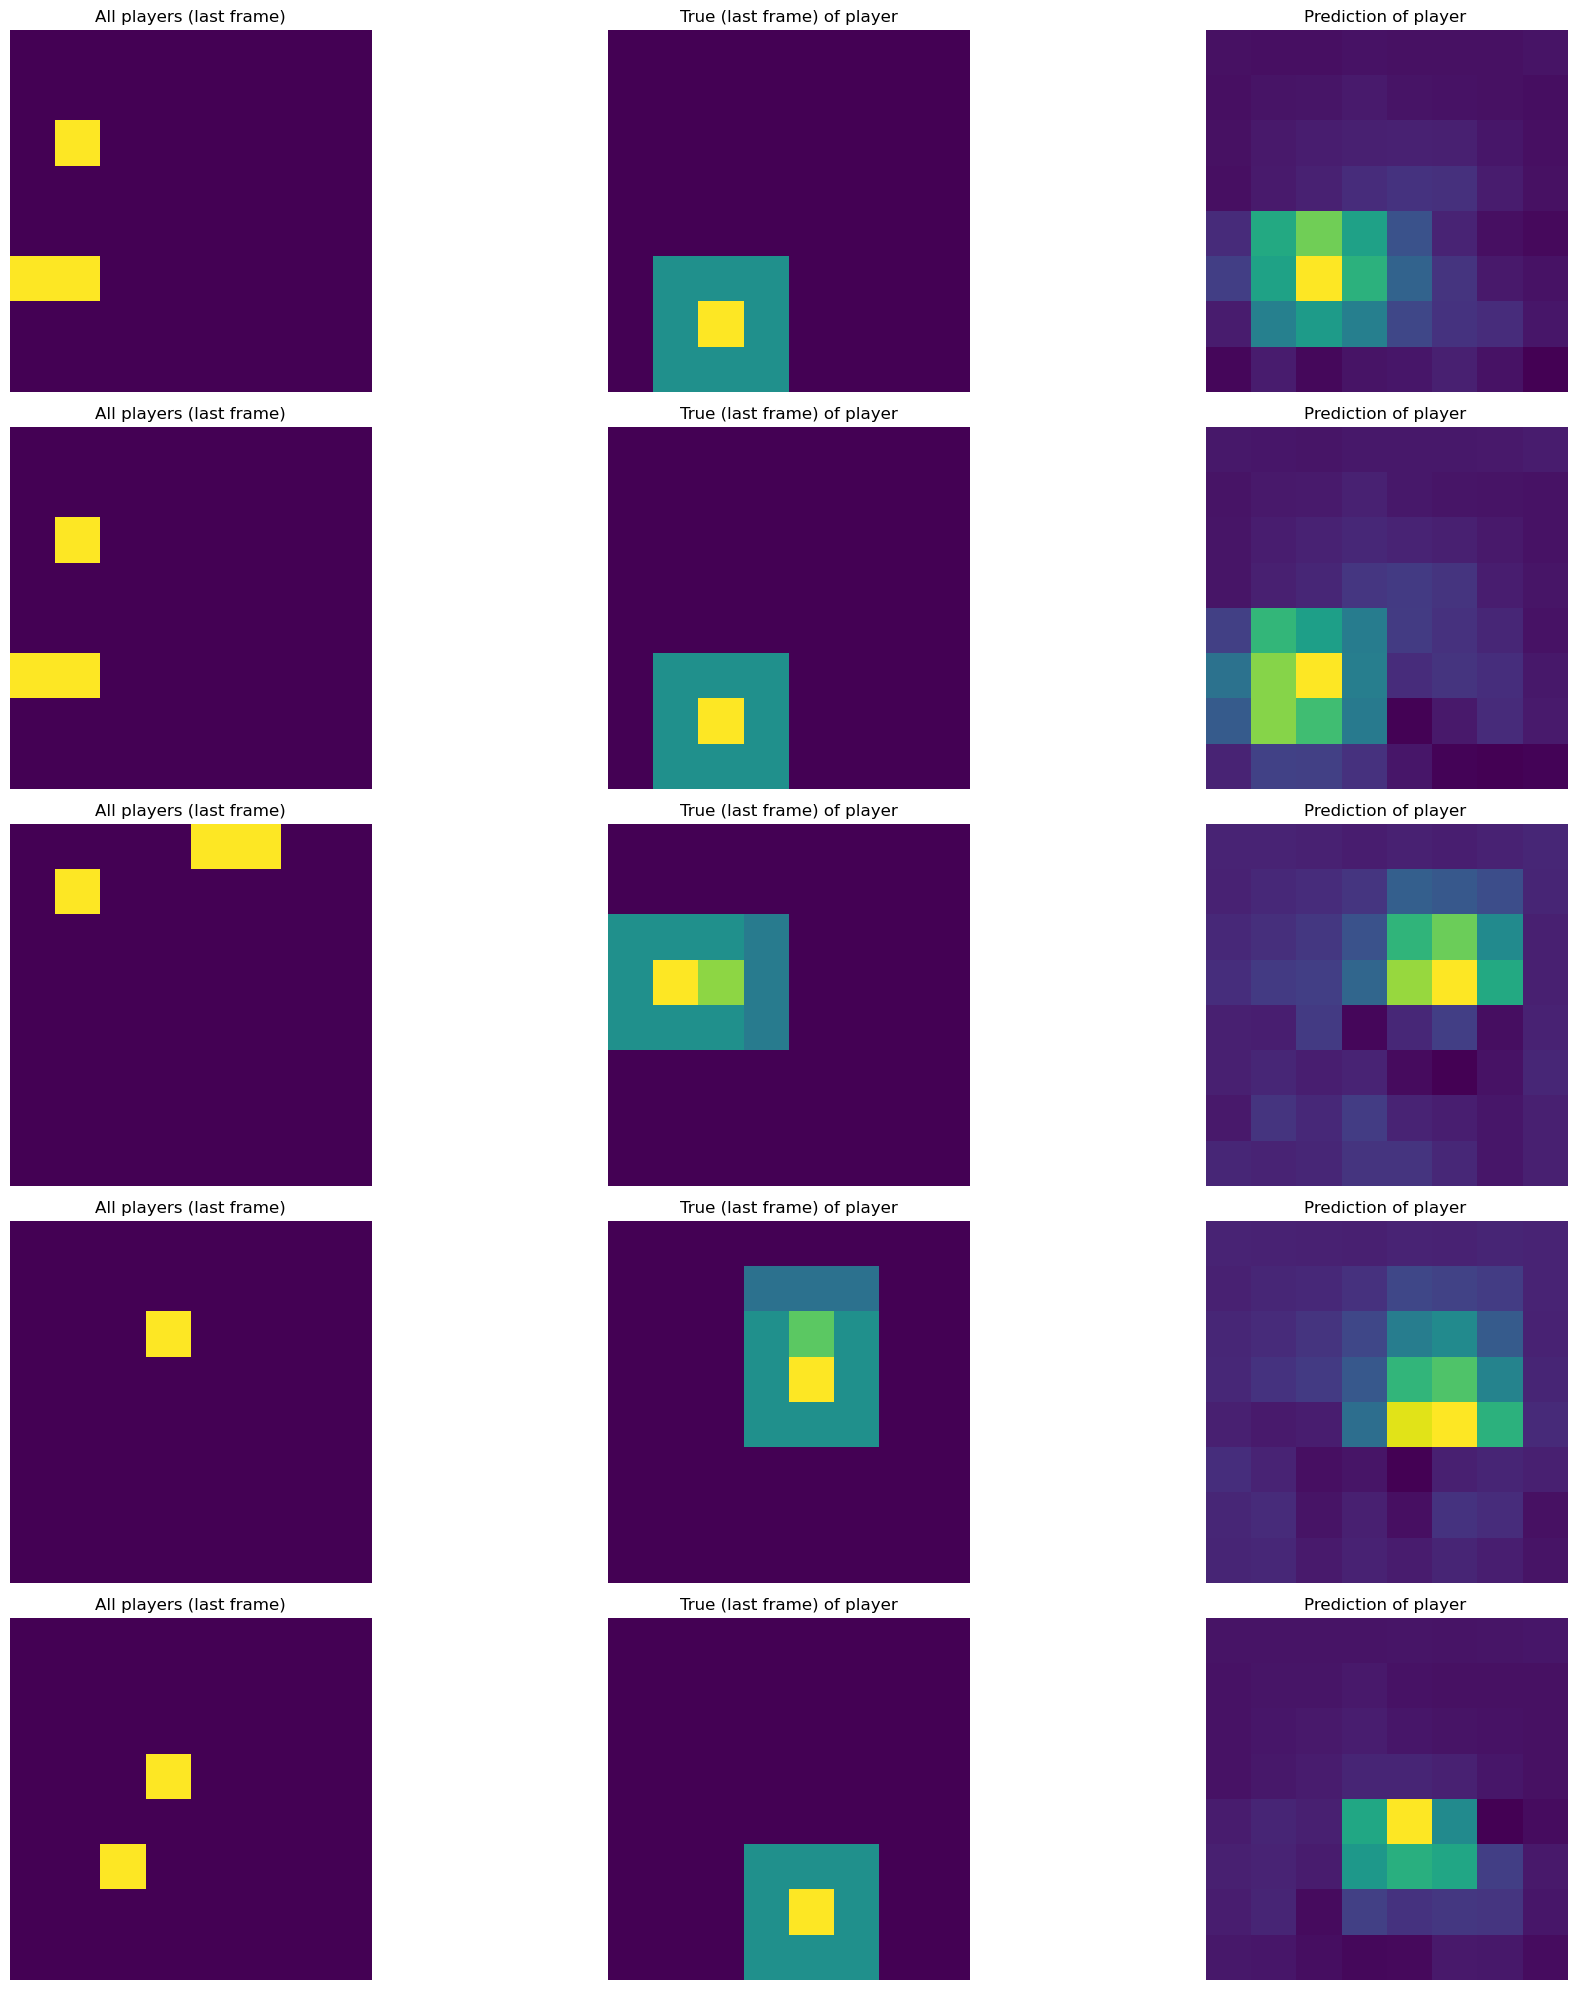

MODELO model1 - ESCENA Scene1
Epoch 1/50
39/39 [==============================] - 3s 32ms/step - loss: 0.0326 - mse: 0.0326 - mae: 0.0985 - val_loss: 0.0309 - val_mse: 0.0309 - val_mae: 0.1049
Epoch 2/50
39/39 [==============================] - 1s 16ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.0873 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae: 0.0934
Epoch 3/50
39/39 [==============================] - 1s 16ms/step - loss: 0.0220 - mse: 0.0220 - mae: 0.0787 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.0944
Epoch 4/50
39/39 [==============================] - 1s 16ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0785 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.0926
Epoch 5/50
39/39 [==============================] - 1s 16ms/step - loss: 0.0212 - mse: 0.0212 - mae: 0.0758 - val_loss: 0.0329 - val_mse: 0.0329 - val_mae: 0.0958
Epoch 6/50
39/39 [==============================] - 1s 16ms/step - loss: 0.0209 - mse: 0.0209 - mae: 0.0757 - val_loss: 0.0330 - val_mse: 0.0330 - val_mae:

4/4 [==============================] - 1s 7ms/step


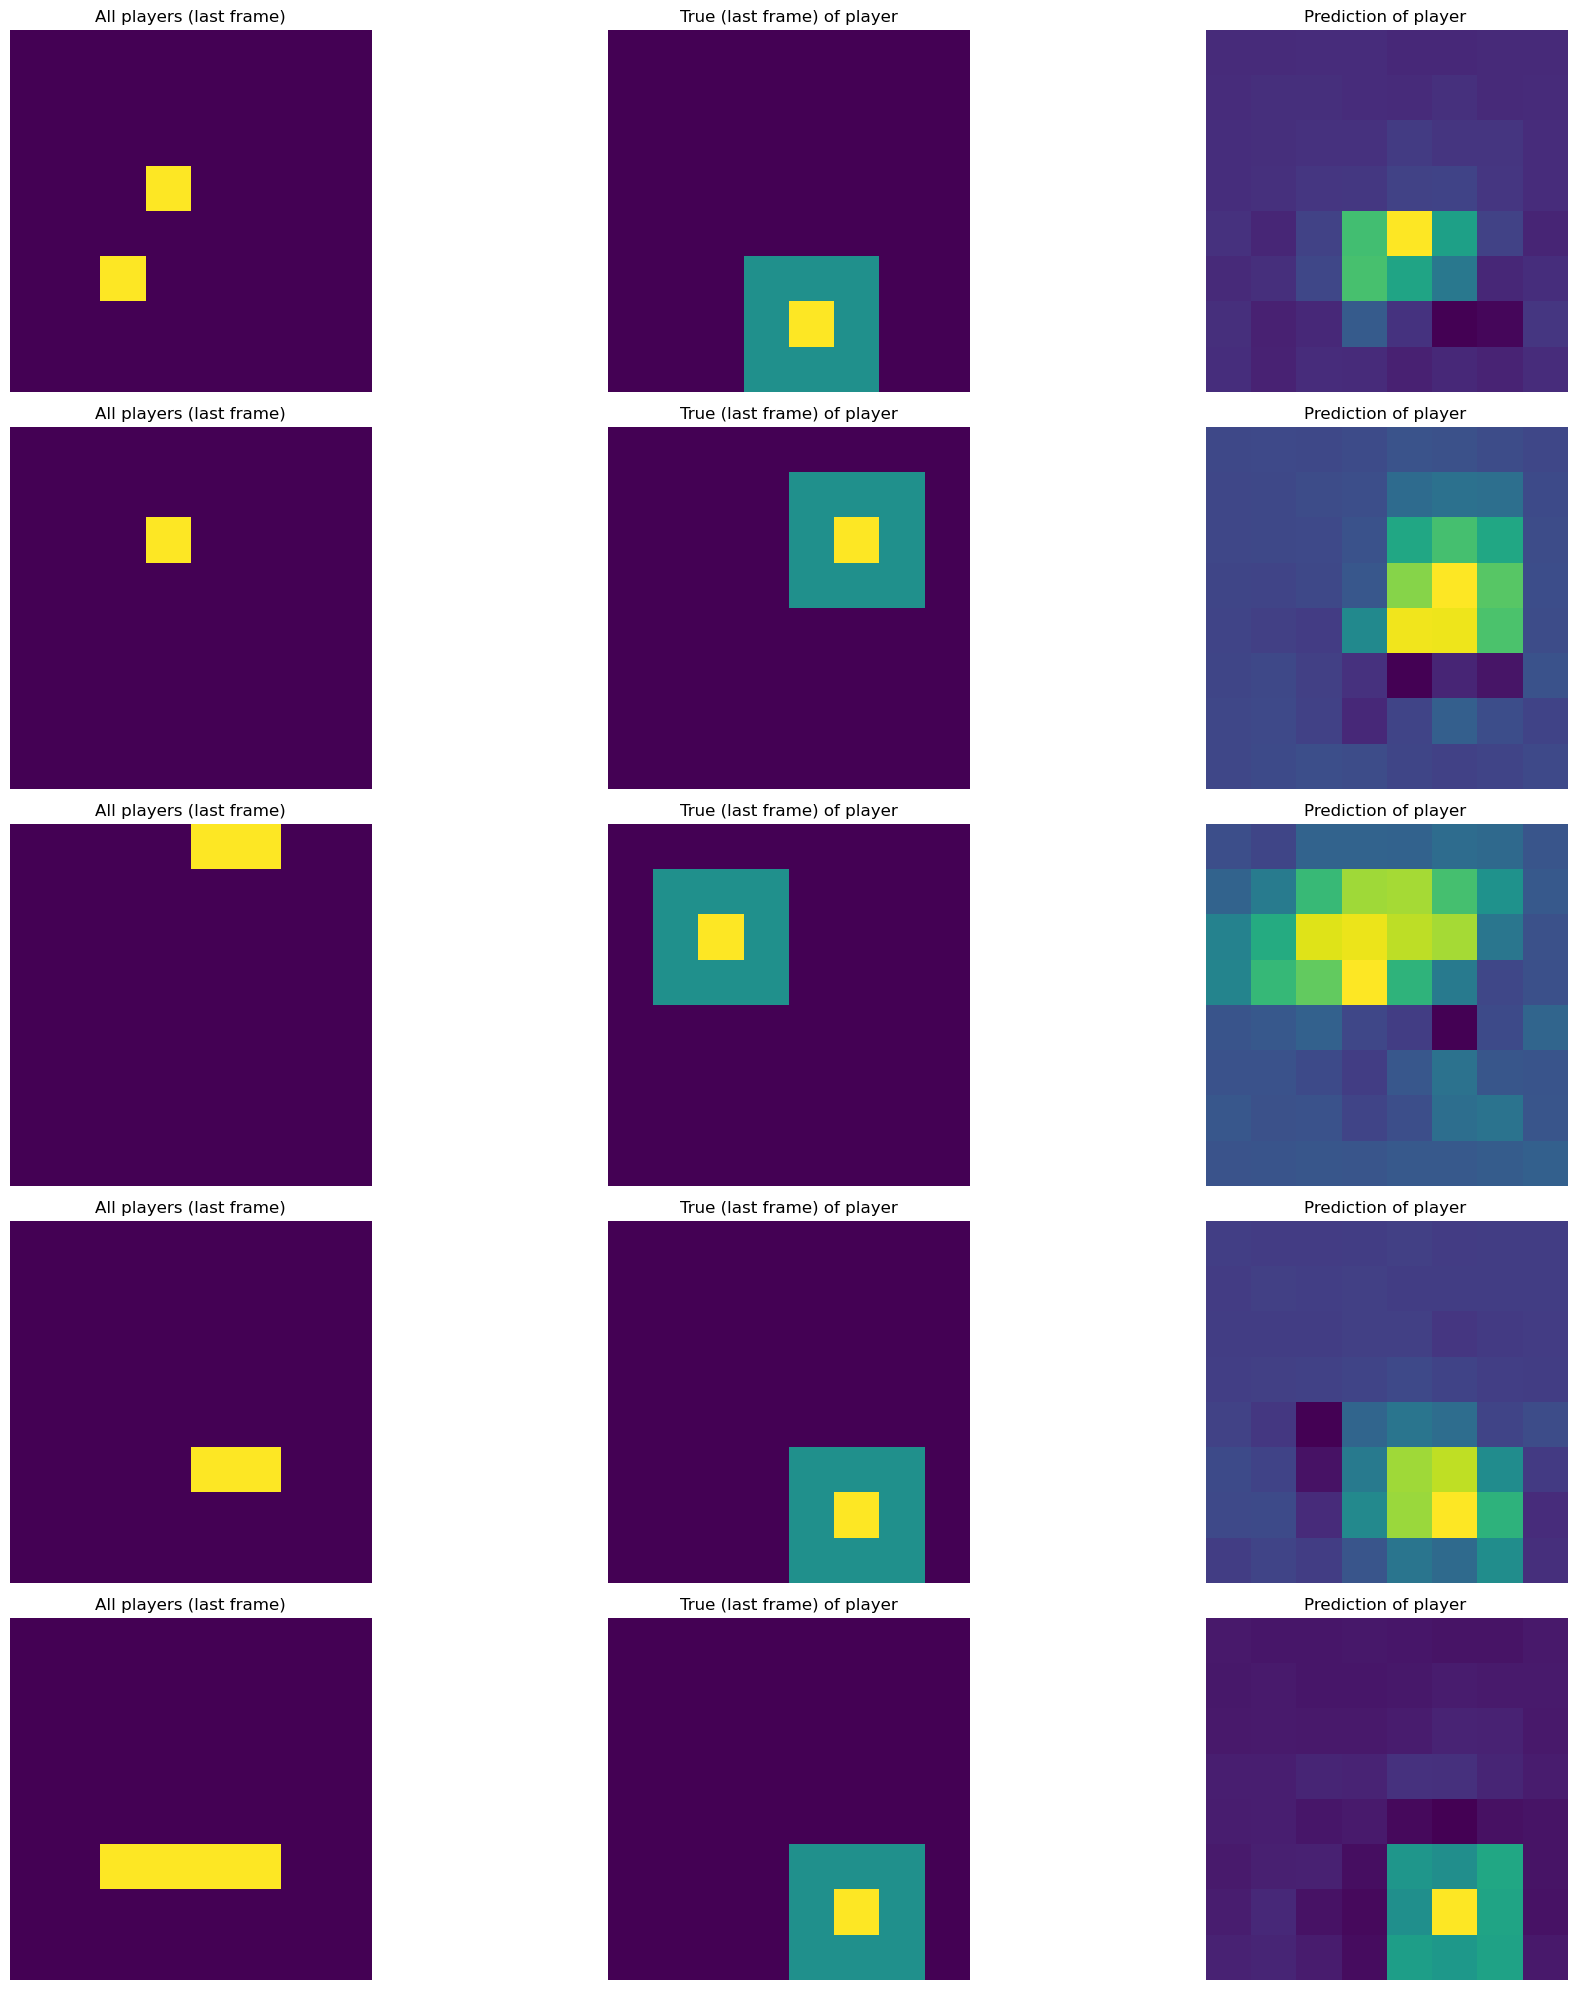

MODELO model2 - ESCENA Scene1
Epoch 1/50
39/39 [==============================] - 4s 65ms/step - loss: 0.0323 - mse: 0.0323 - mae: 0.0996 - val_loss: 0.0297 - val_mse: 0.0297 - val_mae: 0.1029
Epoch 2/50
39/39 [==============================] - 2s 45ms/step - loss: 0.0250 - mse: 0.0250 - mae: 0.0880 - val_loss: 0.0298 - val_mse: 0.0298 - val_mae: 0.0950
Epoch 3/50
39/39 [==============================] - 2s 45ms/step - loss: 0.0225 - mse: 0.0225 - mae: 0.0804 - val_loss: 0.0315 - val_mse: 0.0315 - val_mae: 0.0898
Epoch 4/50
39/39 [==============================] - 2s 45ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0779 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.0874
Epoch 5/50
39/39 [==============================] - 2s 46ms/step - loss: 0.0211 - mse: 0.0211 - mae: 0.0763 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.0877
Epoch 6/50
39/39 [==============================] - 2s 47ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0750 - val_loss: 0.0306 - val_mse: 0.0306 - val_mae:

4/4 [==============================] - 1s 11ms/step


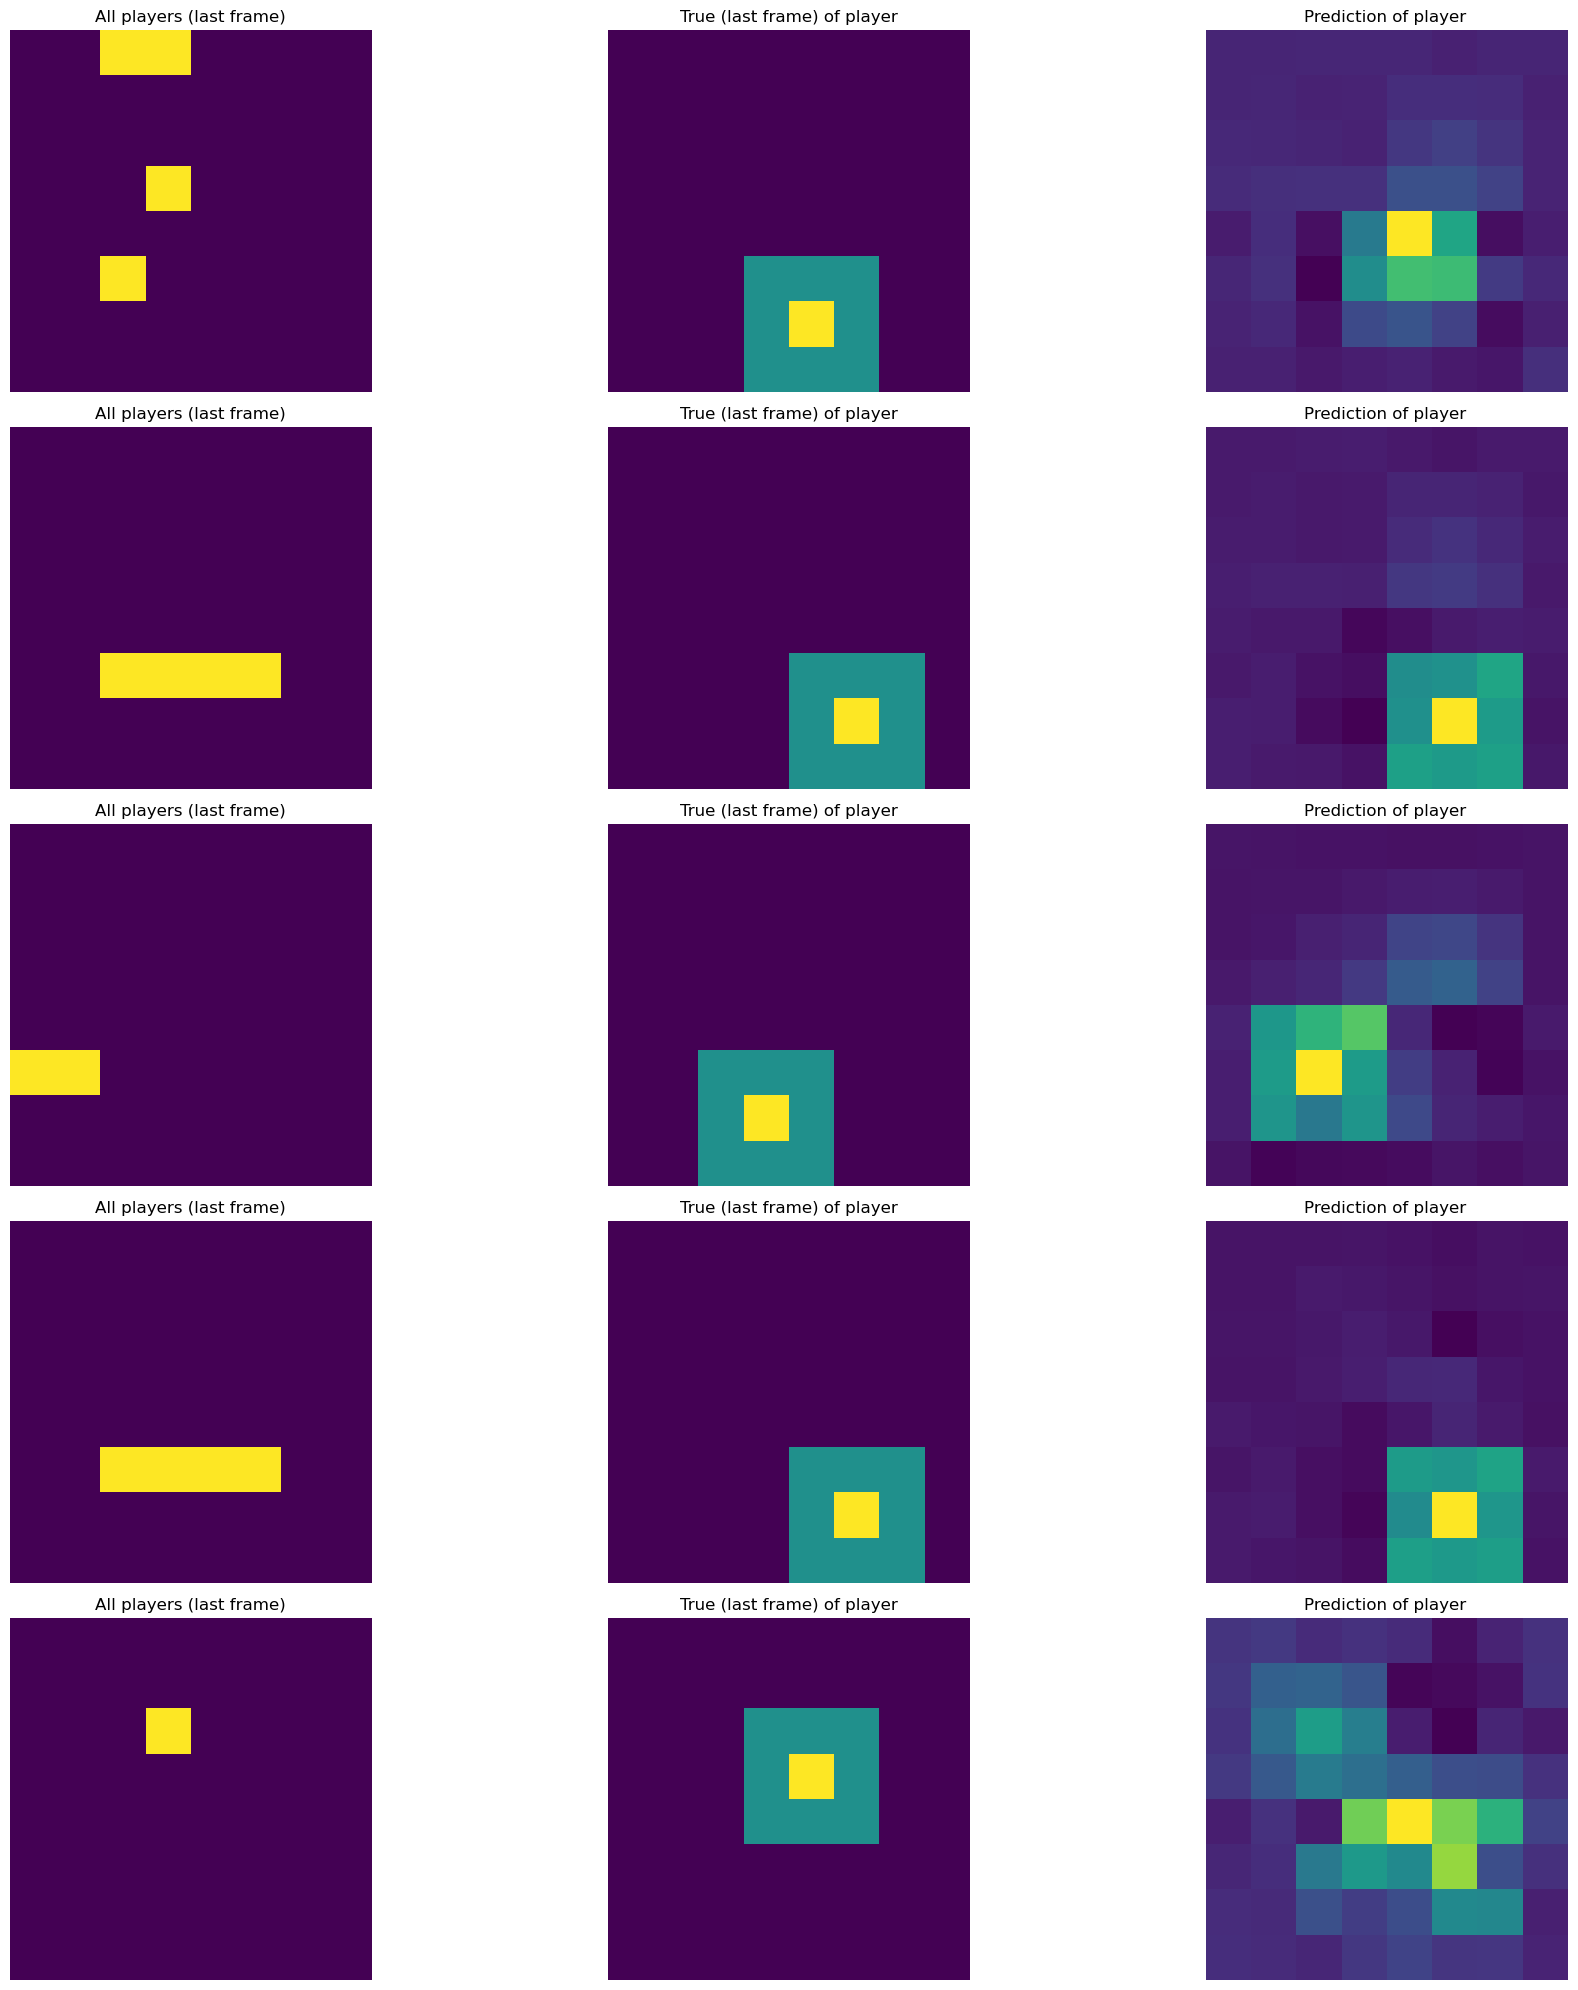

MODELO transf1 - ESCENA Scene1
Epoch 1/50
39/39 [==============================] - 12s 280ms/step - loss: 0.0348 - mse: 0.0348 - mae: 0.1159 - val_loss: 0.0329 - val_mse: 0.0329 - val_mae: 0.1088
Epoch 2/50
39/39 [==============================] - 10s 249ms/step - loss: 0.0270 - mse: 0.0270 - mae: 0.0974 - val_loss: 0.0313 - val_mse: 0.0313 - val_mae: 0.0999
Epoch 3/50
39/39 [==============================] - 10s 246ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.0889 - val_loss: 0.0307 - val_mse: 0.0307 - val_mae: 0.0944
Epoch 4/50
39/39 [==============================] - 9s 244ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0832 - val_loss: 0.0311 - val_mse: 0.0311 - val_mae: 0.0966
Epoch 5/50
39/39 [==============================] - 10s 246ms/step - loss: 0.0206 - mse: 0.0206 - mae: 0.0792 - val_loss: 0.0303 - val_mse: 0.0303 - val_mae: 0.0890
Epoch 6/50
39/39 [==============================] - 9s 239ms/step - loss: 0.0197 - mse: 0.0197 - mae: 0.0760 - val_loss: 0.0319 - val_mse: 0.0319

4/4 [==============================] - 1s 129ms/step


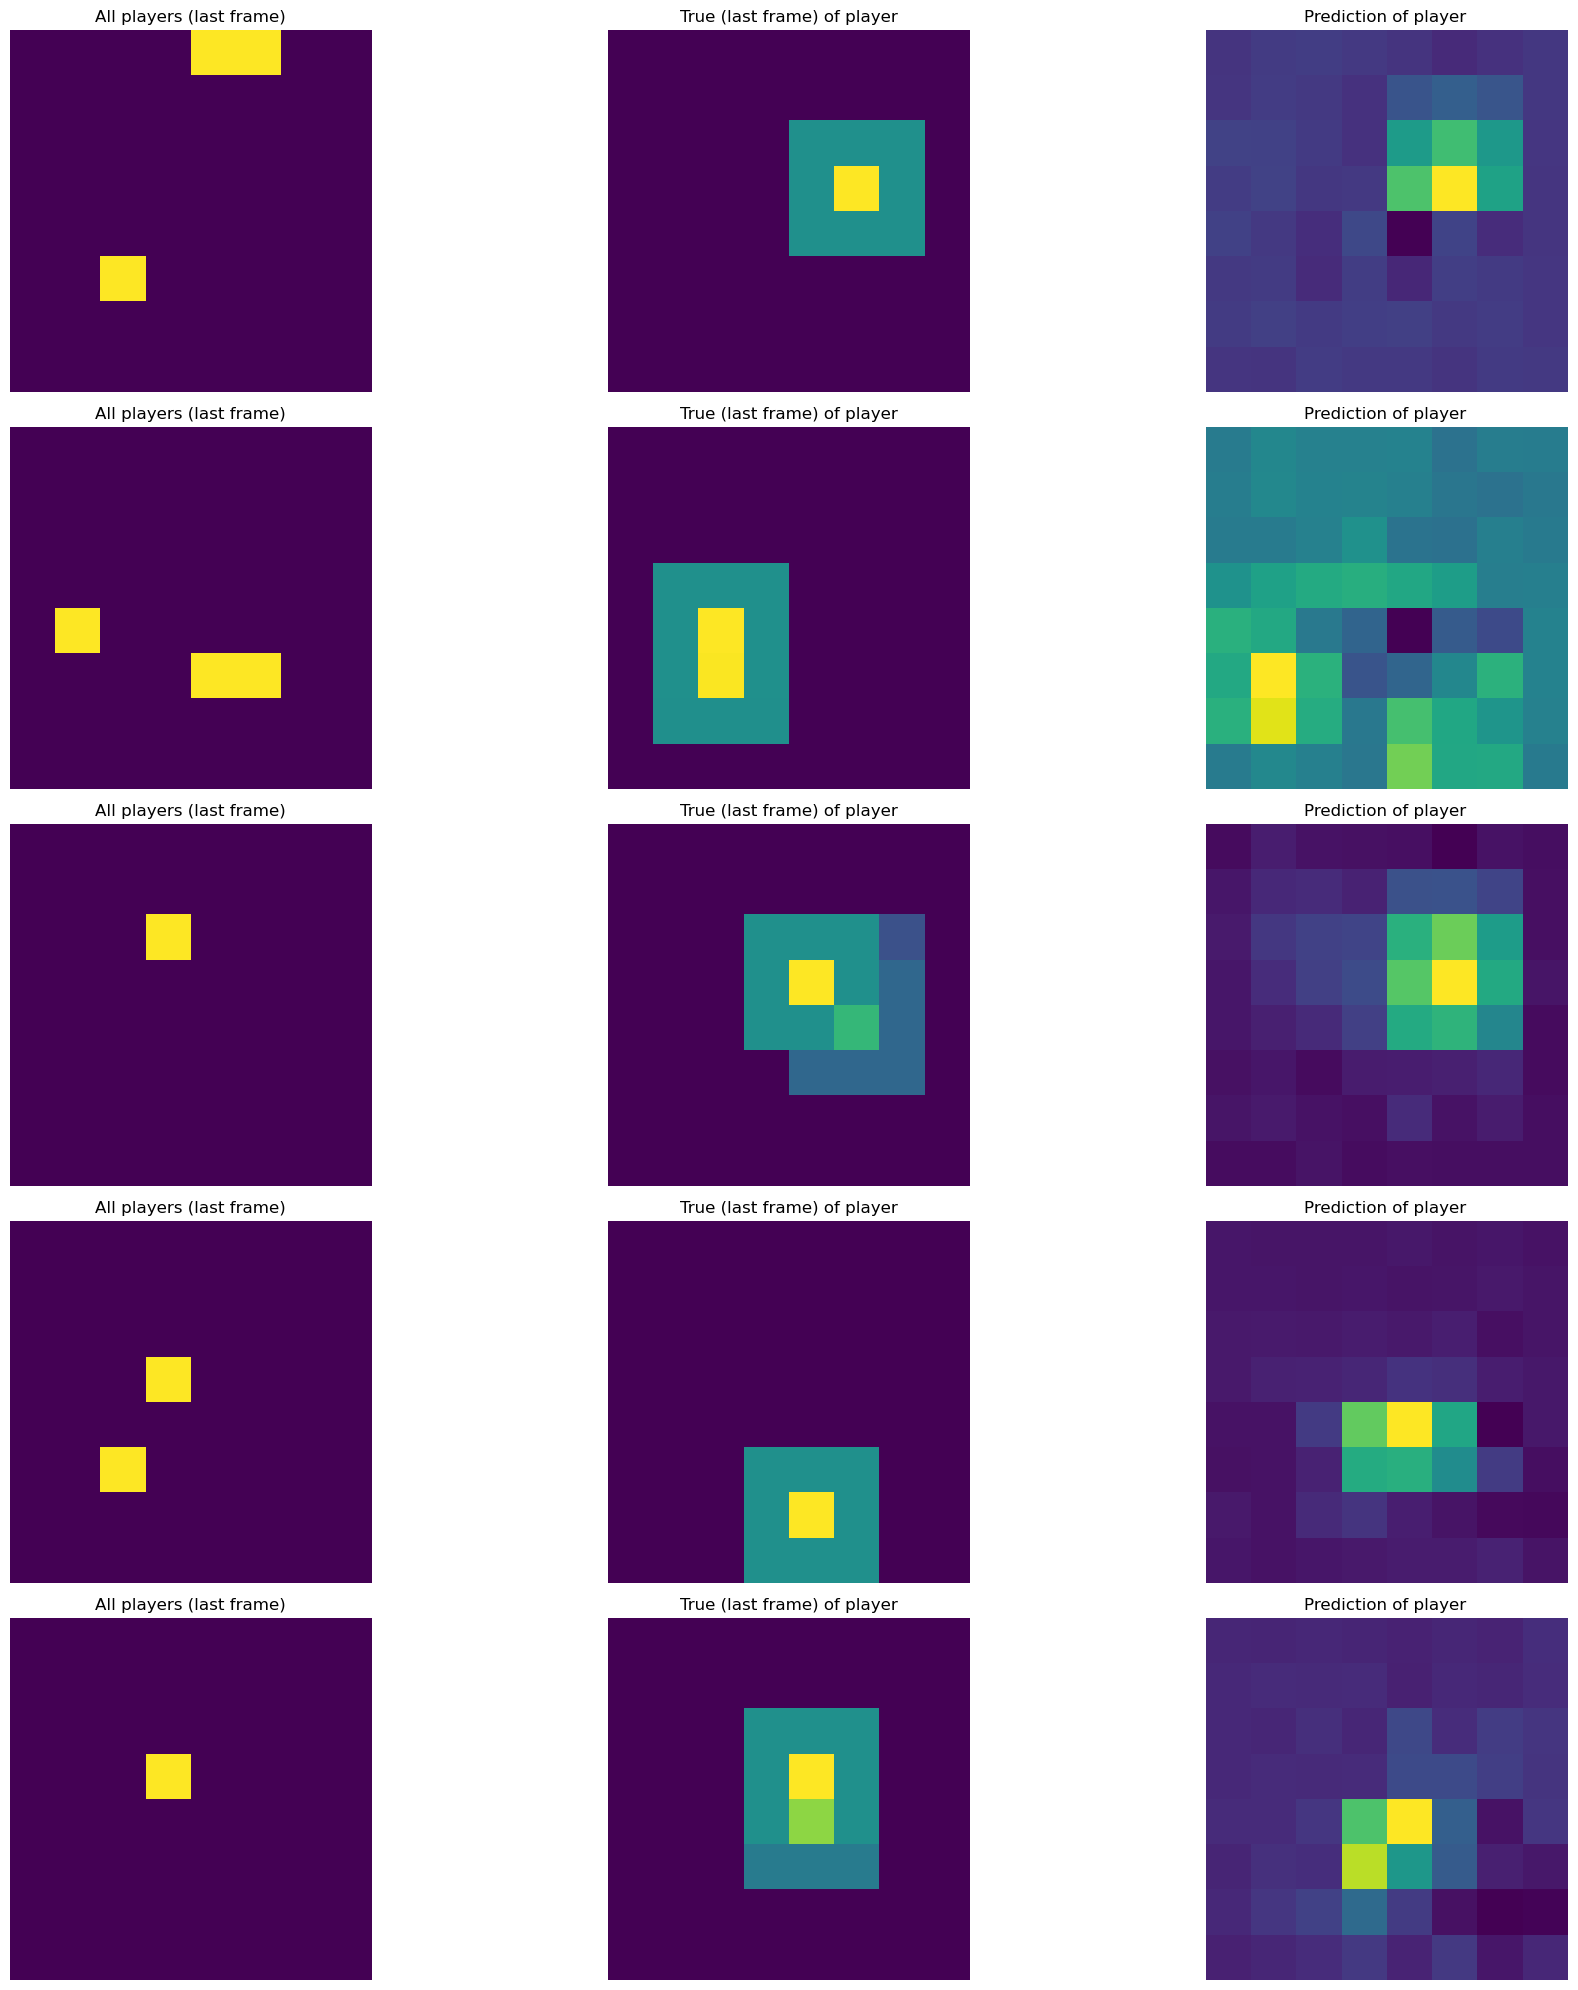

MODELO model0 - ESCENA Scene2
Epoch 1/50
38/38 [==============================] - 12s 168ms/step - loss: 0.0370 - mse: 0.0370 - mae: 0.1072 - val_loss: 0.0329 - val_mse: 0.0329 - val_mae: 0.1172
Epoch 2/50
38/38 [==============================] - 5s 141ms/step - loss: 0.0308 - mse: 0.0308 - mae: 0.1074 - val_loss: 0.0291 - val_mse: 0.0291 - val_mae: 0.1057
Epoch 3/50
38/38 [==============================] - 5s 141ms/step - loss: 0.0290 - mse: 0.0290 - mae: 0.0998 - val_loss: 0.0282 - val_mse: 0.0282 - val_mae: 0.0981
Epoch 4/50
38/38 [==============================] - 5s 141ms/step - loss: 0.0267 - mse: 0.0267 - mae: 0.0934 - val_loss: 0.0282 - val_mse: 0.0282 - val_mae: 0.0991
Epoch 5/50
38/38 [==============================] - 5s 141ms/step - loss: 0.0248 - mse: 0.0248 - mae: 0.0885 - val_loss: 0.0266 - val_mse: 0.0266 - val_mae: 0.0896
Epoch 6/50
38/38 [==============================] - 5s 141ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.0858 - val_loss: 0.0268 - val_mse: 0.0268 - v

4/4 [==============================] - 1s 56ms/step


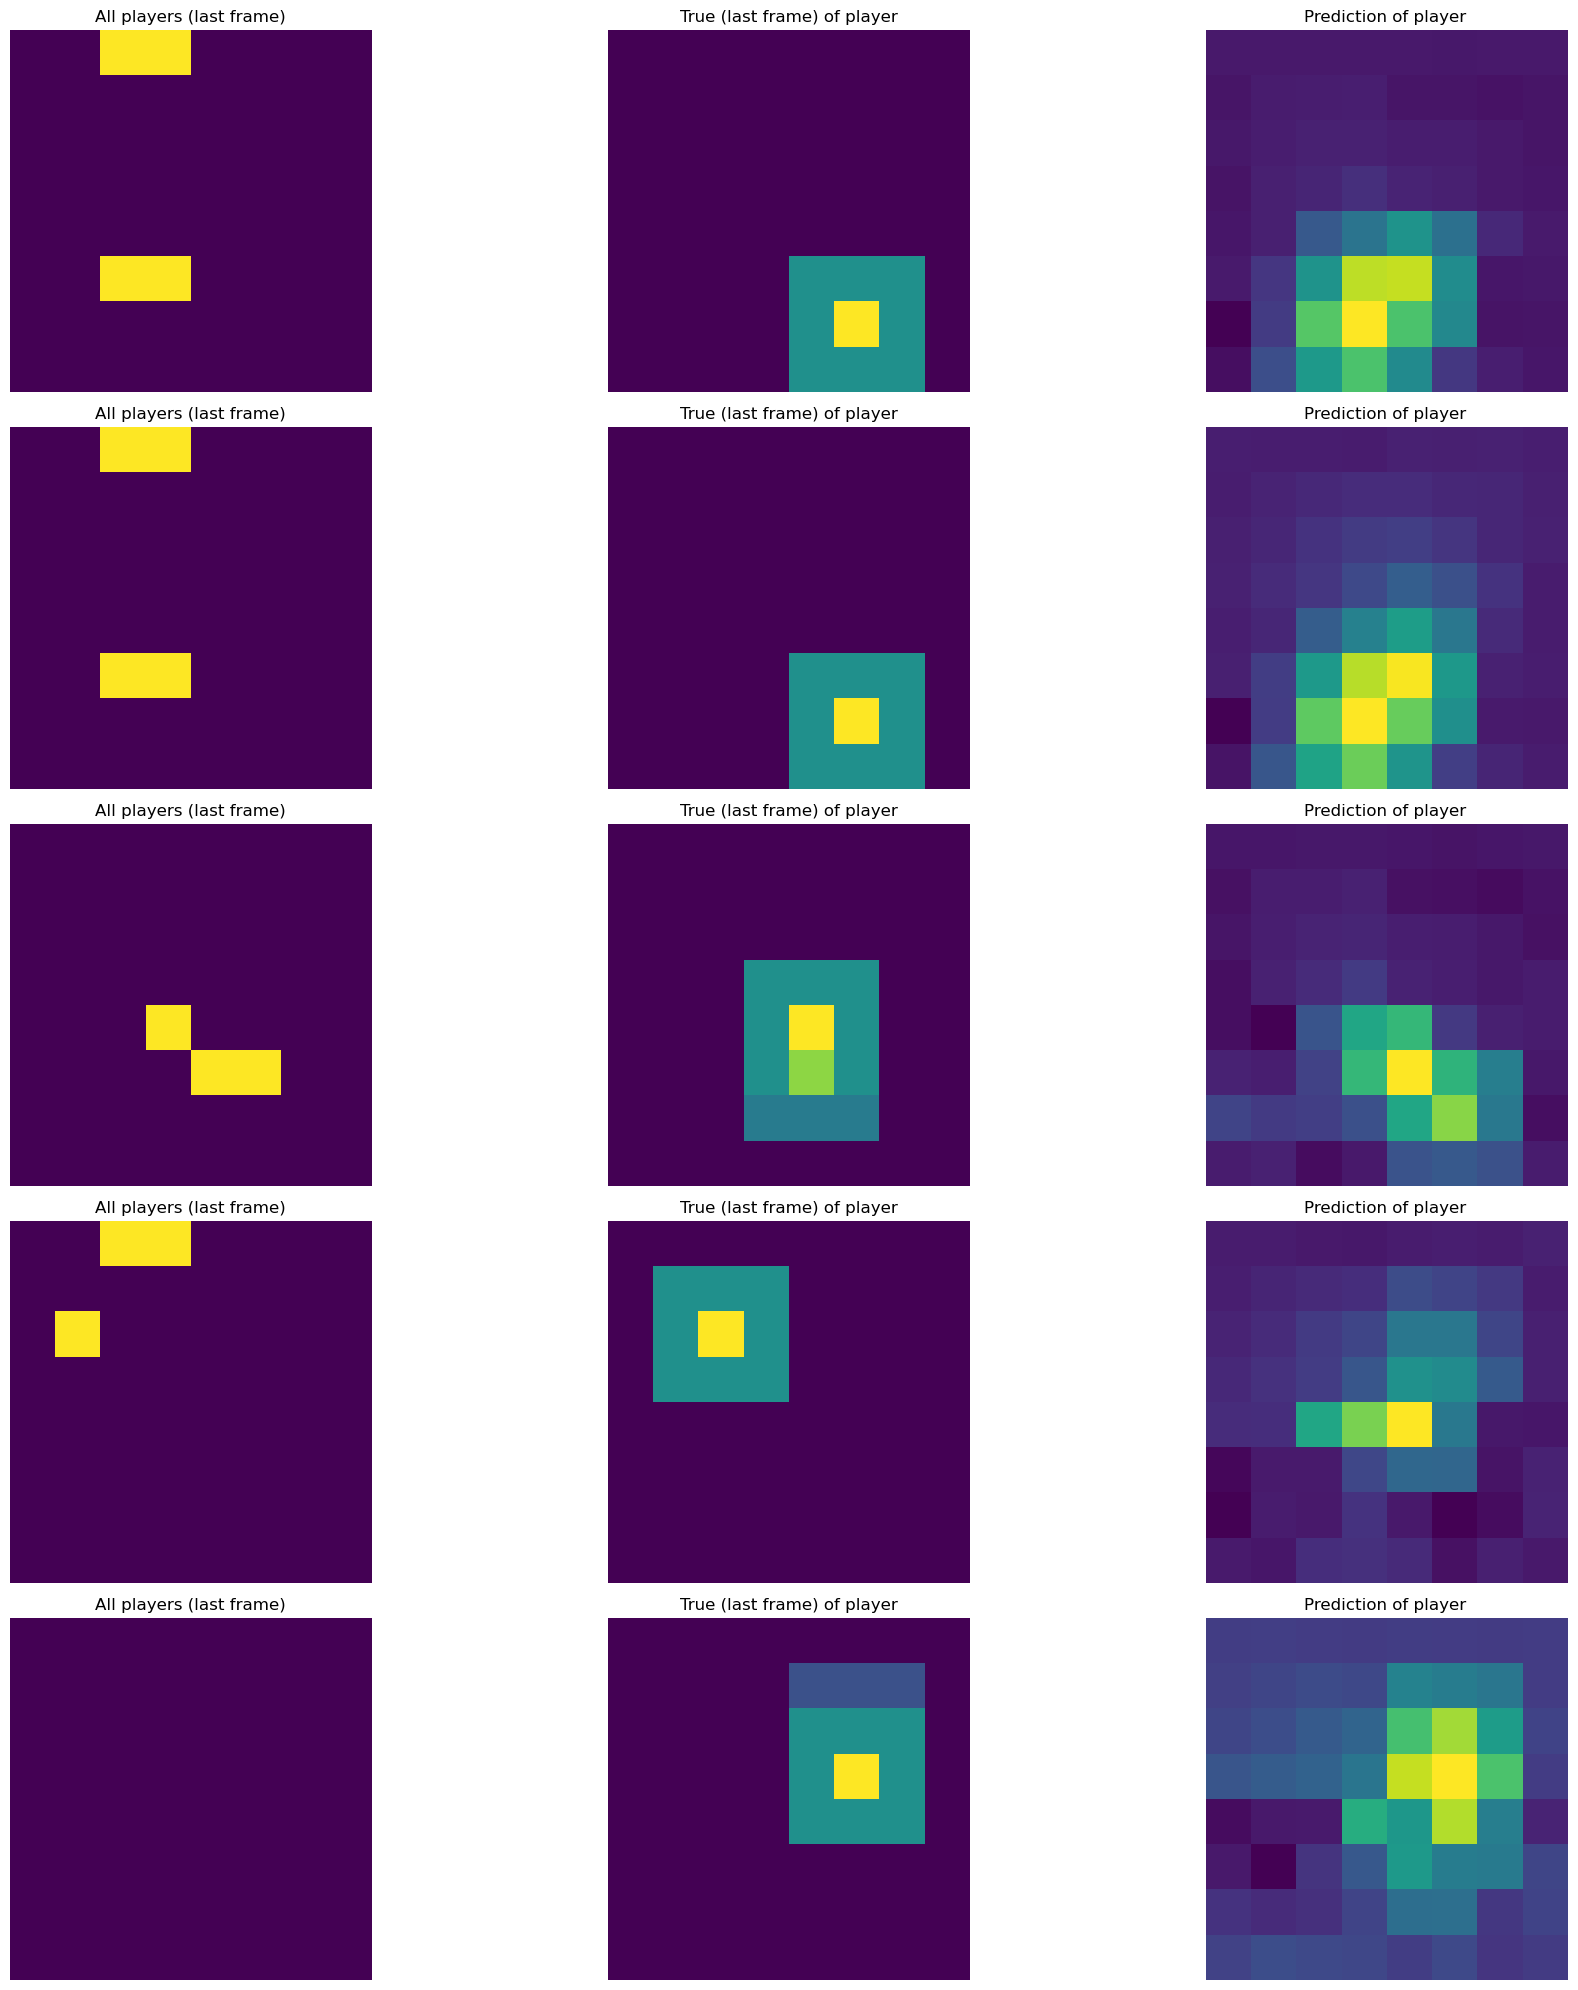

MODELO model1 - ESCENA Scene2
Epoch 1/50
38/38 [==============================] - 5s 90ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.0995 - val_loss: 0.0307 - val_mse: 0.0307 - val_mae: 0.1061
Epoch 2/50
38/38 [==============================] - 3s 66ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.0891 - val_loss: 0.0295 - val_mse: 0.0295 - val_mae: 0.0926
Epoch 3/50
38/38 [==============================] - 3s 66ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.0816 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.0885
Epoch 4/50
38/38 [==============================] - 3s 66ms/step - loss: 0.0223 - mse: 0.0223 - mae: 0.0799 - val_loss: 0.0287 - val_mse: 0.0287 - val_mae: 0.0896
Epoch 5/50
38/38 [==============================] - 3s 66ms/step - loss: 0.0217 - mse: 0.0217 - mae: 0.0778 - val_loss: 0.0288 - val_mse: 0.0288 - val_mae: 0.0902
Epoch 6/50
38/38 [==============================] - 3s 66ms/step - loss: 0.0214 - mse: 0.0214 - mae: 0.0770 - val_loss: 0.0281 - val_mse: 0.0281 - val_mae:

4/4 [==============================] - 1s 14ms/step


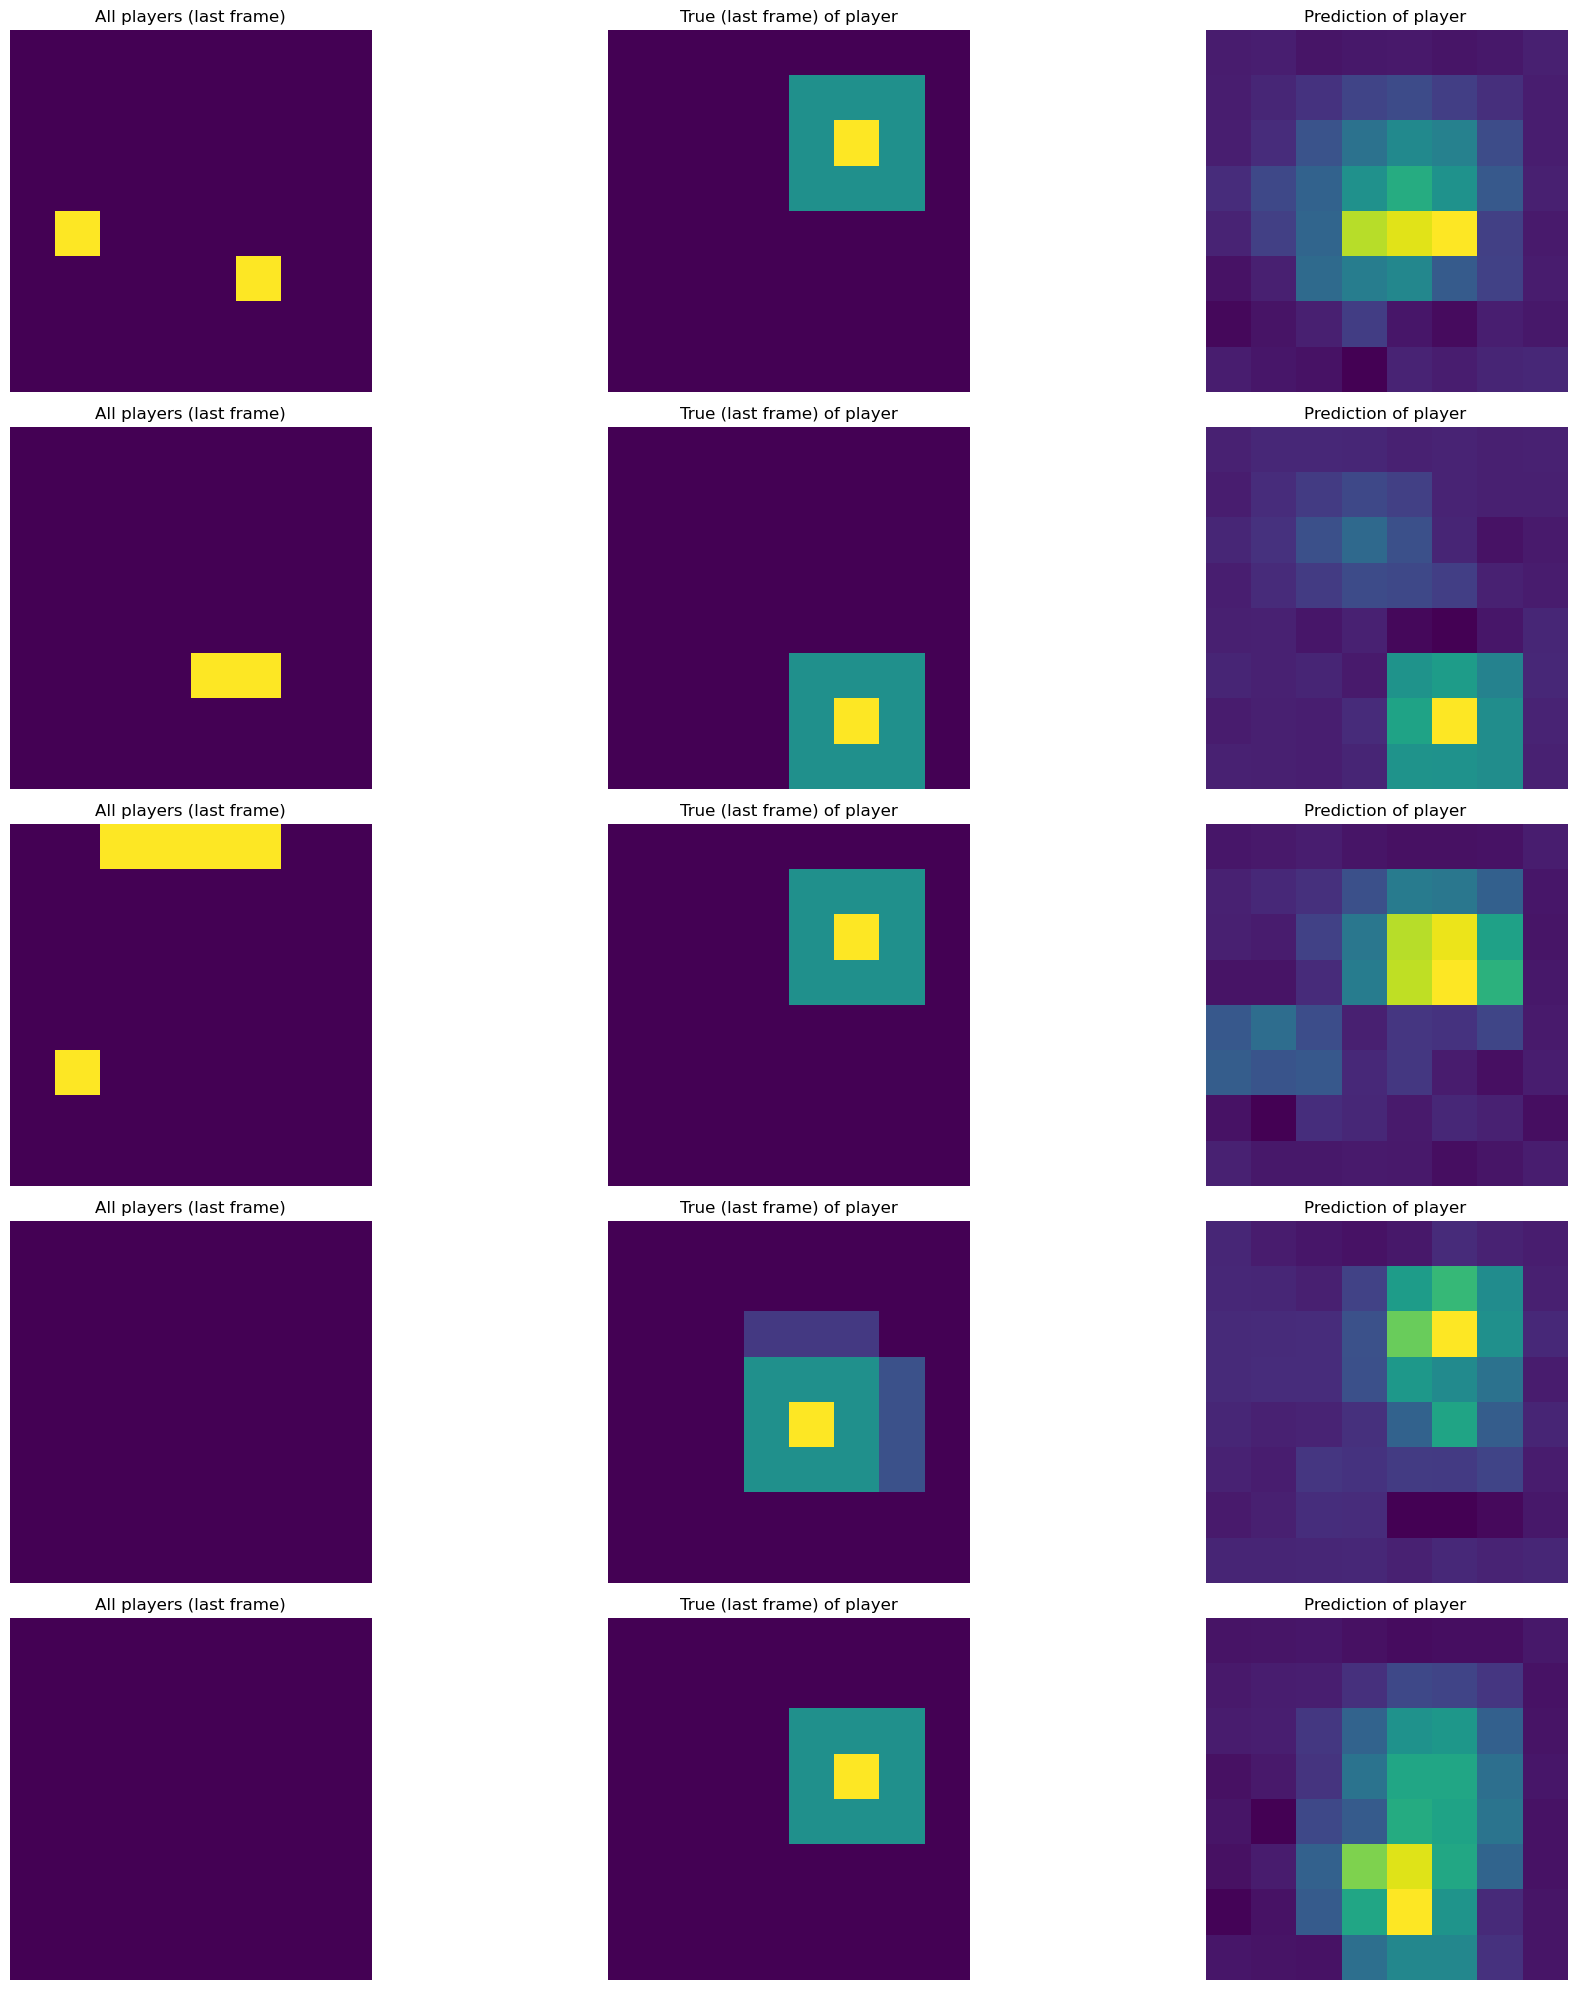

MODELO model2 - ESCENA Scene2
Epoch 1/50
38/38 [==============================] - 7s 133ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1010 - val_loss: 0.0297 - val_mse: 0.0297 - val_mae: 0.1039
Epoch 2/50
38/38 [==============================] - 4s 100ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.0871 - val_loss: 0.0271 - val_mse: 0.0271 - val_mae: 0.0898
Epoch 3/50
38/38 [==============================] - 4s 99ms/step - loss: 0.0230 - mse: 0.0230 - mae: 0.0824 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.0839
Epoch 4/50
38/38 [==============================] - 4s 99ms/step - loss: 0.0217 - mse: 0.0217 - mae: 0.0784 - val_loss: 0.0269 - val_mse: 0.0269 - val_mae: 0.0841
Epoch 5/50
38/38 [==============================] - 4s 100ms/step - loss: 0.0214 - mse: 0.0214 - mae: 0.0768 - val_loss: 0.0260 - val_mse: 0.0260 - val_mae: 0.0866
Epoch 6/50
38/38 [==============================] - 4s 101ms/step - loss: 0.0206 - mse: 0.0206 - mae: 0.0756 - val_loss: 0.0273 - val_mse: 0.0273 - val_

4/4 [==============================] - 1s 59ms/step


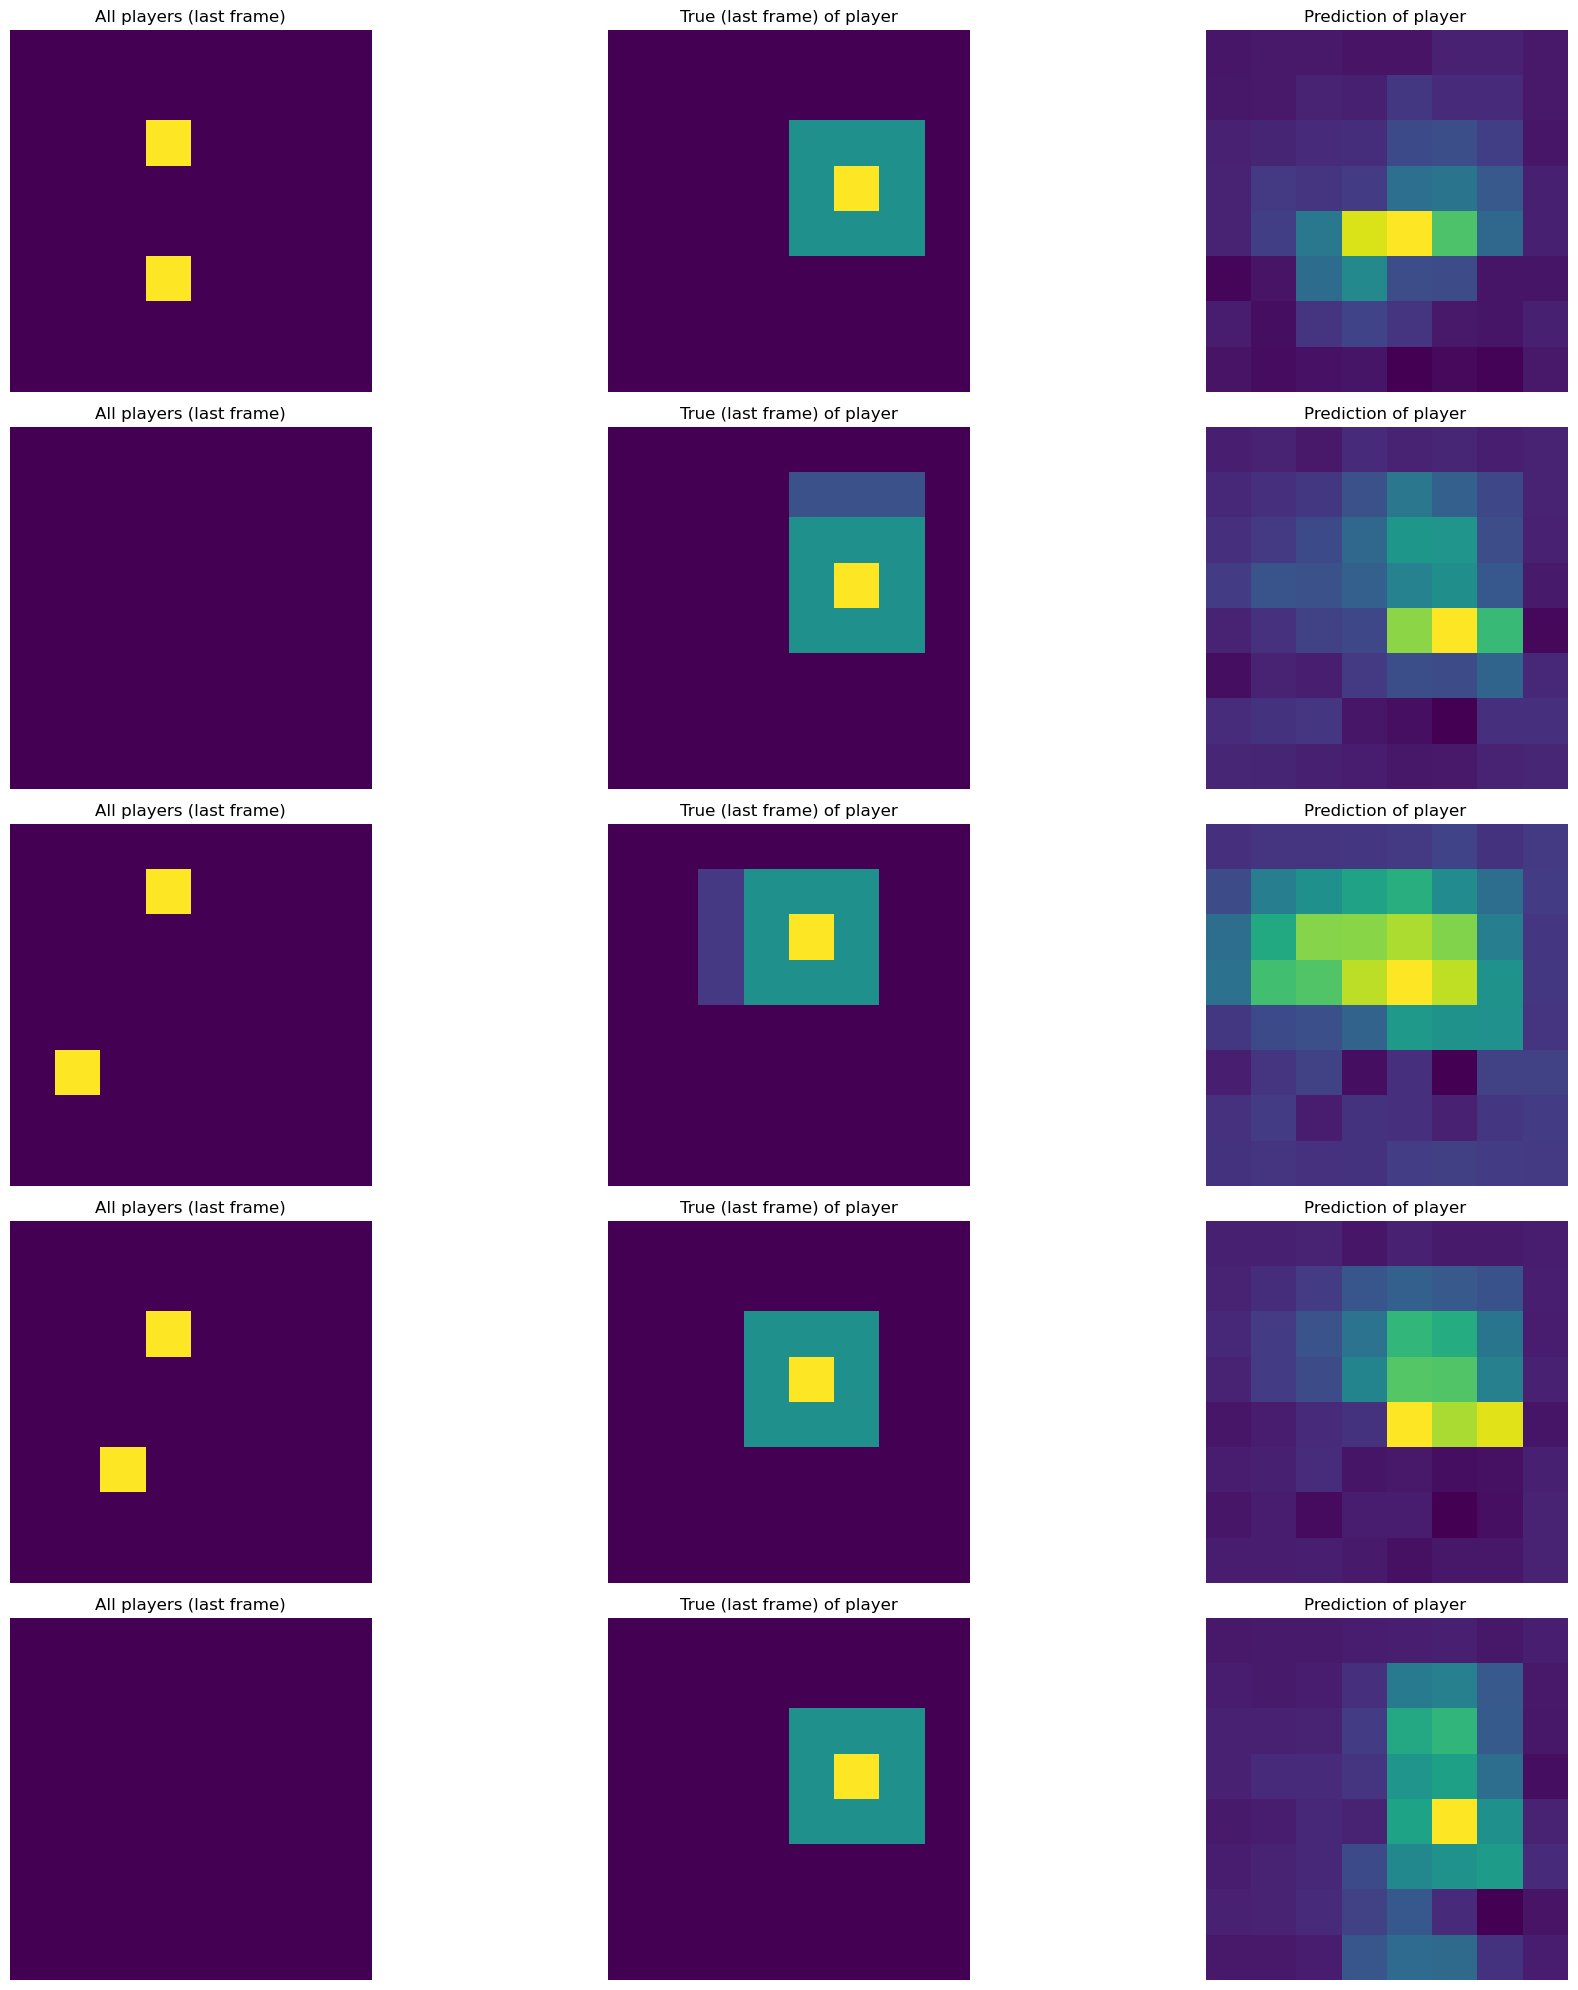

MODELO transf1 - ESCENA Scene2
Epoch 1/50
38/38 [==============================] - 56s 1s/step - loss: 0.0355 - mse: 0.0355 - mae: 0.1162 - val_loss: 0.0293 - val_mse: 0.0293 - val_mae: 0.1092
Epoch 2/50
38/38 [==============================] - 55s 1s/step - loss: 0.0273 - mse: 0.0273 - mae: 0.0996 - val_loss: 0.0272 - val_mse: 0.0272 - val_mae: 0.0943
Epoch 3/50
38/38 [==============================] - 54s 1s/step - loss: 0.0240 - mse: 0.0240 - mae: 0.0895 - val_loss: 0.0292 - val_mse: 0.0292 - val_mae: 0.0955
Epoch 4/50
38/38 [==============================] - 54s 1s/step - loss: 0.0221 - mse: 0.0221 - mae: 0.0842 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae: 0.0870
Epoch 5/50
38/38 [==============================] - 55s 1s/step - loss: 0.0208 - mse: 0.0208 - mae: 0.0805 - val_loss: 0.0274 - val_mse: 0.0274 - val_mae: 0.0939
Epoch 6/50
38/38 [==============================] - 54s 1s/step - loss: 0.0208 - mse: 0.0208 - mae: 0.0792 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.08

4/4 [==============================] - 4s 798ms/step


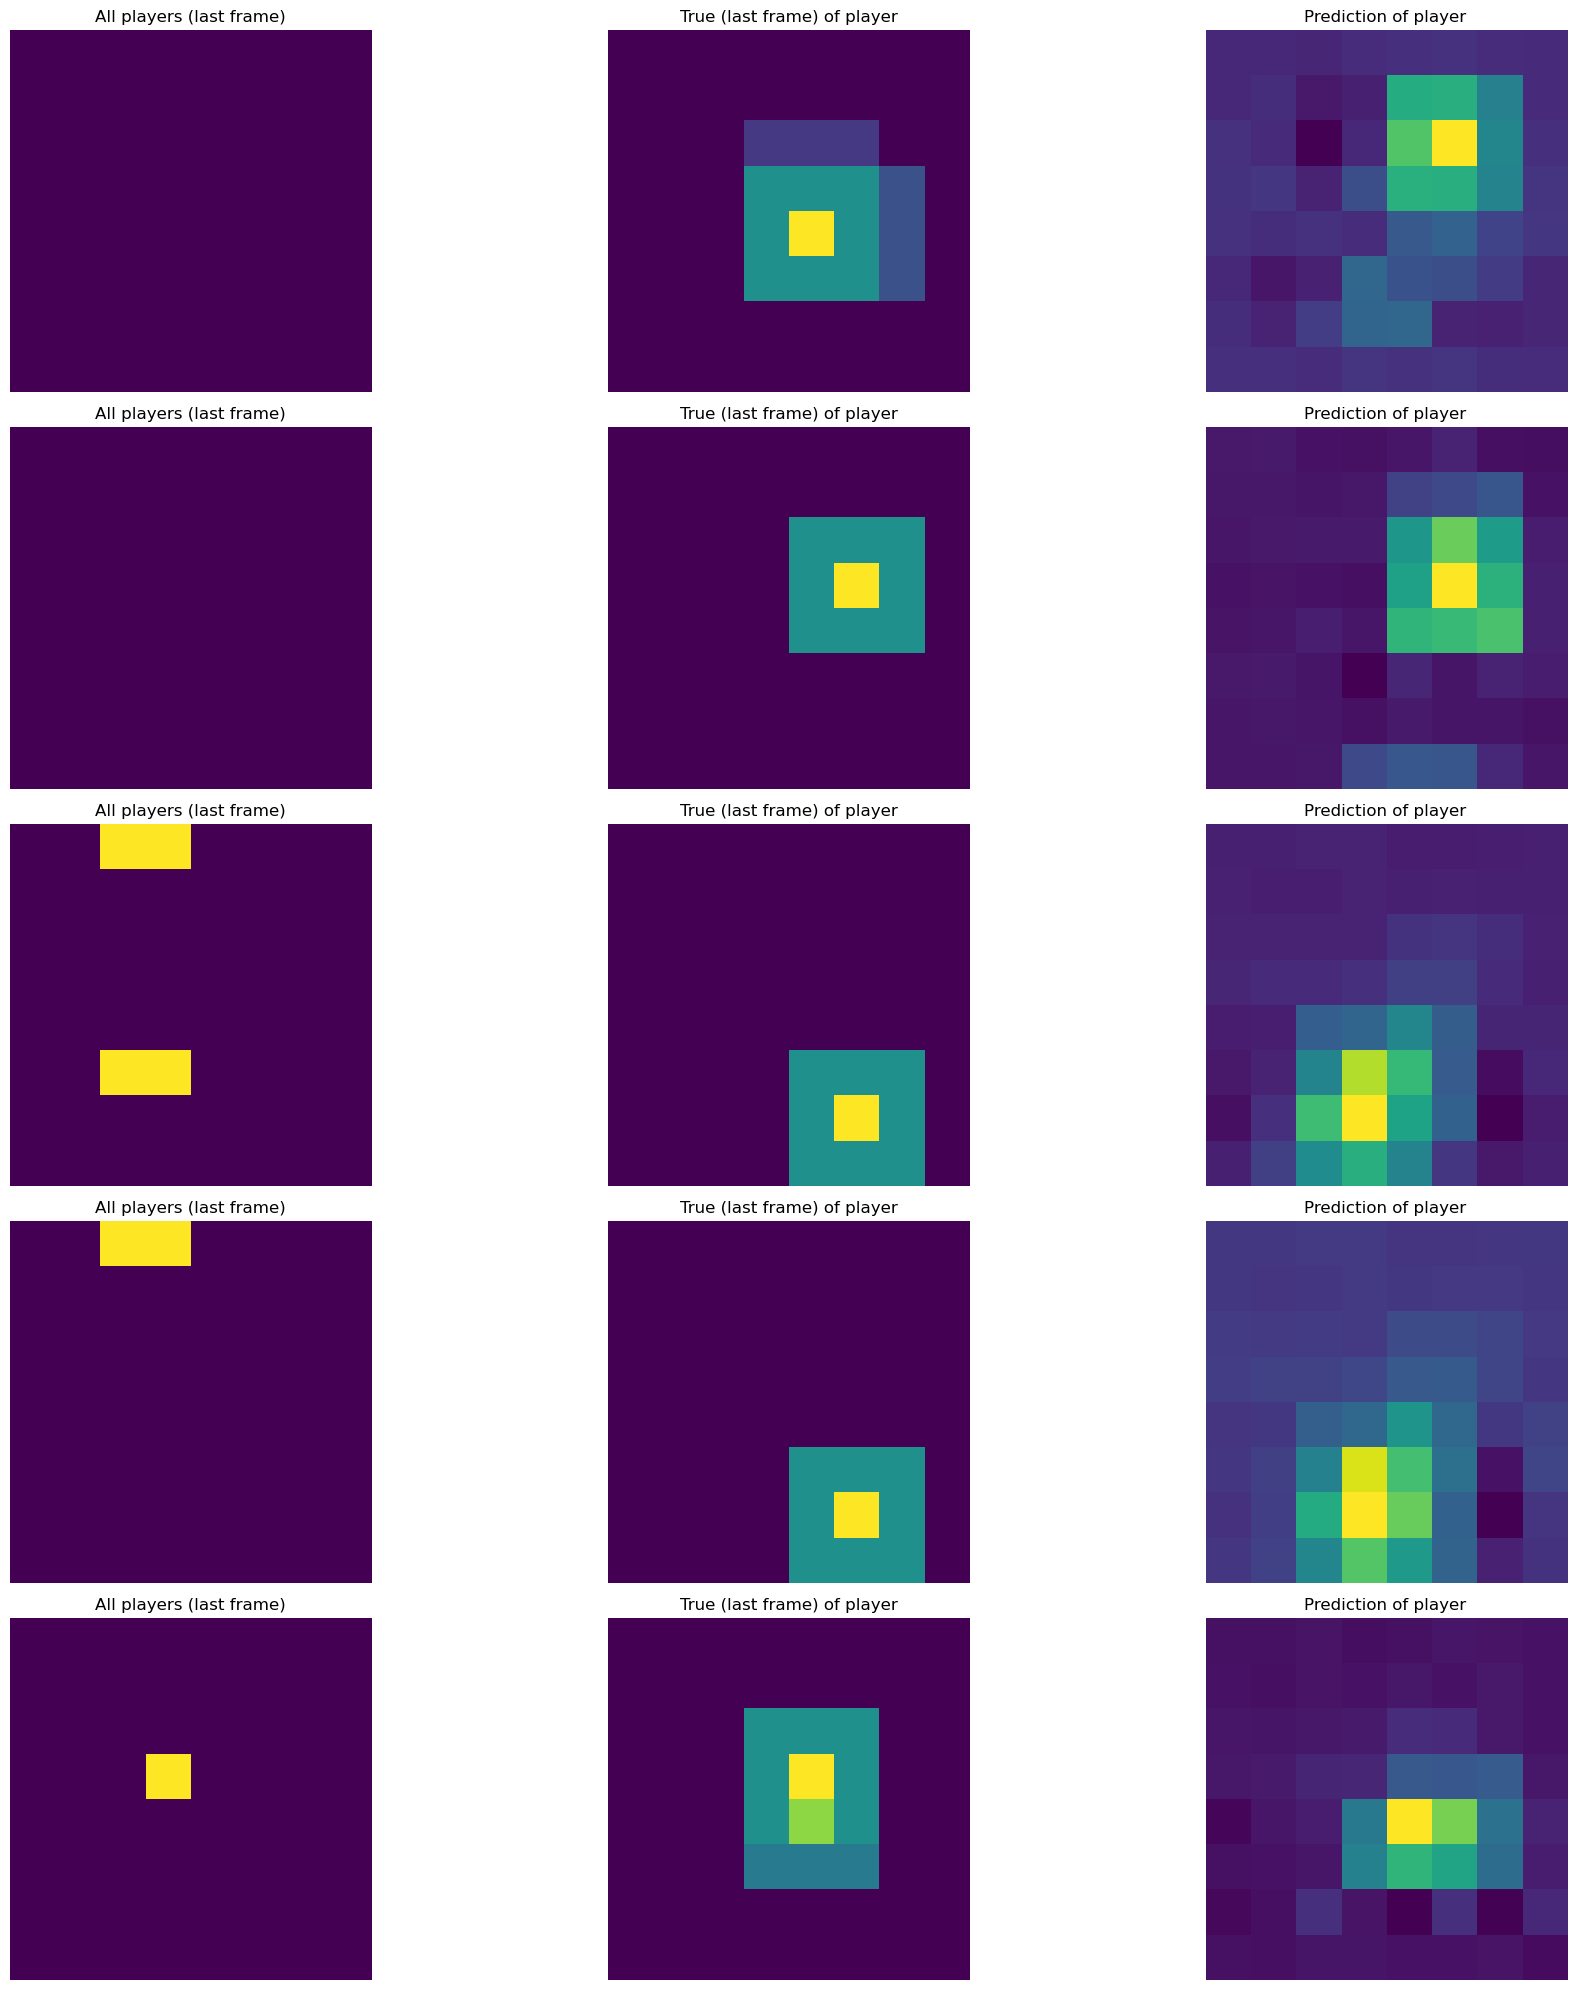

MODELO model0 - ESCENA Scene3
Epoch 1/50
37/37 [==============================] - 12s 170ms/step - loss: 0.0373 - mse: 0.0373 - mae: 0.1080 - val_loss: 0.0311 - val_mse: 0.0311 - val_mae: 0.1150
Epoch 2/50
37/37 [==============================] - 5s 149ms/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1097 - val_loss: 0.0290 - val_mse: 0.0290 - val_mae: 0.1033
Epoch 3/50
37/37 [==============================] - 6s 149ms/step - loss: 0.0293 - mse: 0.0293 - mae: 0.1002 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.0912
Epoch 4/50
37/37 [==============================] - 5s 149ms/step - loss: 0.0276 - mse: 0.0276 - mae: 0.0958 - val_loss: 0.0256 - val_mse: 0.0256 - val_mae: 0.0932
Epoch 5/50
37/37 [==============================] - 6s 149ms/step - loss: 0.0255 - mse: 0.0255 - mae: 0.0904 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.0928
Epoch 6/50
37/37 [==============================] - 6s 150ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.0872 - val_loss: 0.0240 - val_mse: 0.0240 - v

4/4 [==============================] - 1s 65ms/step


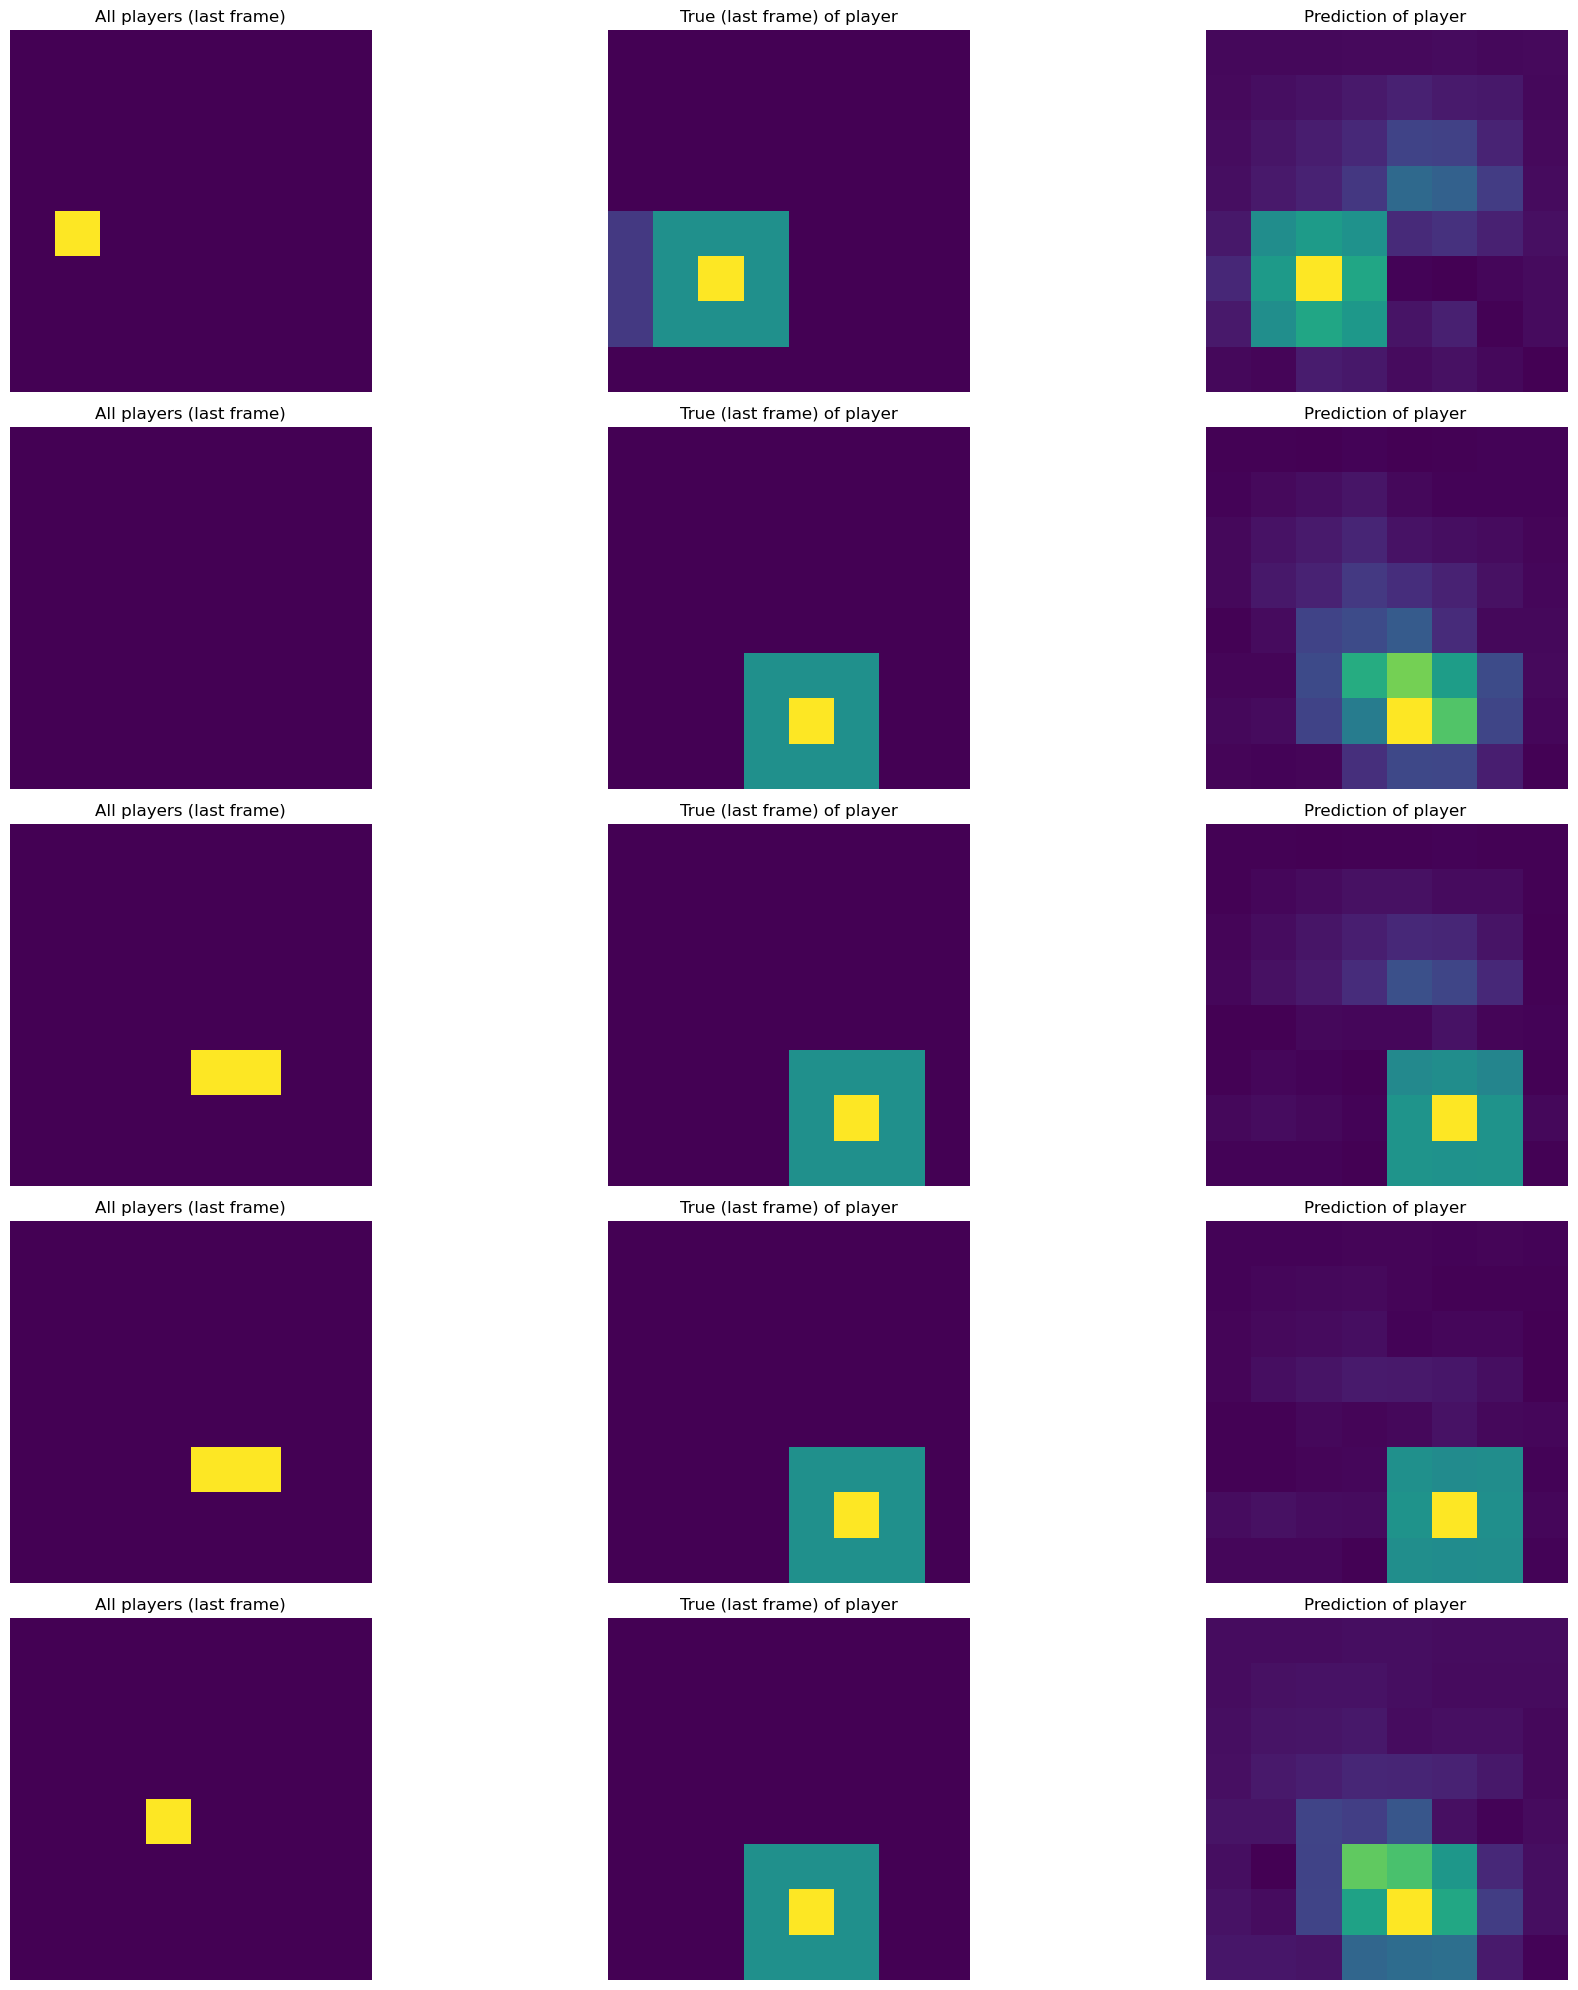

MODELO model1 - ESCENA Scene3
Epoch 1/50
37/37 [==============================] - 5s 102ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1006 - val_loss: 0.0274 - val_mse: 0.0274 - val_mae: 0.1004
Epoch 2/50
37/37 [==============================] - 3s 85ms/step - loss: 0.0254 - mse: 0.0254 - mae: 0.0902 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae: 0.0930
Epoch 3/50
37/37 [==============================] - 3s 85ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0830 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.0883
Epoch 4/50
37/37 [==============================] - 3s 85ms/step - loss: 0.0225 - mse: 0.0225 - mae: 0.0805 - val_loss: 0.0255 - val_mse: 0.0255 - val_mae: 0.0882
Epoch 5/50
37/37 [==============================] - 3s 85ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0784 - val_loss: 0.0263 - val_mse: 0.0263 - val_mae: 0.0901
Epoch 6/50
37/37 [==============================] - 3s 86ms/step - loss: 0.0216 - mse: 0.0216 - mae: 0.0781 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae

4/4 [==============================] - 1s 22ms/step


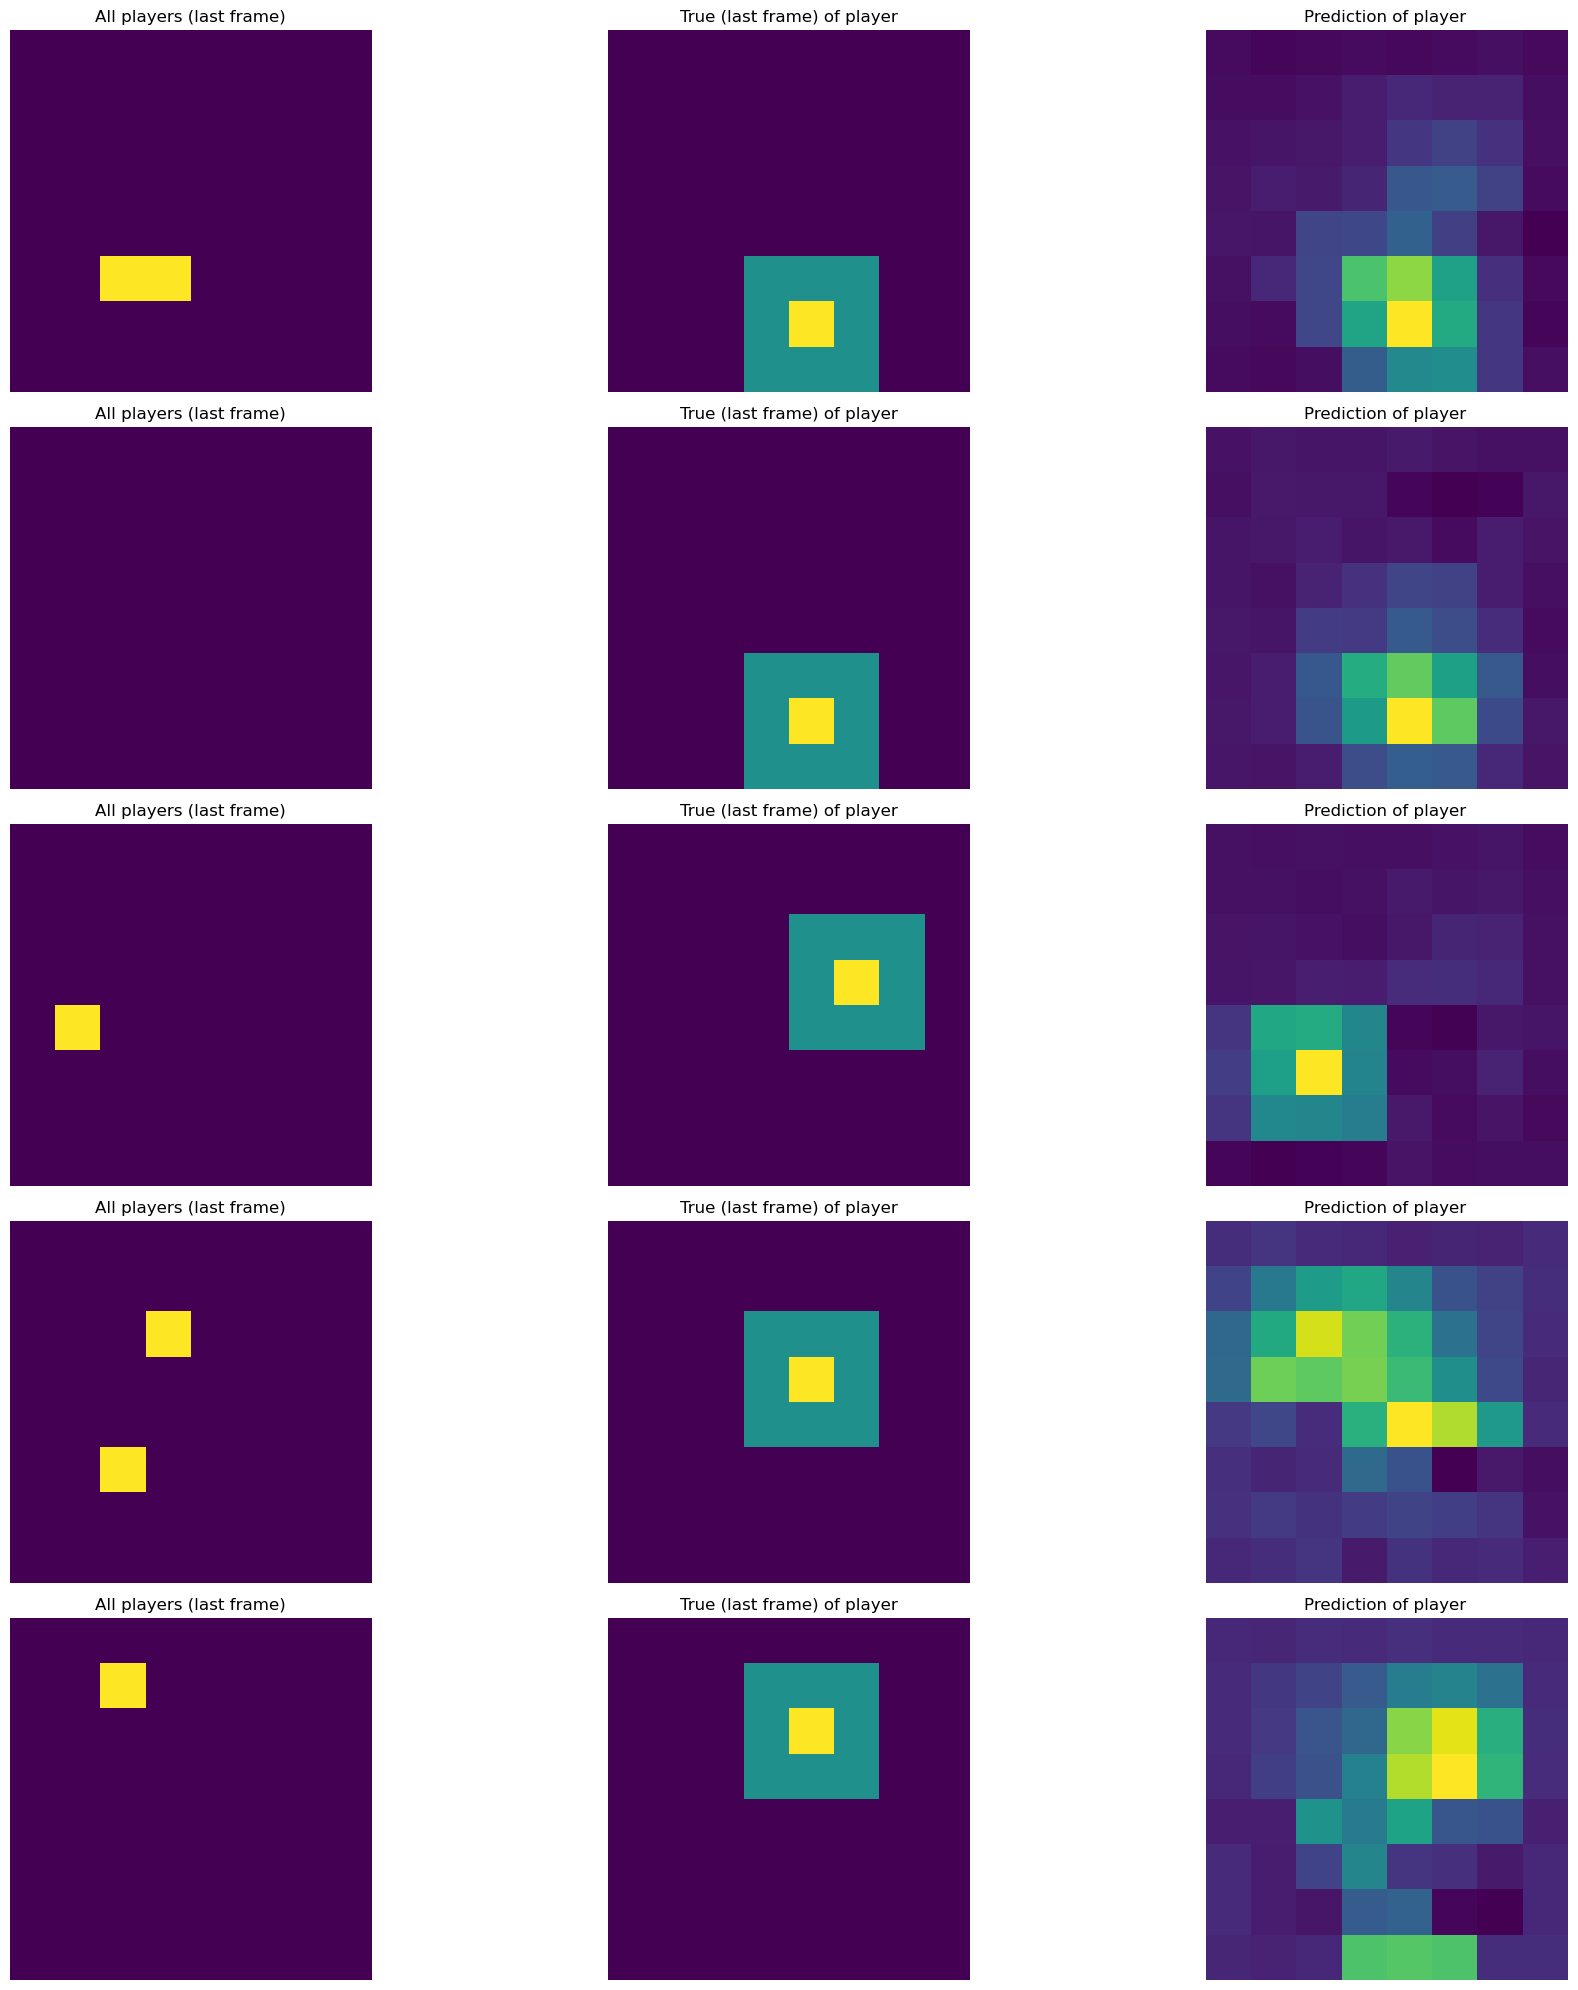

MODELO model2 - ESCENA Scene3
Epoch 1/50
37/37 [==============================] - 8s 175ms/step - loss: 0.0326 - mse: 0.0326 - mae: 0.1000 - val_loss: 0.0277 - val_mse: 0.0277 - val_mae: 0.1013
Epoch 2/50
37/37 [==============================] - 6s 158ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.0881 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.0915
Epoch 3/50
37/37 [==============================] - 6s 159ms/step - loss: 0.0230 - mse: 0.0230 - mae: 0.0814 - val_loss: 0.0267 - val_mse: 0.0267 - val_mae: 0.0919
Epoch 4/50
37/37 [==============================] - 6s 158ms/step - loss: 0.0217 - mse: 0.0217 - mae: 0.0781 - val_loss: 0.0257 - val_mse: 0.0257 - val_mae: 0.0903
Epoch 5/50
37/37 [==============================] - 6s 159ms/step - loss: 0.0210 - mse: 0.0210 - mae: 0.0760 - val_loss: 0.0262 - val_mse: 0.0262 - val_mae: 0.0897
Epoch 6/50
37/37 [==============================] - 6s 159ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0758 - val_loss: 0.0264 - val_mse: 0.0264 - va

4/4 [==============================] - 1s 77ms/step


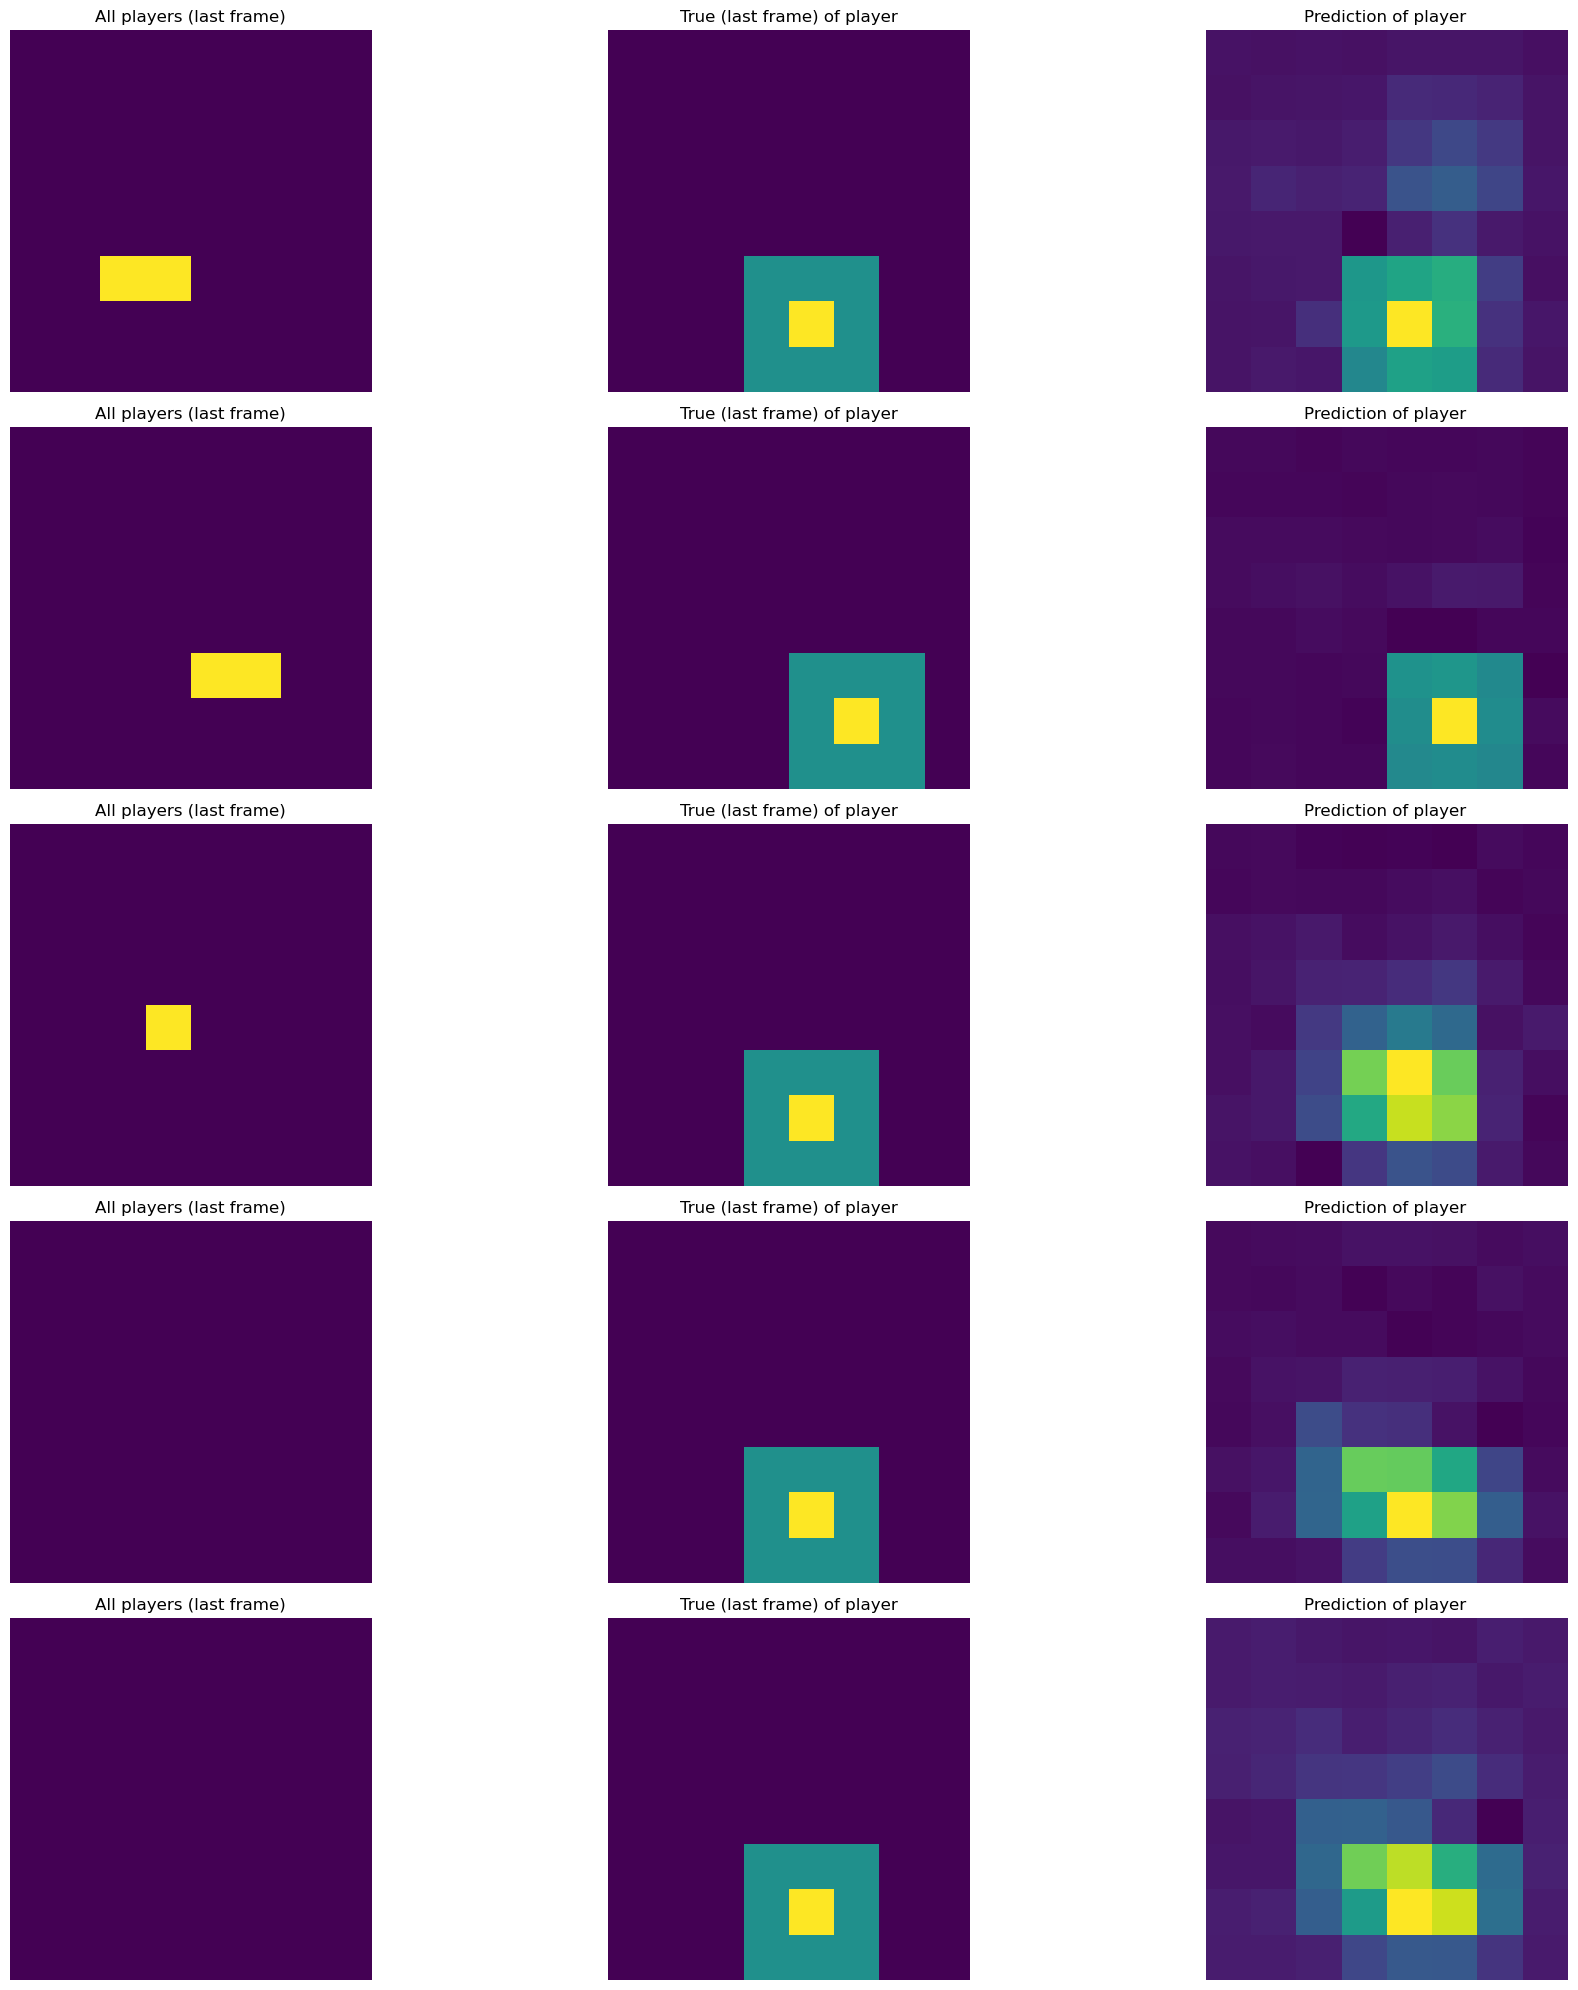

MODELO transf1 - ESCENA Scene3
Epoch 1/50
37/37 [==============================] - 55s 1s/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1175 - val_loss: 0.0286 - val_mse: 0.0286 - val_mae: 0.1032
Epoch 2/50
37/37 [==============================] - 53s 1s/step - loss: 0.0277 - mse: 0.0277 - mae: 0.0994 - val_loss: 0.0262 - val_mse: 0.0262 - val_mae: 0.0975
Epoch 3/50
37/37 [==============================] - 53s 1s/step - loss: 0.0244 - mse: 0.0244 - mae: 0.0906 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.0878
Epoch 4/50
37/37 [==============================] - 54s 1s/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0867 - val_loss: 0.0252 - val_mse: 0.0252 - val_mae: 0.0935
Epoch 5/50
37/37 [==============================] - 54s 1s/step - loss: 0.0220 - mse: 0.0220 - mae: 0.0832 - val_loss: 0.0235 - val_mse: 0.0235 - val_mae: 0.0877
Epoch 6/50
37/37 [==============================] - 54s 1s/step - loss: 0.0208 - mse: 0.0208 - mae: 0.0801 - val_loss: 0.0247 - val_mse: 0.0247 - val_mae: 0.08

4/4 [==============================] - 4s 977ms/step


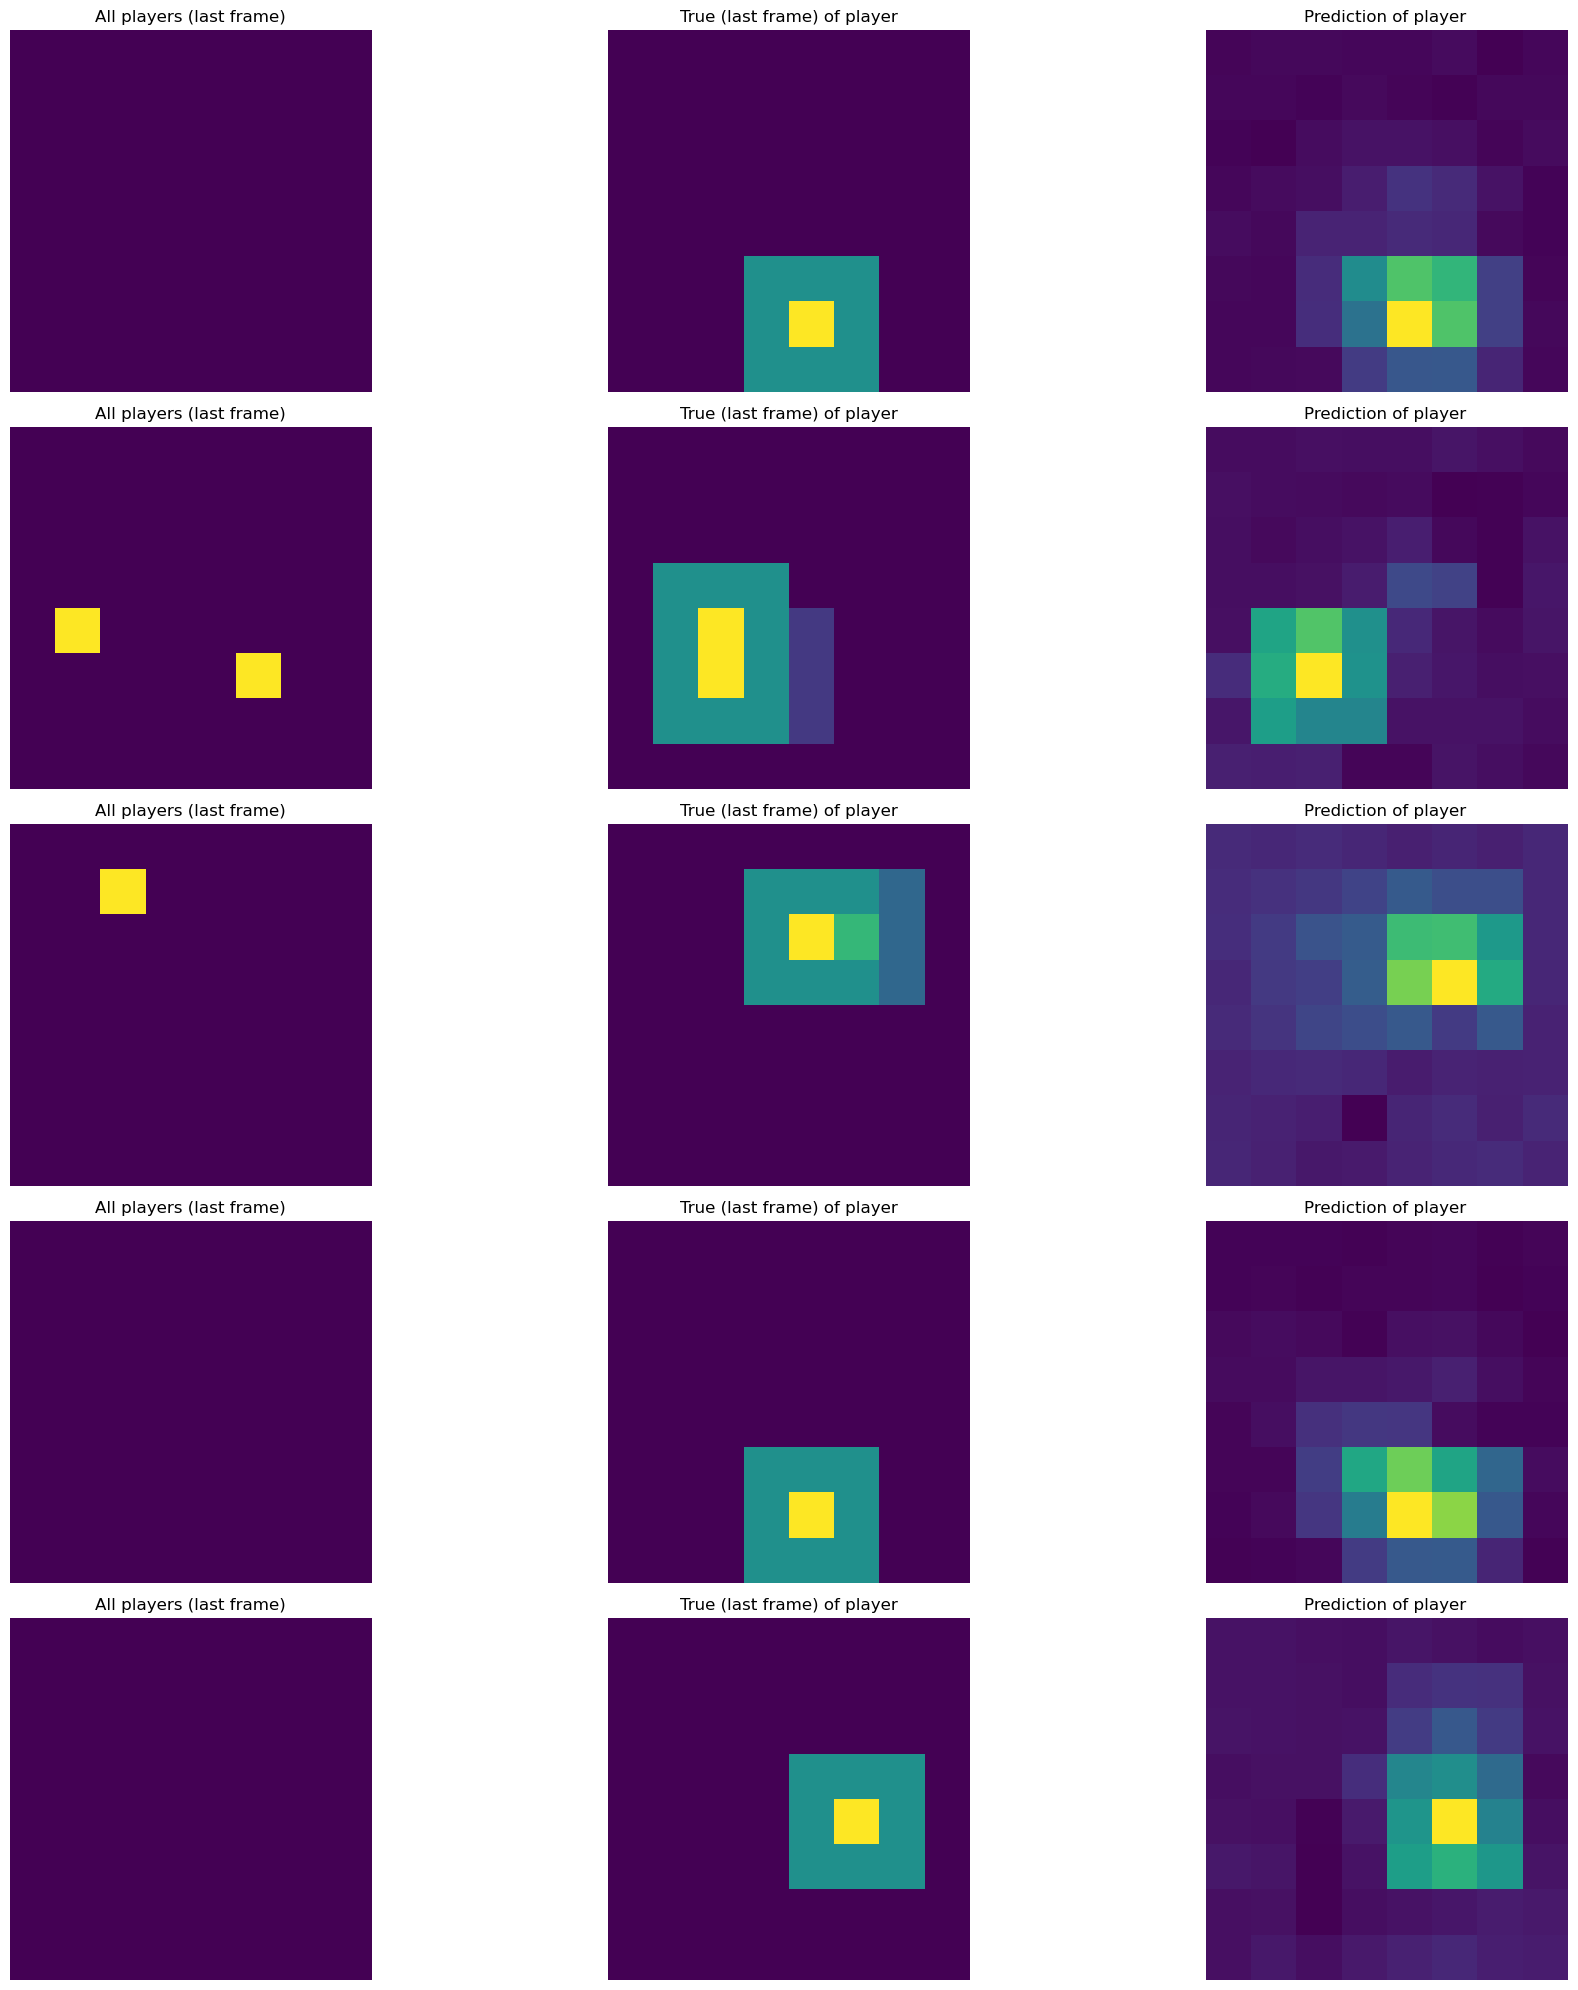

MODELO model0 - ESCENA Scene4
Epoch 1/50
37/37 [==============================] - 14s 224ms/step - loss: 0.0369 - mse: 0.0369 - mae: 0.1063 - val_loss: 0.0332 - val_mse: 0.0332 - val_mae: 0.1161
Epoch 2/50
37/37 [==============================] - 7s 203ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1086 - val_loss: 0.0318 - val_mse: 0.0318 - val_mae: 0.1023
Epoch 3/50
37/37 [==============================] - 7s 203ms/step - loss: 0.0292 - mse: 0.0292 - mae: 0.1011 - val_loss: 0.0297 - val_mse: 0.0297 - val_mae: 0.1013
Epoch 4/50
37/37 [==============================] - 7s 203ms/step - loss: 0.0280 - mse: 0.0280 - mae: 0.0968 - val_loss: 0.0296 - val_mse: 0.0296 - val_mae: 0.1050
Epoch 5/50
37/37 [==============================] - 8s 204ms/step - loss: 0.0263 - mse: 0.0263 - mae: 0.0939 - val_loss: 0.0286 - val_mse: 0.0286 - val_mae: 0.0925
Epoch 6/50
37/37 [==============================] - 8s 203ms/step - loss: 0.0248 - mse: 0.0248 - mae: 0.0882 - val_loss: 0.0261 - val_mse: 0.0261 - v

4/4 [==============================] - 1s 92ms/step


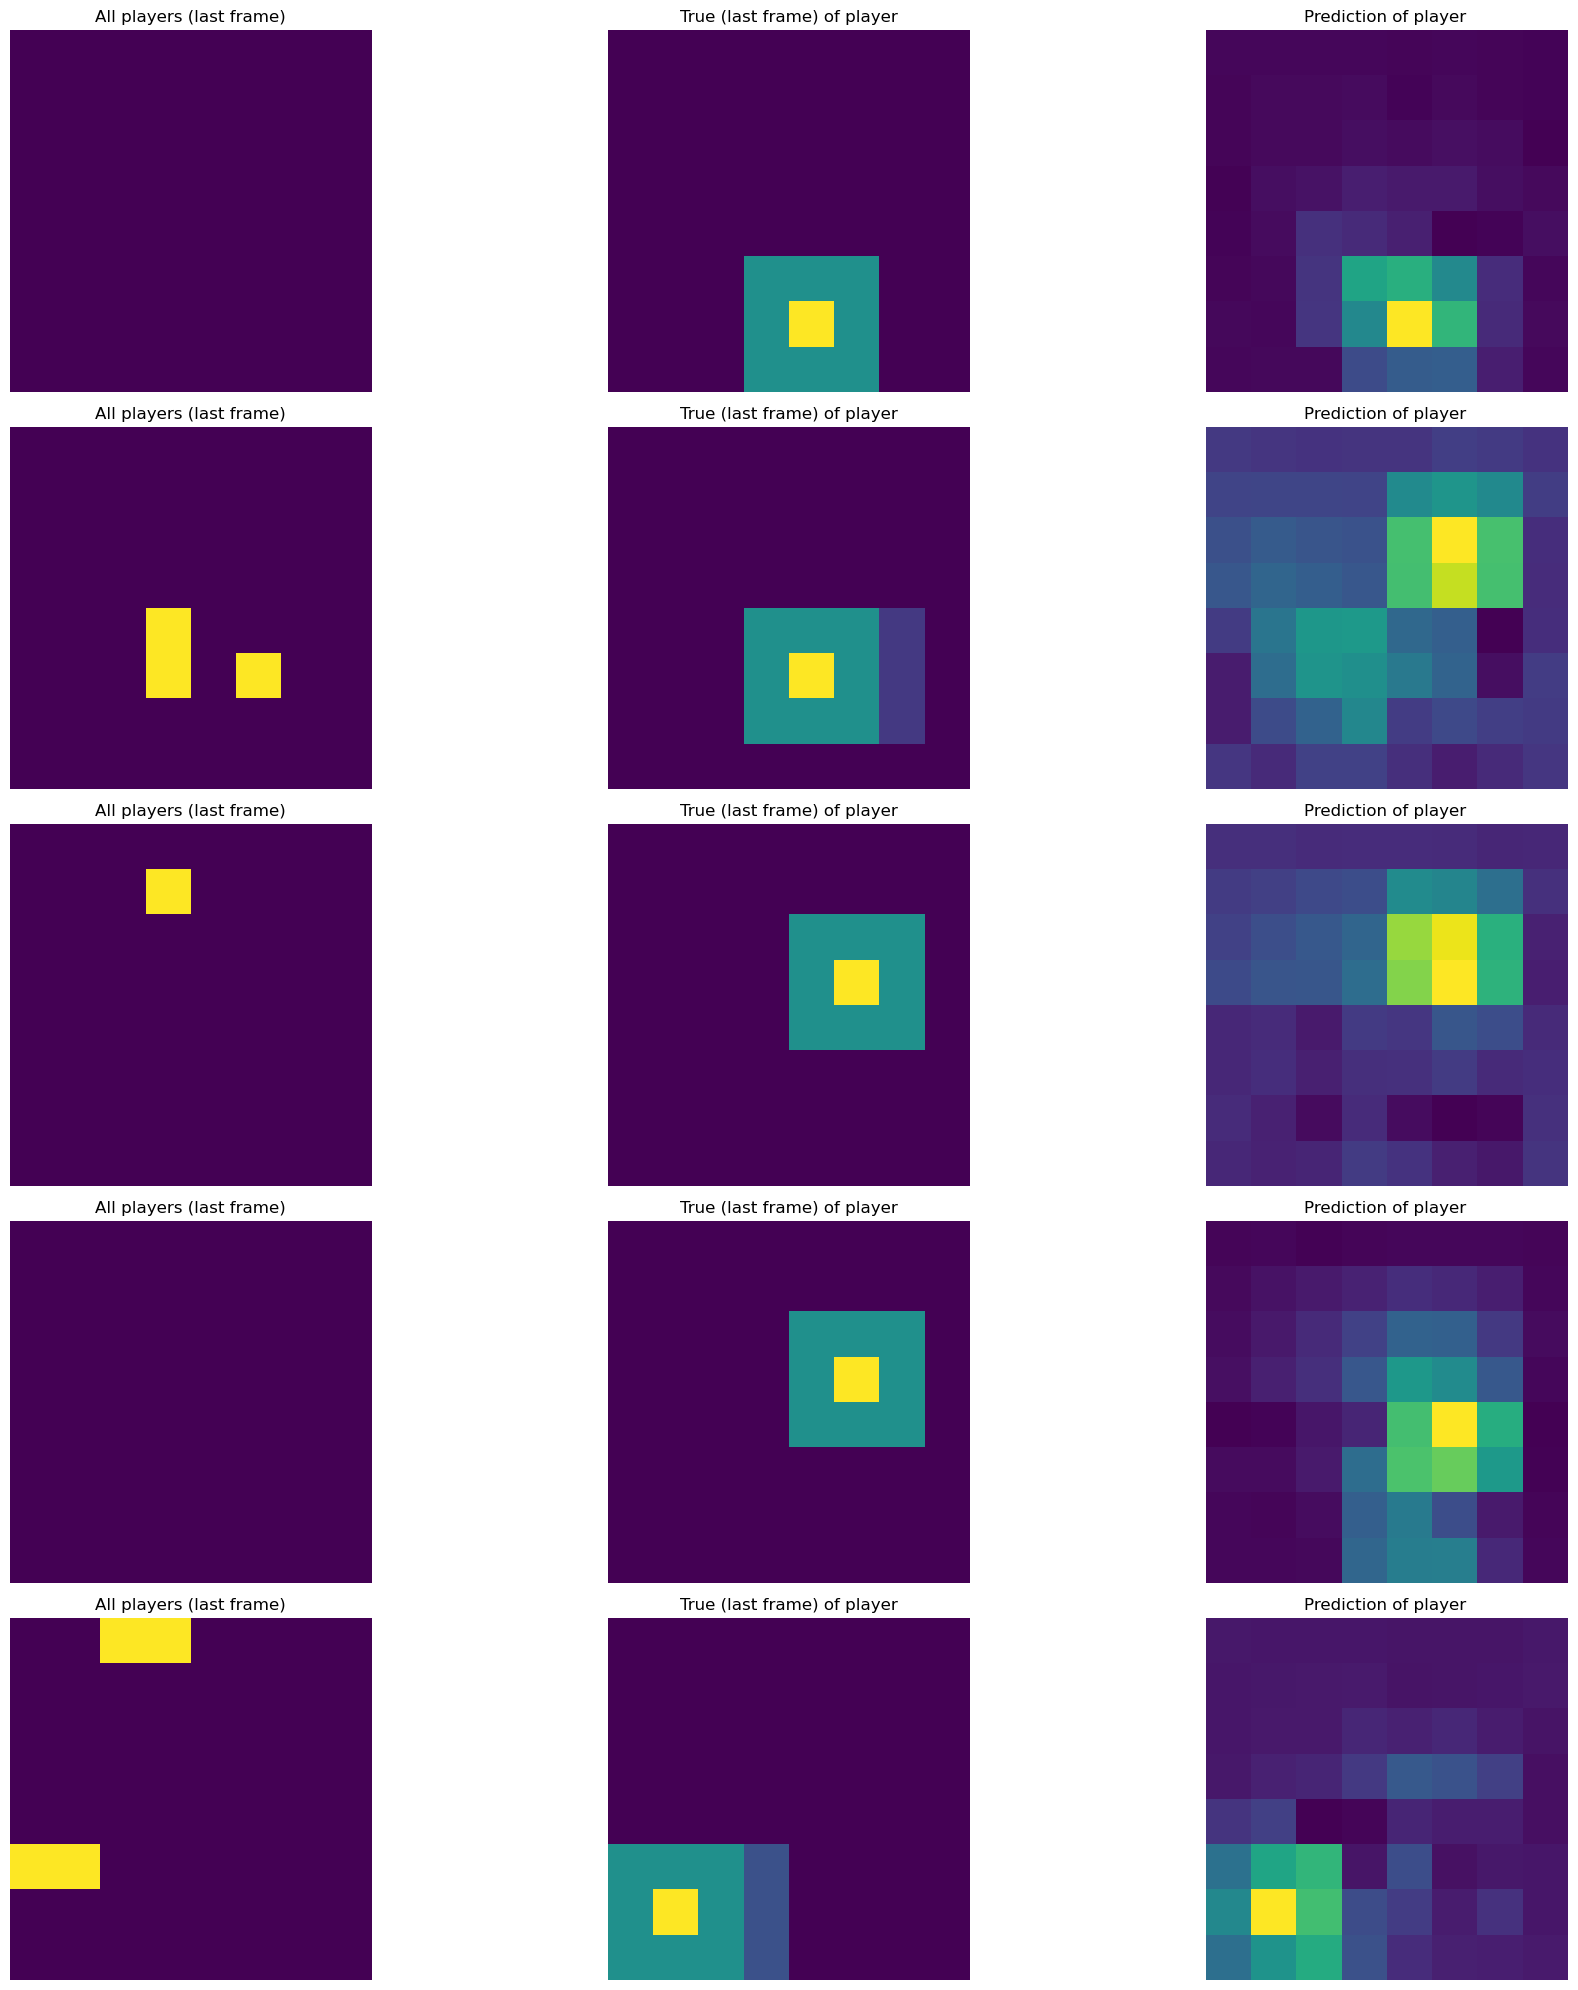

MODELO model1 - ESCENA Scene4
Epoch 1/50
37/37 [==============================] - 7s 147ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1000 - val_loss: 0.0300 - val_mse: 0.0300 - val_mae: 0.1020
Epoch 2/50
37/37 [==============================] - 5s 133ms/step - loss: 0.0252 - mse: 0.0252 - mae: 0.0899 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.0878
Epoch 3/50
37/37 [==============================] - 5s 133ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.0812 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.0836
Epoch 4/50
37/37 [==============================] - 5s 133ms/step - loss: 0.0223 - mse: 0.0223 - mae: 0.0800 - val_loss: 0.0259 - val_mse: 0.0259 - val_mae: 0.0863
Epoch 5/50
37/37 [==============================] - 5s 133ms/step - loss: 0.0220 - mse: 0.0220 - mae: 0.0791 - val_loss: 0.0263 - val_mse: 0.0263 - val_mae: 0.0868
Epoch 6/50
37/37 [==============================] - 5s 133ms/step - loss: 0.0216 - mse: 0.0216 - mae: 0.0776 - val_loss: 0.0255 - val_mse: 0.0255 - va

4/4 [==============================] - 1s 32ms/step


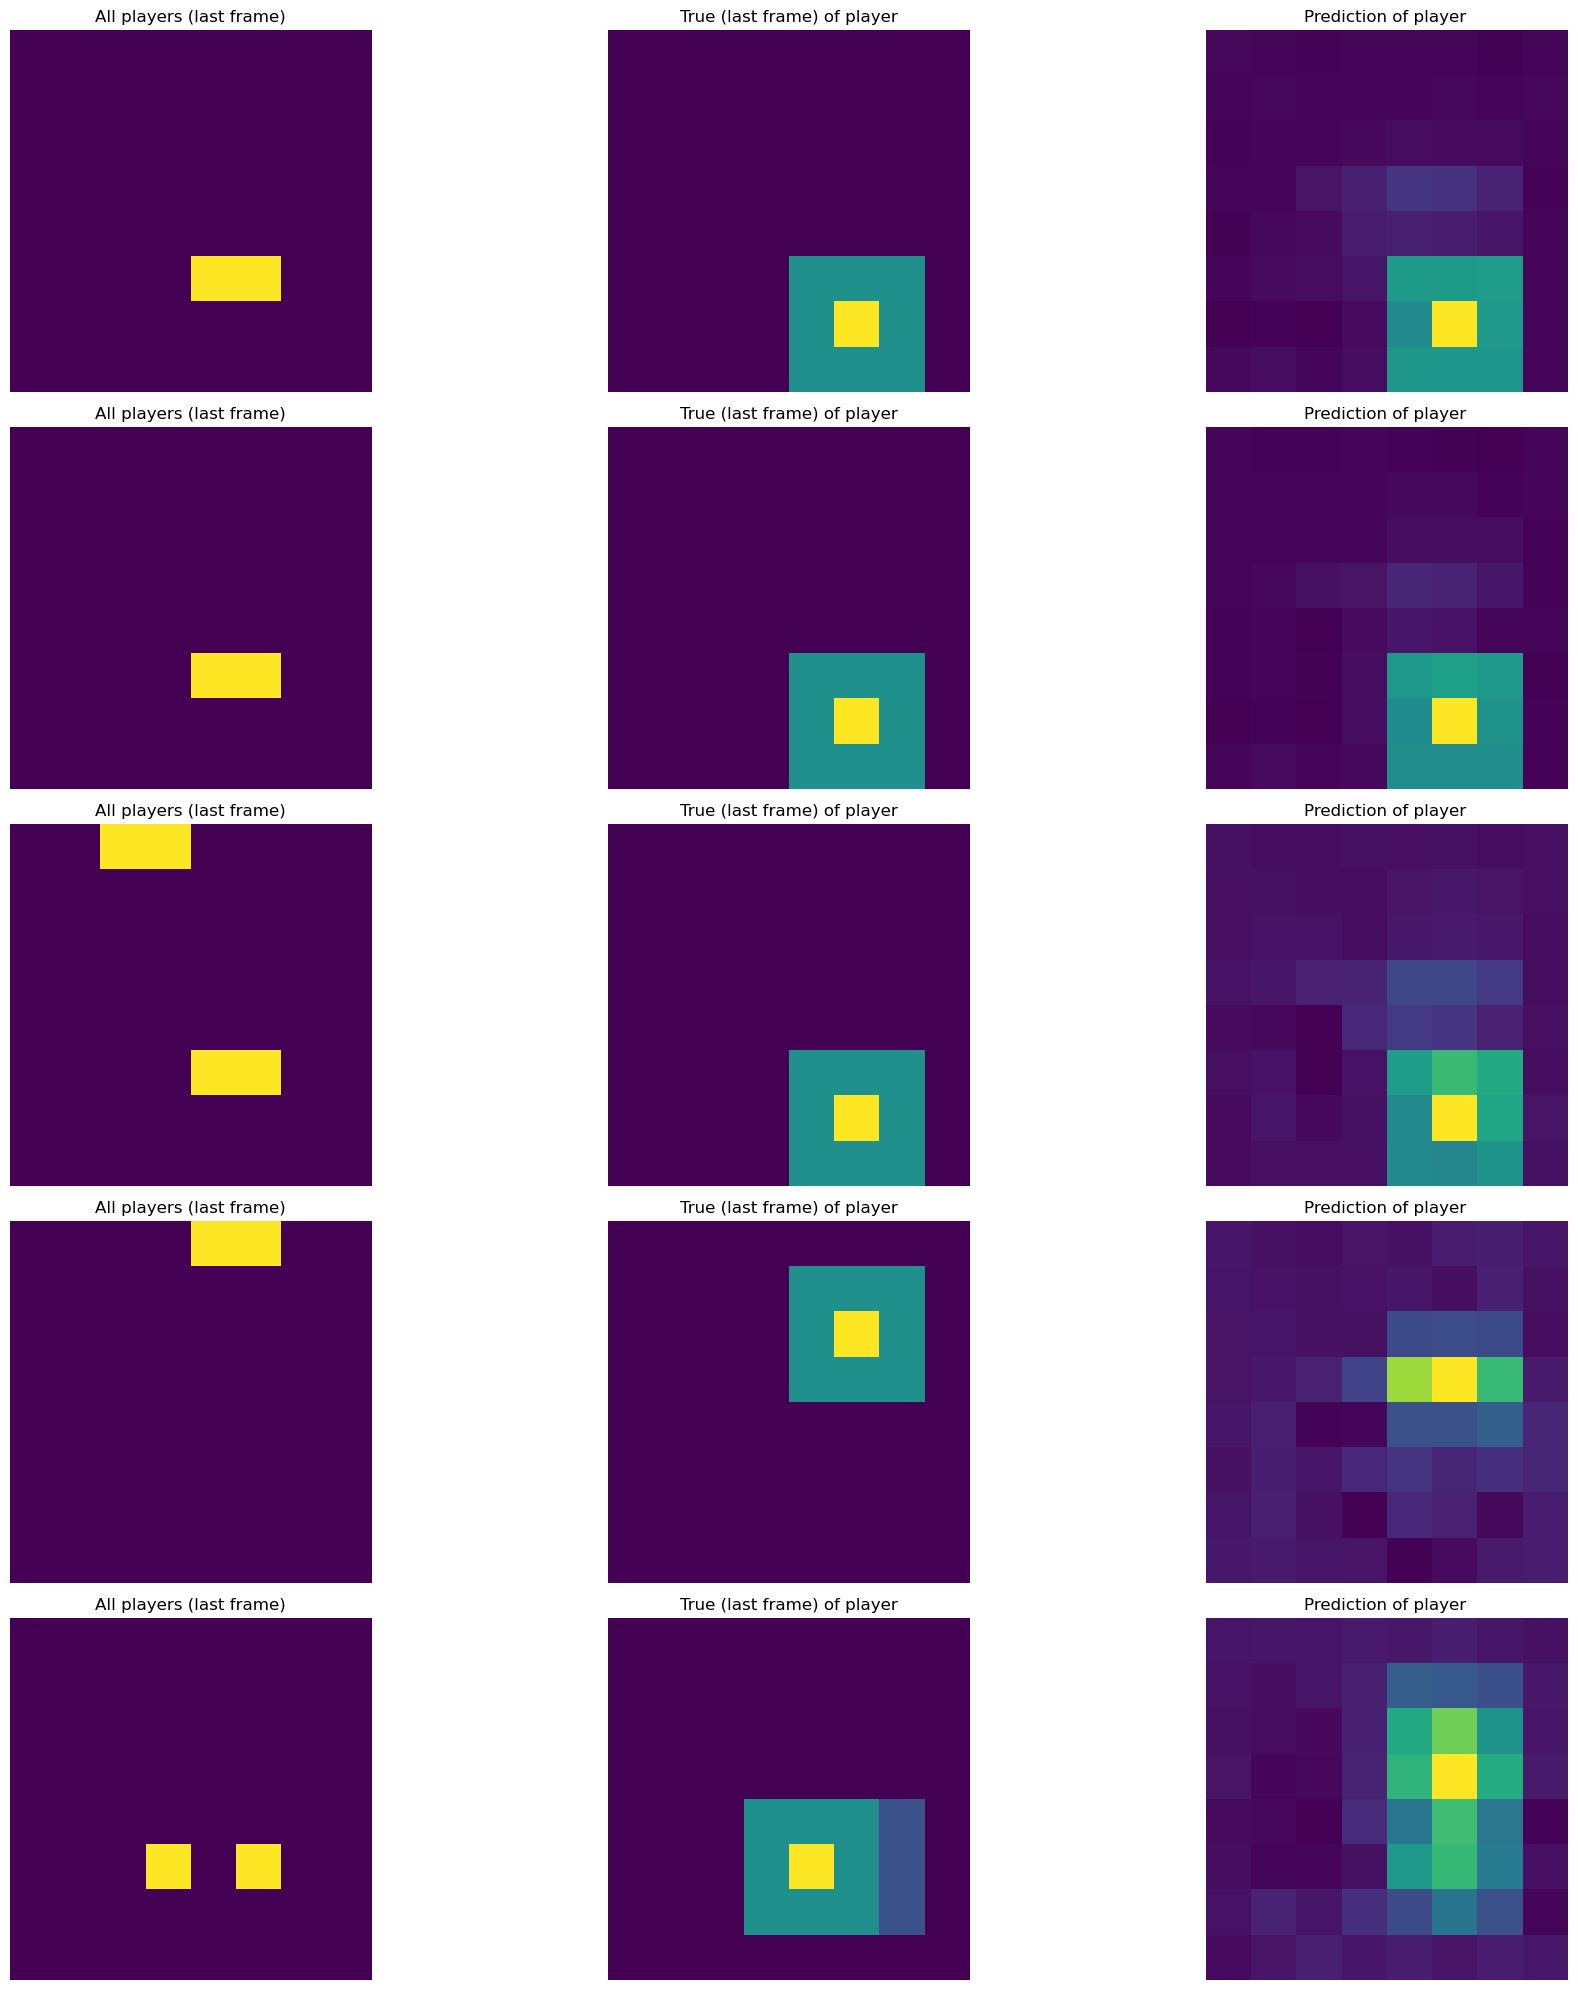

MODELO model2 - ESCENA Scene4
Epoch 1/50
37/37 [==============================] - 10s 228ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1004 - val_loss: 0.0282 - val_mse: 0.0282 - val_mae: 0.1003
Epoch 2/50
37/37 [==============================] - 8s 214ms/step - loss: 0.0250 - mse: 0.0250 - mae: 0.0895 - val_loss: 0.0271 - val_mse: 0.0271 - val_mae: 0.0868
Epoch 3/50
37/37 [==============================] - 8s 221ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.0819 - val_loss: 0.0269 - val_mse: 0.0269 - val_mae: 0.0856
Epoch 4/50
37/37 [==============================] - 8s 221ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0790 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.0852
Epoch 5/50
37/37 [==============================] - 8s 219ms/step - loss: 0.0209 - mse: 0.0209 - mae: 0.0764 - val_loss: 0.0265 - val_mse: 0.0265 - val_mae: 0.0870
Epoch 6/50
37/37 [==============================] - 8s 216ms/step - loss: 0.0206 - mse: 0.0206 - mae: 0.0759 - val_loss: 0.0264 - val_mse: 0.0264 - v

4/4 [==============================] - 1s 106ms/step


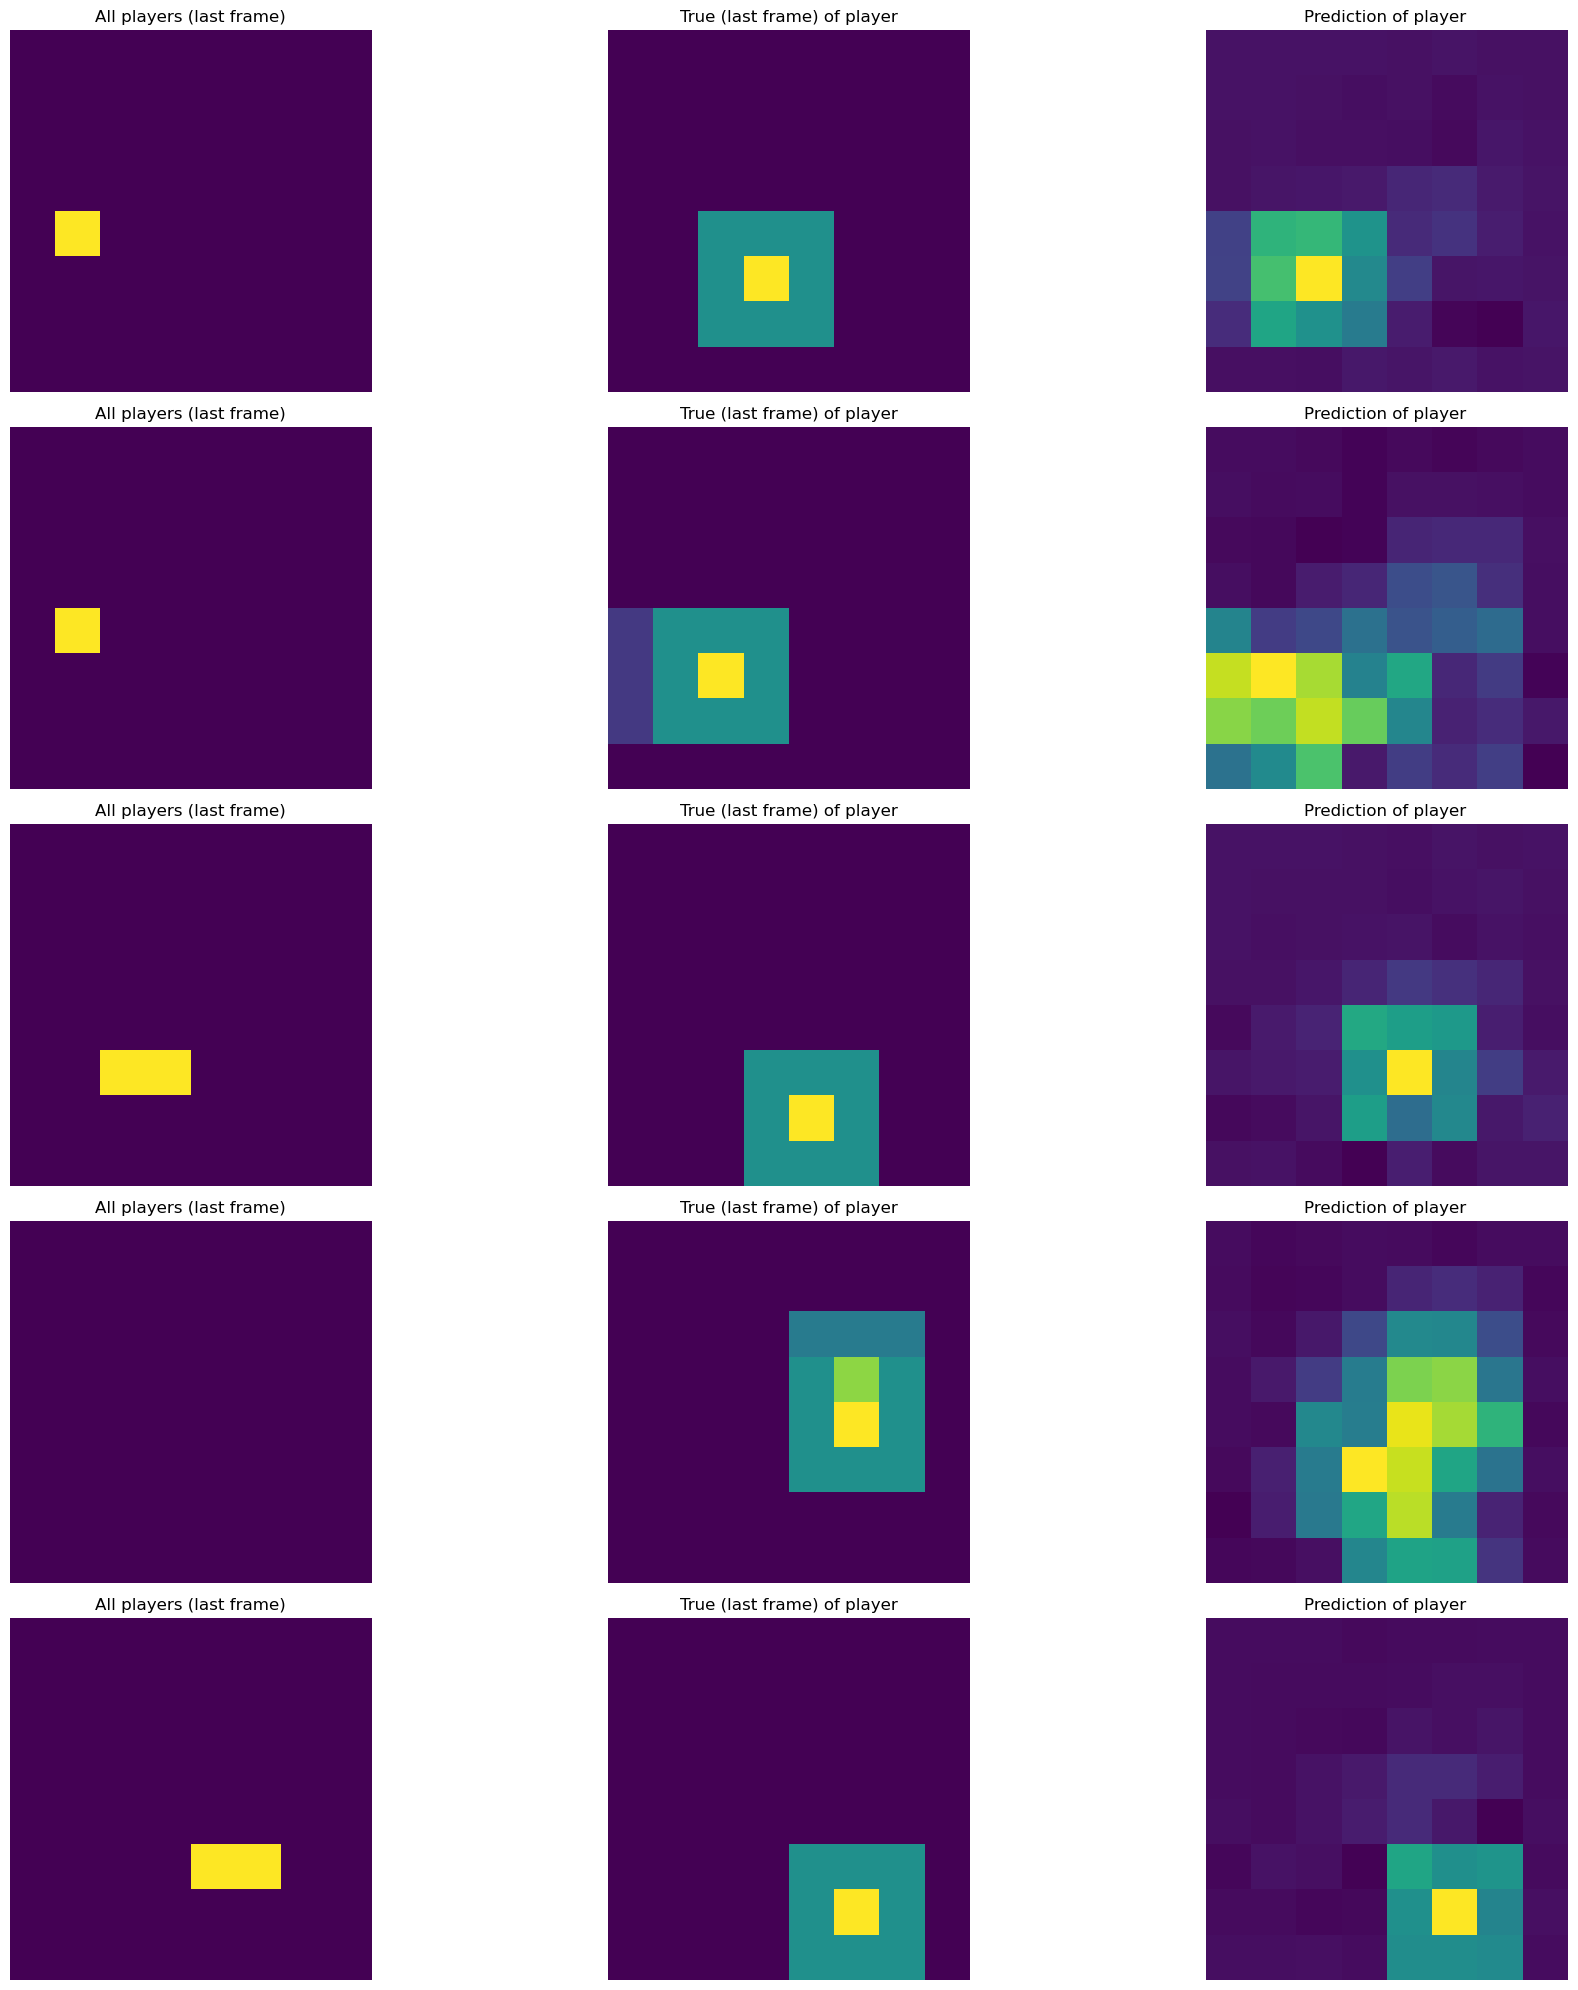

MODELO transf1 - ESCENA Scene4
Epoch 1/50
37/37 [==============================] - 77s 2s/step - loss: 0.0352 - mse: 0.0352 - mae: 0.1156 - val_loss: 0.0314 - val_mse: 0.0314 - val_mae: 0.1032
Epoch 2/50
37/37 [==============================] - 75s 2s/step - loss: 0.0270 - mse: 0.0270 - mae: 0.0990 - val_loss: 0.0294 - val_mse: 0.0294 - val_mae: 0.1008
Epoch 3/50
37/37 [==============================] - 76s 2s/step - loss: 0.0248 - mse: 0.0248 - mae: 0.0915 - val_loss: 0.0276 - val_mse: 0.0276 - val_mae: 0.0957
Epoch 4/50
37/37 [==============================] - 76s 2s/step - loss: 0.0221 - mse: 0.0221 - mae: 0.0844 - val_loss: 0.0263 - val_mse: 0.0263 - val_mae: 0.0892
Epoch 5/50
37/37 [==============================] - 75s 2s/step - loss: 0.0207 - mse: 0.0207 - mae: 0.0806 - val_loss: 0.0258 - val_mse: 0.0258 - val_mae: 0.0868
Epoch 6/50
37/37 [==============================] - 75s 2s/step - loss: 0.0199 - mse: 0.0199 - mae: 0.0782 - val_loss: 0.0262 - val_mse: 0.0262 - val_mae: 0.08

4/4 [==============================] - 6s 1s/step


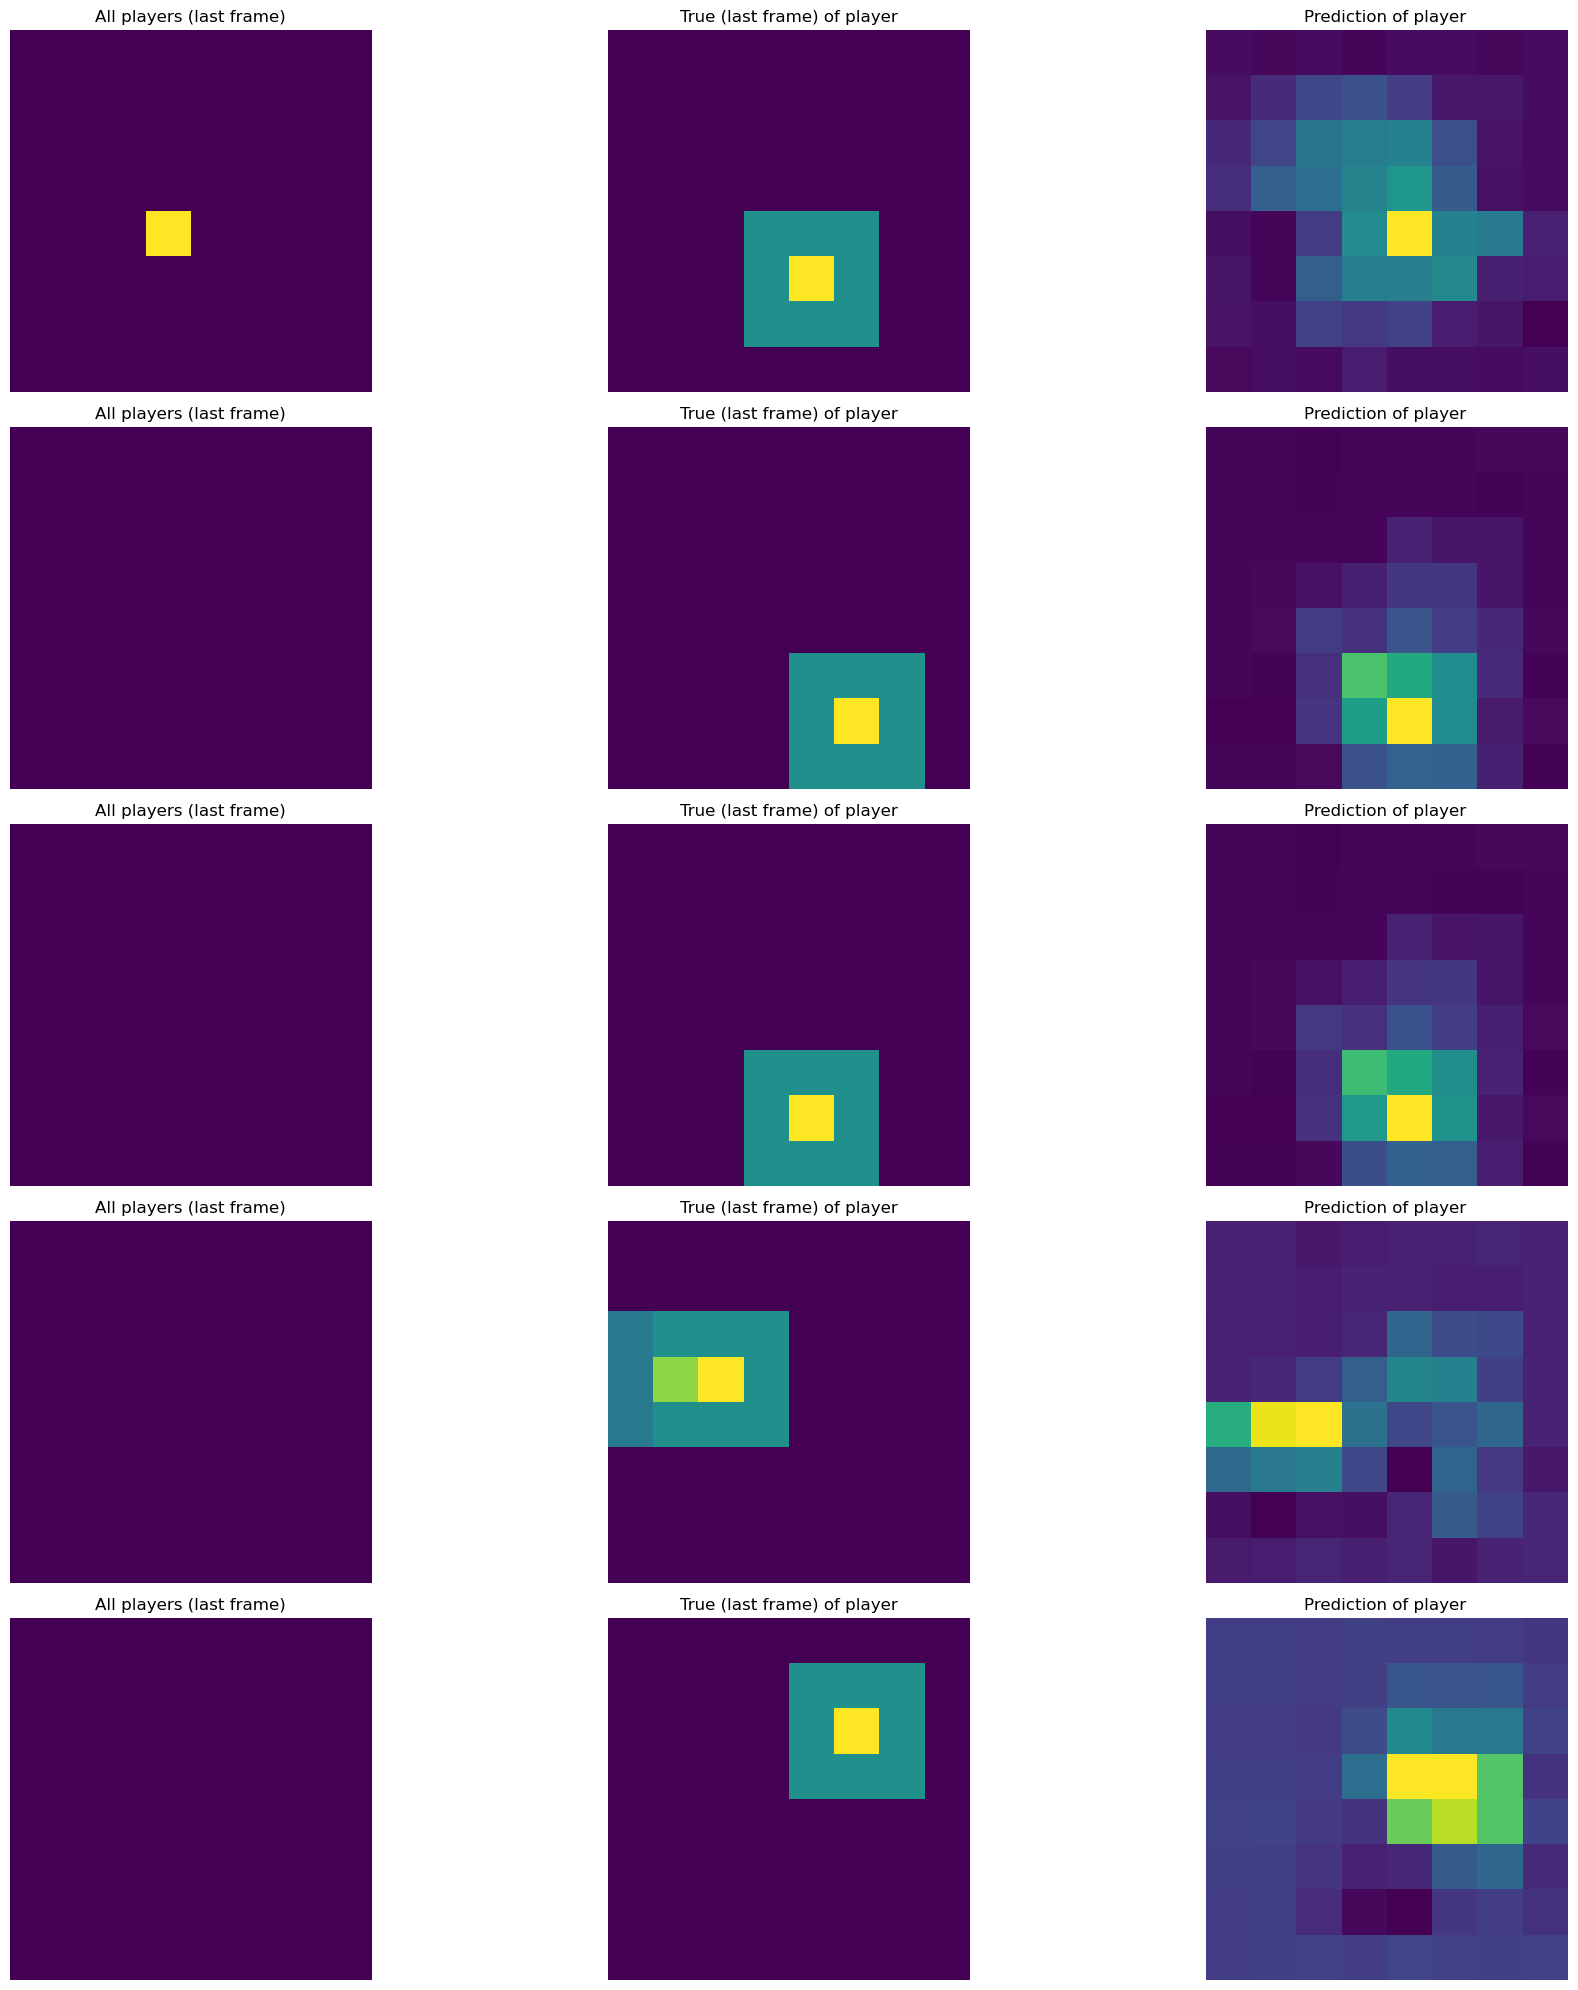

MODELO model0 - ESCENA Scene5
Epoch 1/50
35/35 [==============================] - 14s 229ms/step - loss: 0.0375 - mse: 0.0375 - mae: 0.1074 - val_loss: 0.0332 - val_mse: 0.0332 - val_mae: 0.1168
Epoch 2/50
35/35 [==============================] - 7s 206ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1109 - val_loss: 0.0304 - val_mse: 0.0304 - val_mae: 0.1037
Epoch 3/50
35/35 [==============================] - 7s 206ms/step - loss: 0.0294 - mse: 0.0294 - mae: 0.1016 - val_loss: 0.0291 - val_mse: 0.0291 - val_mae: 0.1000
Epoch 4/50
35/35 [==============================] - 7s 207ms/step - loss: 0.0277 - mse: 0.0277 - mae: 0.0981 - val_loss: 0.0273 - val_mse: 0.0273 - val_mae: 0.0935
Epoch 5/50
35/35 [==============================] - 7s 207ms/step - loss: 0.0256 - mse: 0.0256 - mae: 0.0912 - val_loss: 0.0272 - val_mse: 0.0272 - val_mae: 0.0952
Epoch 6/50
35/35 [==============================] - 7s 206ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.0878 - val_loss: 0.0269 - val_mse: 0.0269 - v

5/5 [==============================] - 1s 89ms/step


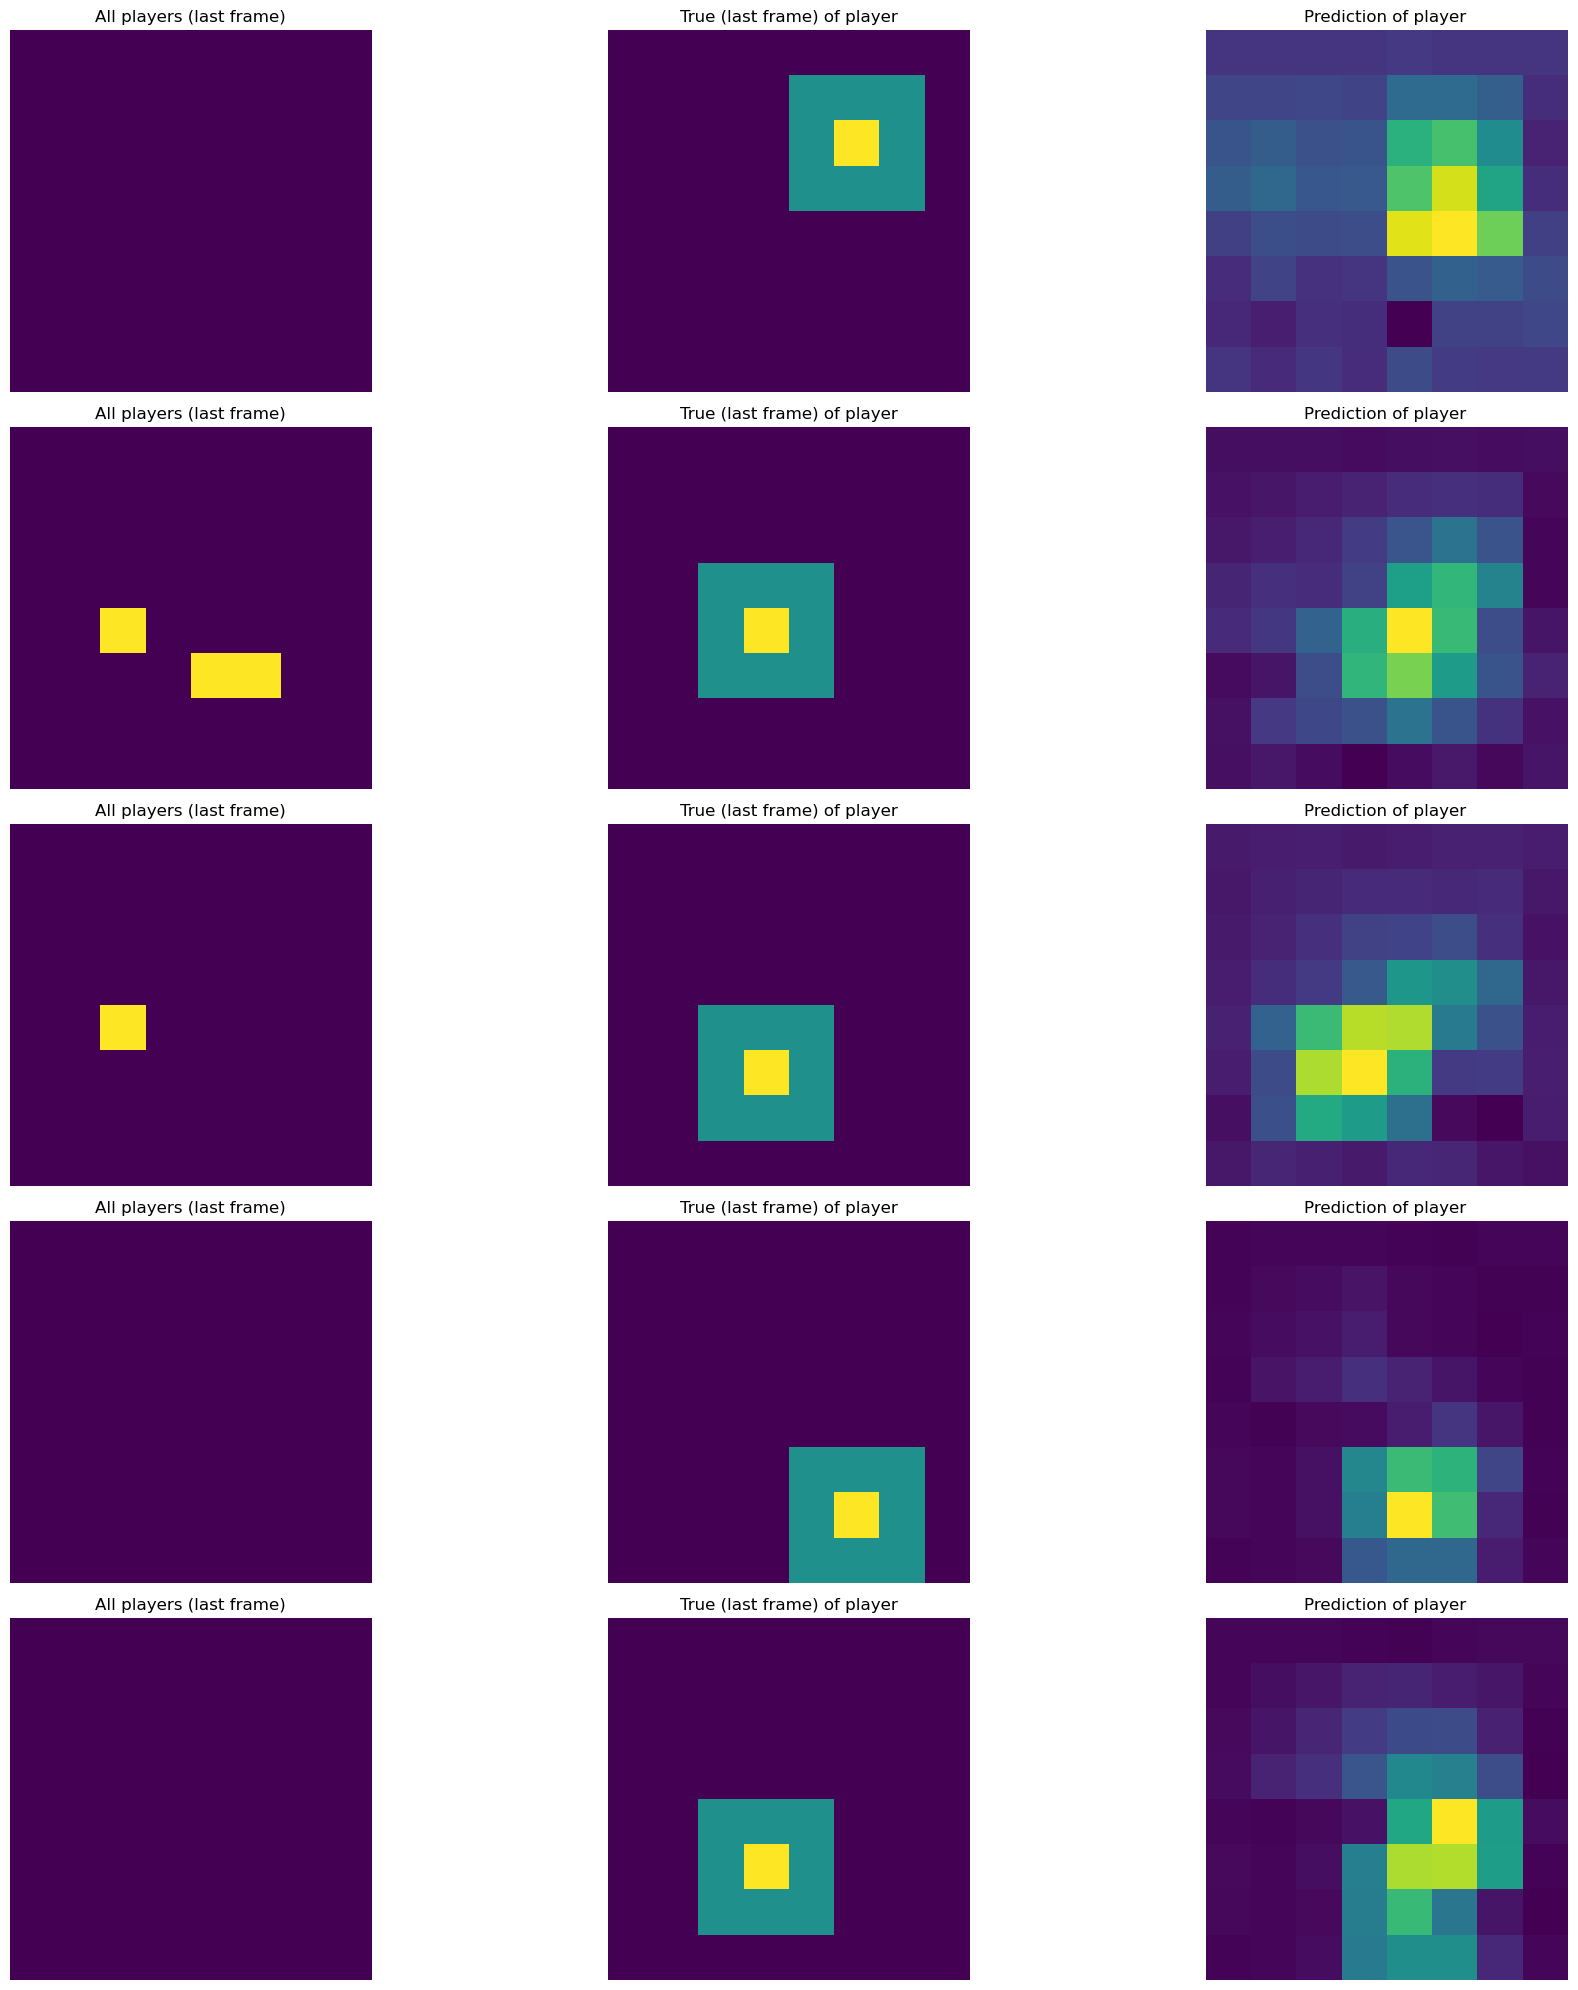

MODELO model1 - ESCENA Scene5
Epoch 1/50
35/35 [==============================] - 7s 145ms/step - loss: 0.0332 - mse: 0.0332 - mae: 0.0993 - val_loss: 0.0305 - val_mse: 0.0305 - val_mae: 0.1024
Epoch 2/50
35/35 [==============================] - 4s 126ms/step - loss: 0.0255 - mse: 0.0255 - mae: 0.0916 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.0923
Epoch 3/50
35/35 [==============================] - 4s 126ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.0840 - val_loss: 0.0256 - val_mse: 0.0256 - val_mae: 0.0838
Epoch 4/50
35/35 [==============================] - 4s 126ms/step - loss: 0.0226 - mse: 0.0226 - mae: 0.0813 - val_loss: 0.0259 - val_mse: 0.0259 - val_mae: 0.0859
Epoch 5/50
35/35 [==============================] - 4s 127ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.0793 - val_loss: 0.0274 - val_mse: 0.0274 - val_mae: 0.0888
Epoch 6/50
35/35 [==============================] - 4s 127ms/step - loss: 0.0220 - mse: 0.0220 - mae: 0.0795 - val_loss: 0.0257 - val_mse: 0.0257 - va

5/5 [==============================] - 1s 30ms/step


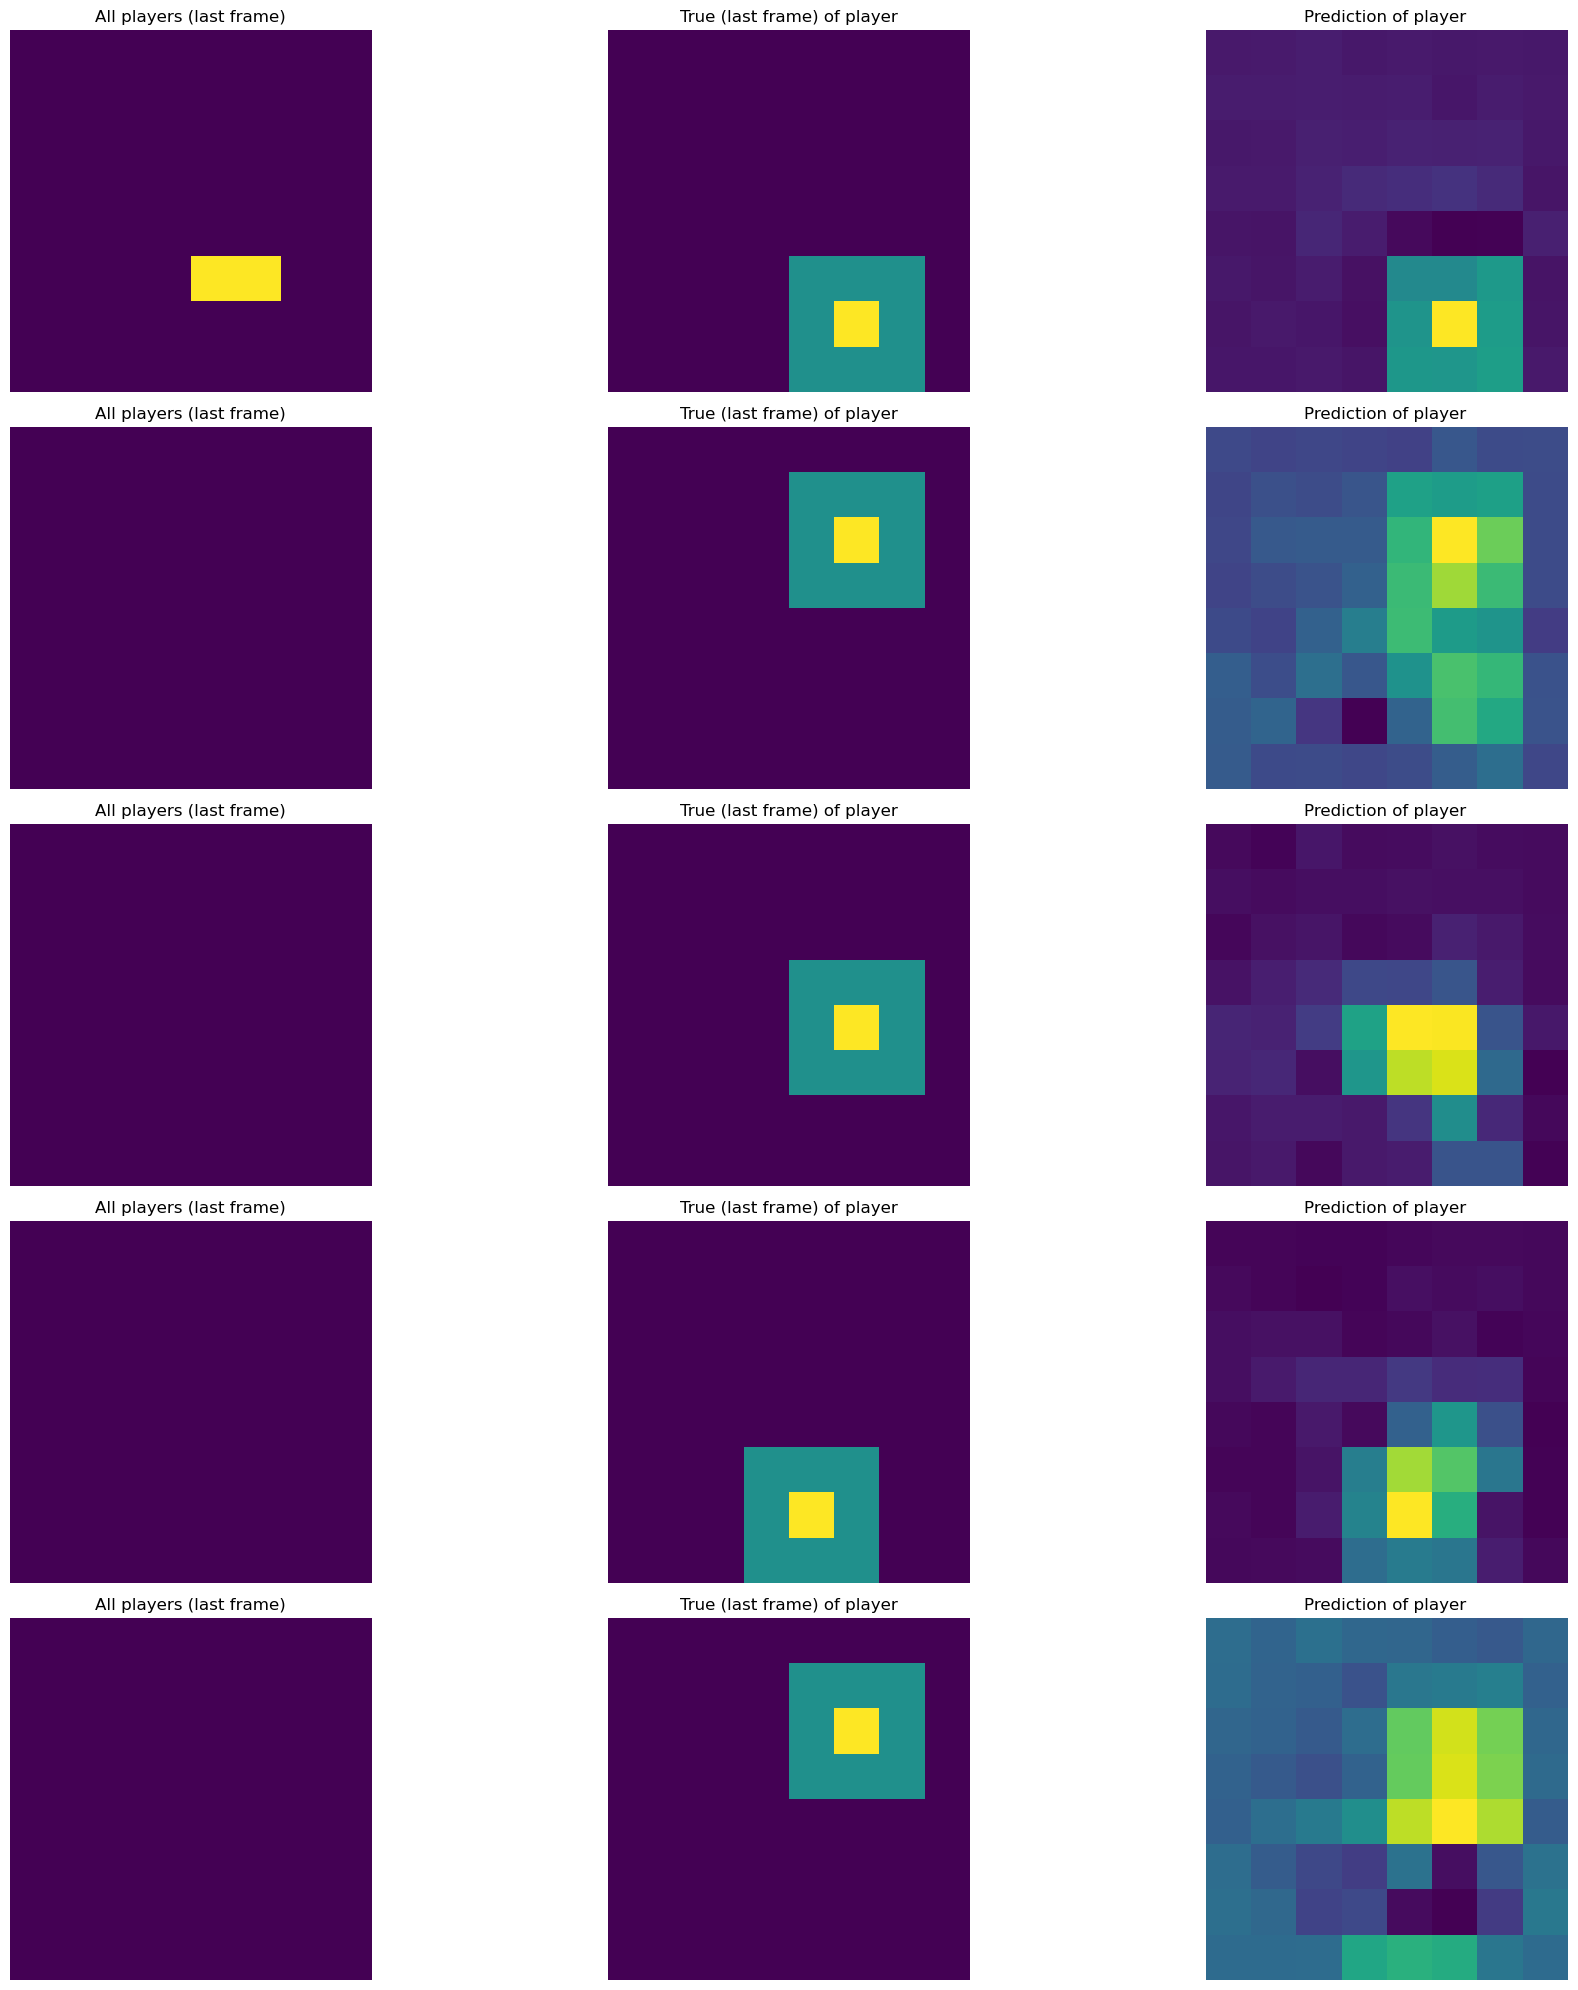

MODELO model2 - ESCENA Scene5
Epoch 1/50
35/35 [==============================] - 10s 246ms/step - loss: 0.0329 - mse: 0.0329 - mae: 0.1009 - val_loss: 0.0302 - val_mse: 0.0302 - val_mae: 0.0977
Epoch 2/50
35/35 [==============================] - 8s 228ms/step - loss: 0.0250 - mse: 0.0250 - mae: 0.0887 - val_loss: 0.0259 - val_mse: 0.0259 - val_mae: 0.0865
Epoch 3/50
35/35 [==============================] - 8s 228ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.0830 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae: 0.0866
Epoch 4/50
35/35 [==============================] - 8s 229ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.0804 - val_loss: 0.0263 - val_mse: 0.0263 - val_mae: 0.0858
Epoch 5/50
35/35 [==============================] - 8s 229ms/step - loss: 0.0216 - mse: 0.0216 - mae: 0.0785 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.0863
Epoch 6/50
35/35 [==============================] - 8s 228ms/step - loss: 0.0211 - mse: 0.0211 - mae: 0.0770 - val_loss: 0.0262 - val_mse: 0.0262 - v

5/5 [==============================] - 1s 108ms/step


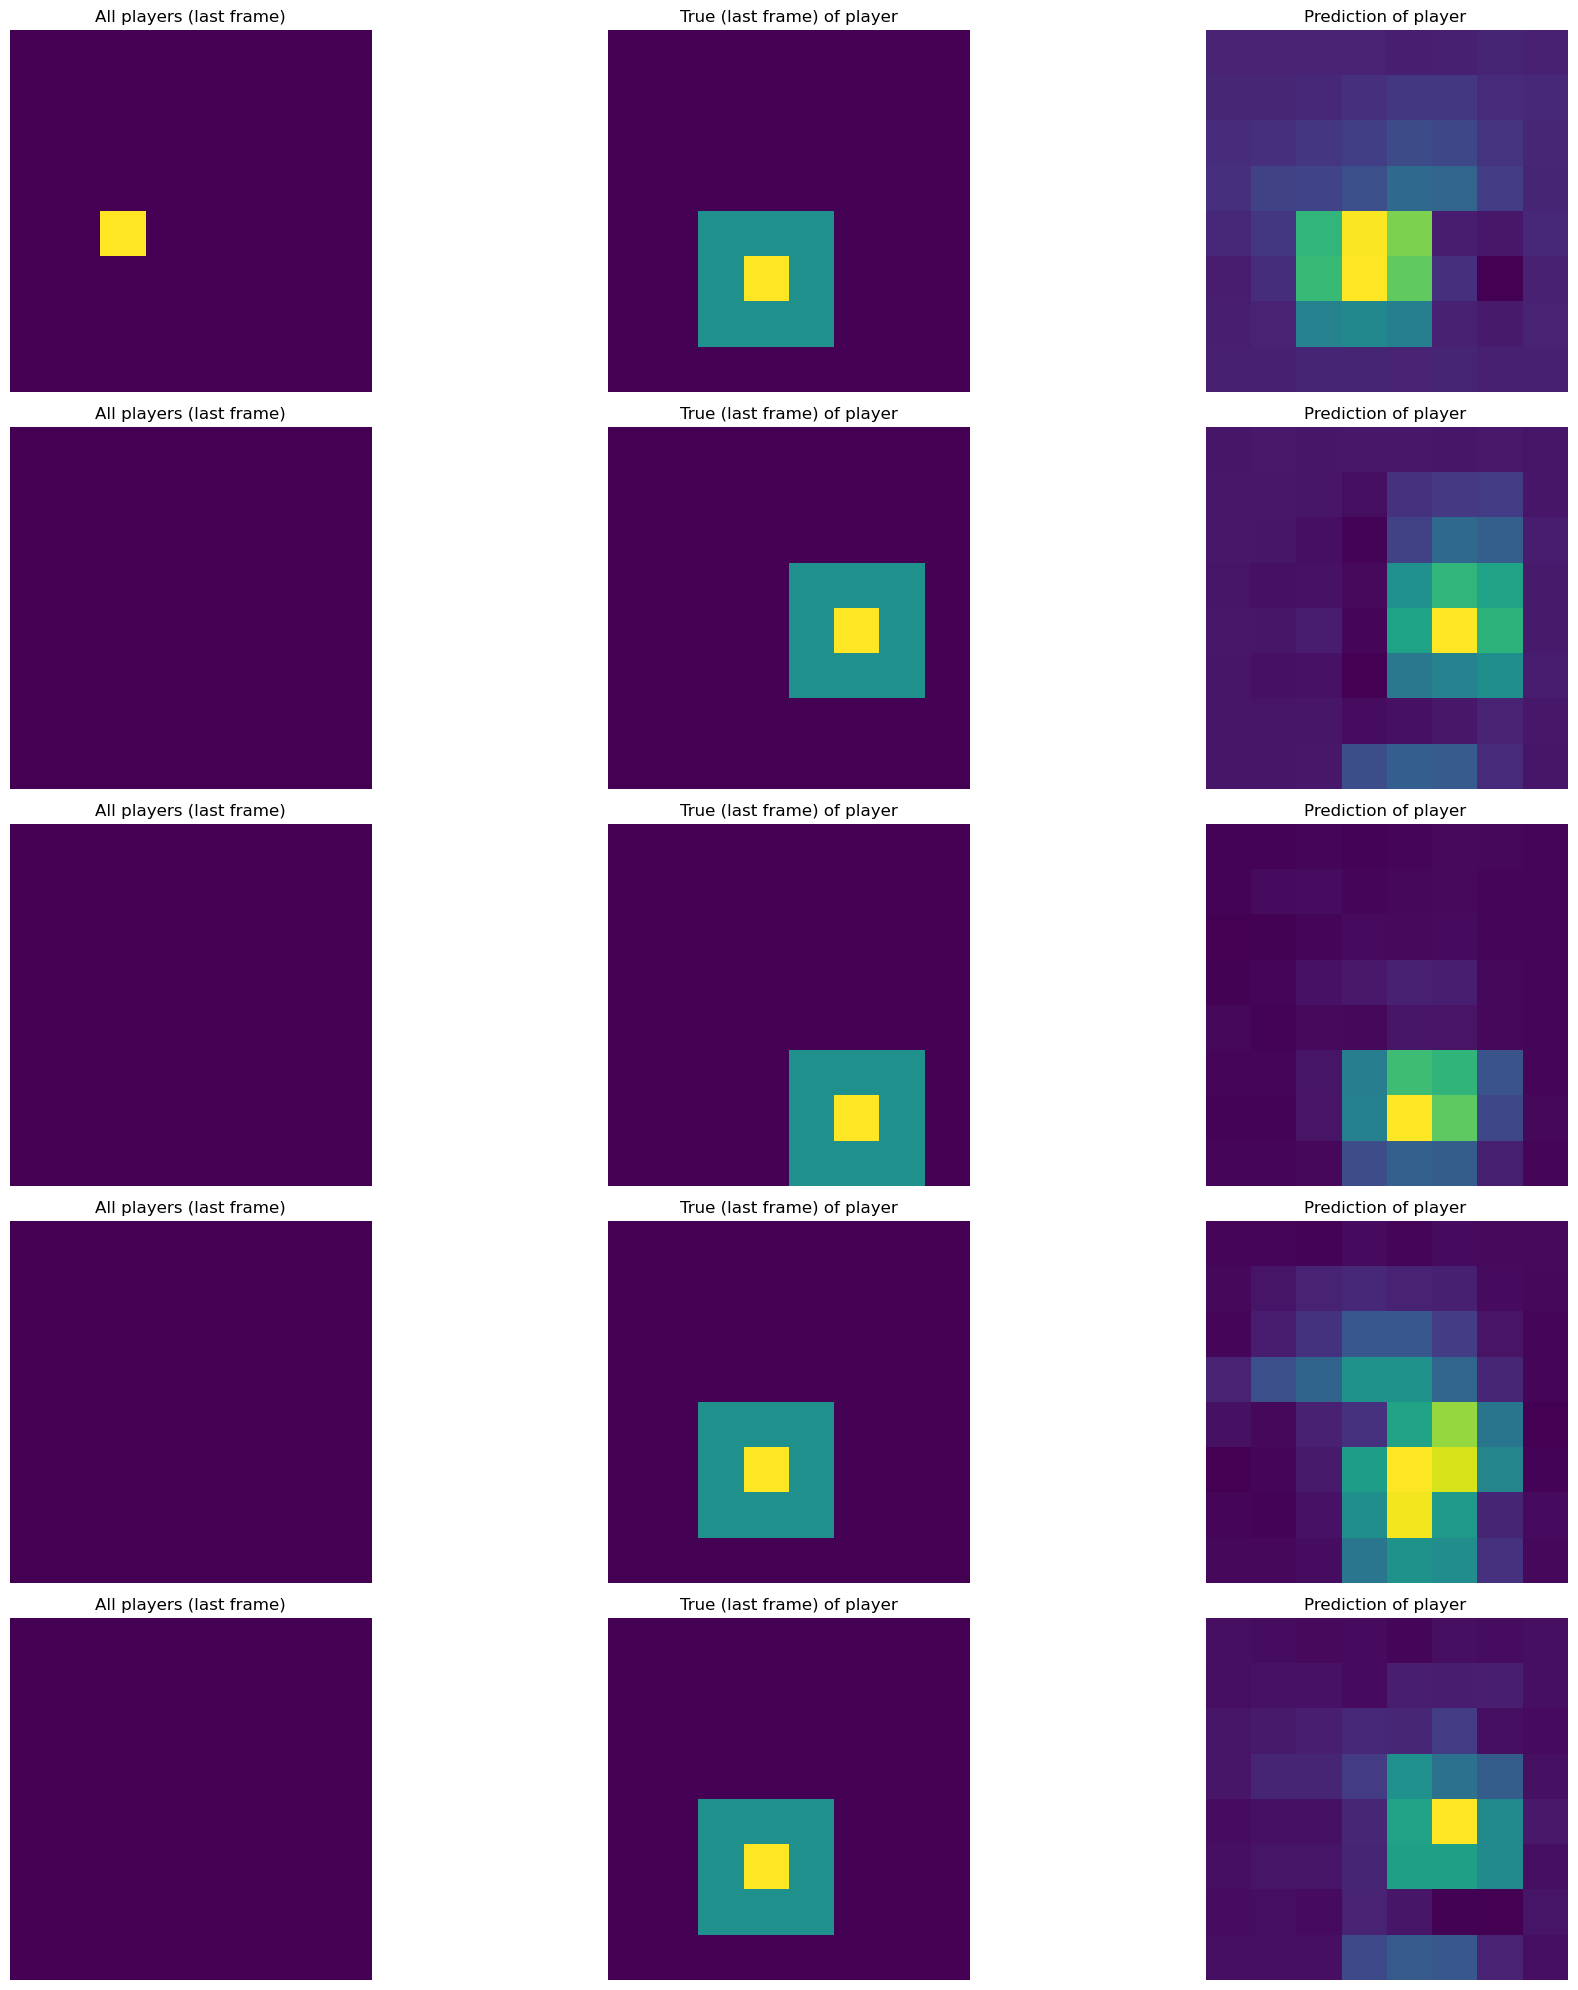

MODELO transf1 - ESCENA Scene5
Epoch 1/50
35/35 [==============================] - 75s 2s/step - loss: 0.0363 - mse: 0.0363 - mae: 0.1176 - val_loss: 0.0302 - val_mse: 0.0302 - val_mae: 0.1030
Epoch 2/50
35/35 [==============================] - 73s 2s/step - loss: 0.0274 - mse: 0.0274 - mae: 0.1005 - val_loss: 0.0292 - val_mse: 0.0292 - val_mae: 0.0932
Epoch 3/50
35/35 [==============================] - 74s 2s/step - loss: 0.0247 - mse: 0.0247 - mae: 0.0921 - val_loss: 0.0276 - val_mse: 0.0276 - val_mae: 0.0917
Epoch 4/50
35/35 [==============================] - 74s 2s/step - loss: 0.0230 - mse: 0.0230 - mae: 0.0866 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.0895
Epoch 5/50
35/35 [==============================] - 74s 2s/step - loss: 0.0217 - mse: 0.0217 - mae: 0.0832 - val_loss: 0.0257 - val_mse: 0.0257 - val_mae: 0.0907
Epoch 6/50
35/35 [==============================] - 74s 2s/step - loss: 0.0211 - mse: 0.0211 - mae: 0.0816 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.09

5/5 [==============================] - 7s 1s/step


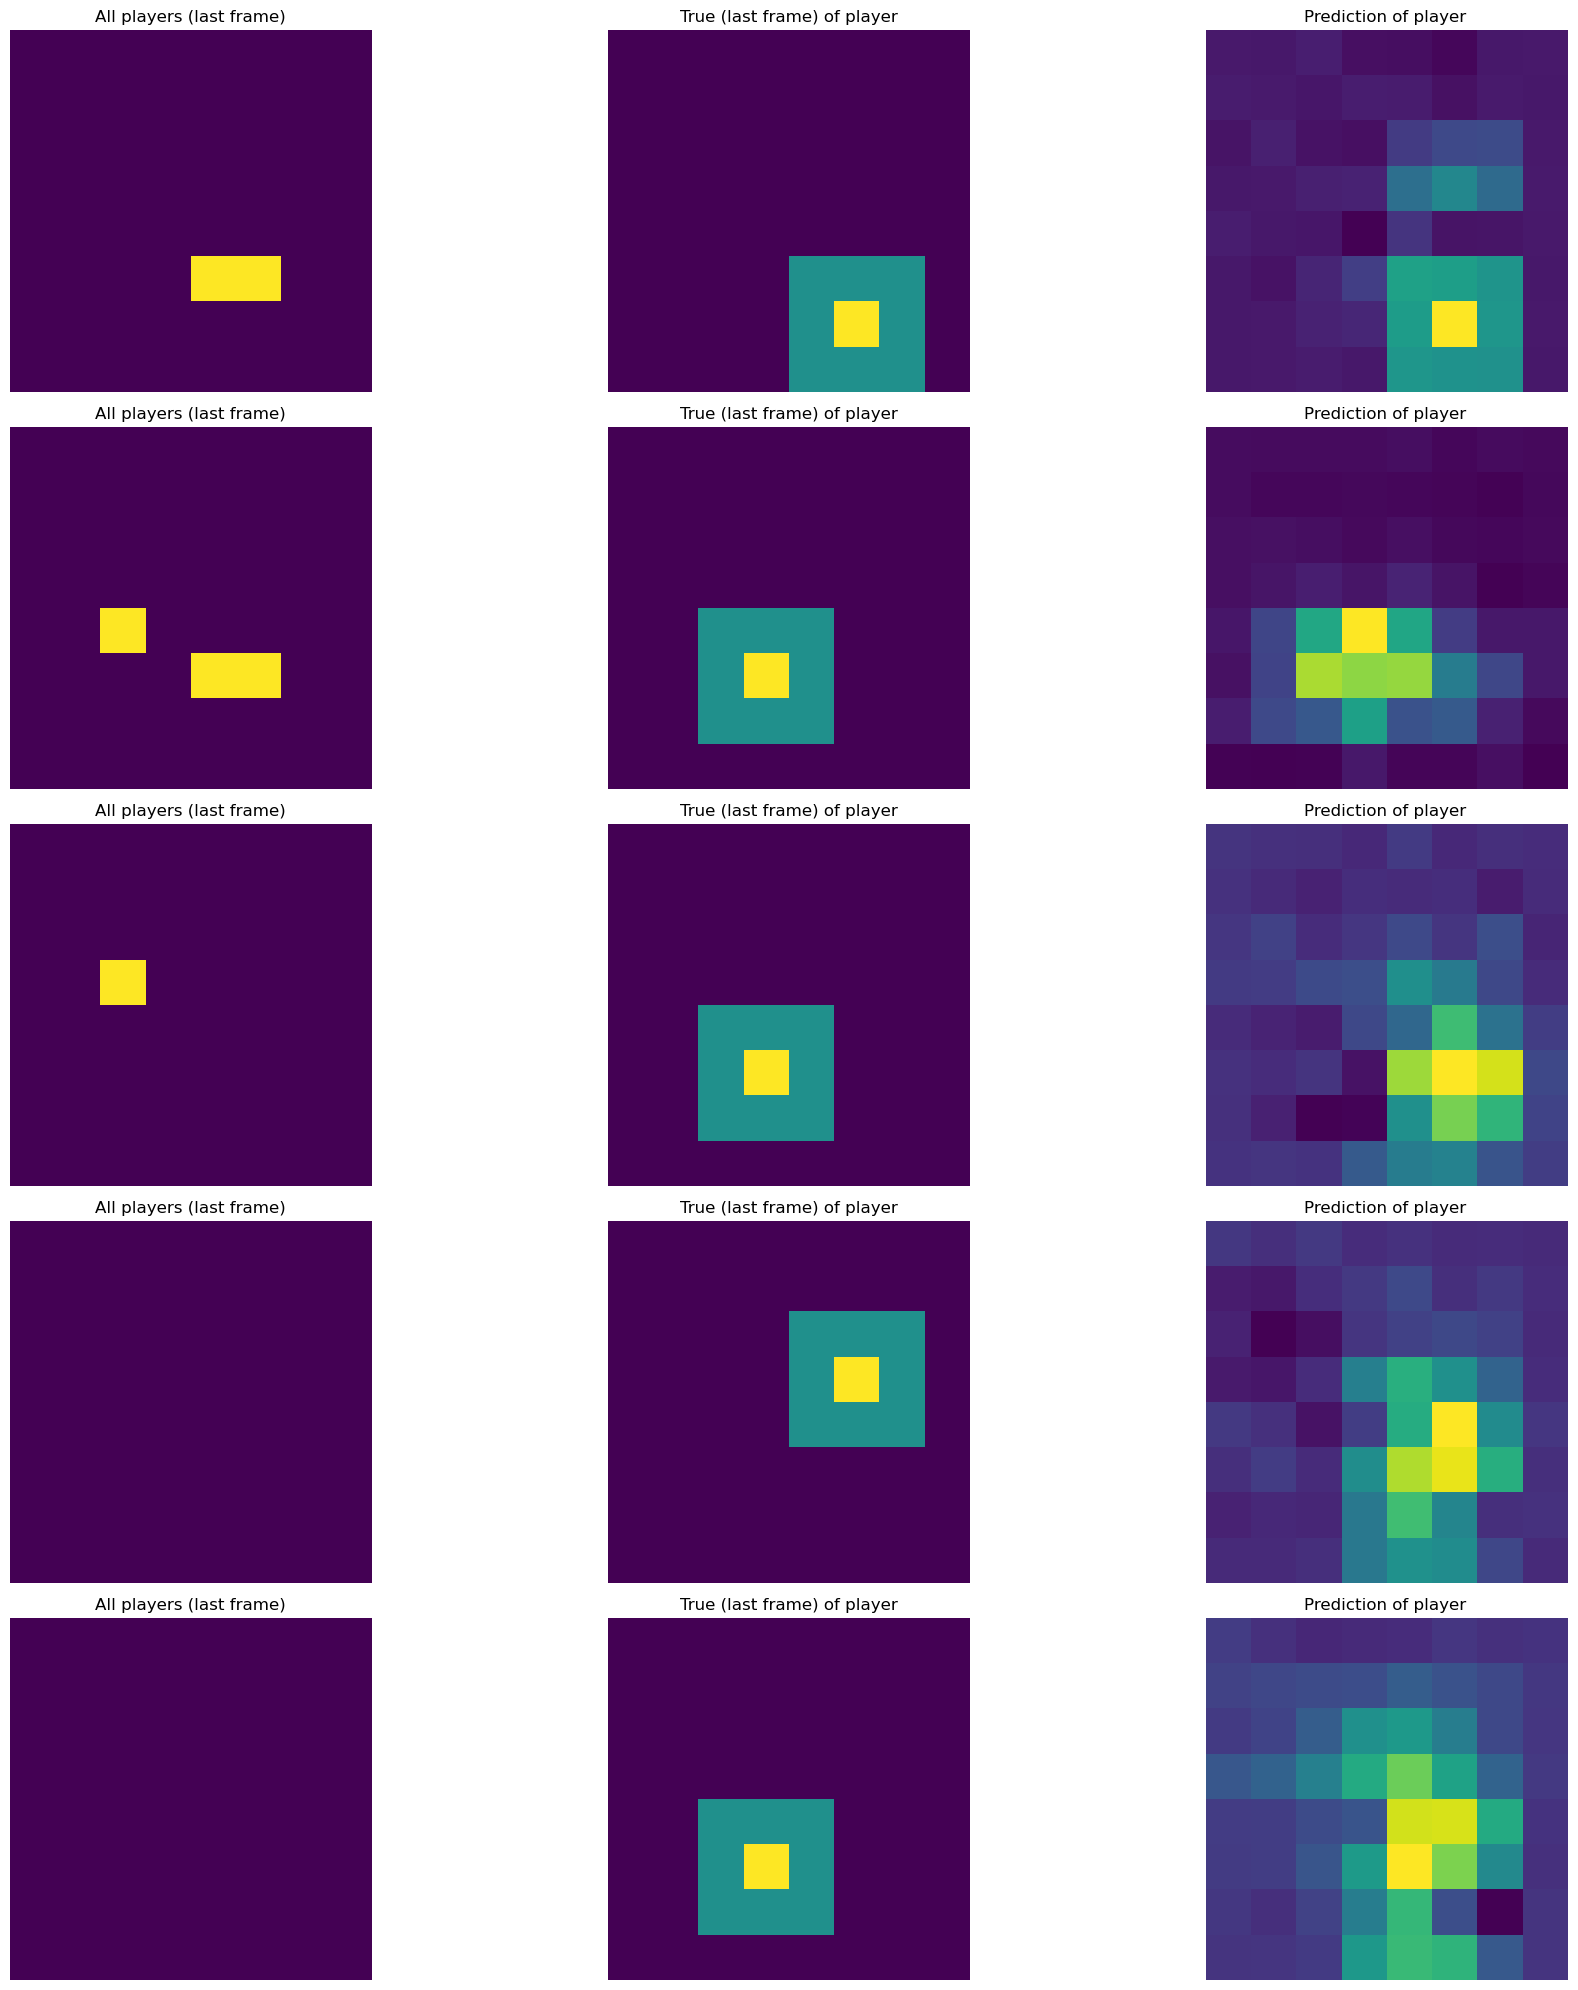

MODELO model0 - ESCENA Scene6
Epoch 1/50
39/39 [==============================] - 14s 226ms/step - loss: 0.0366 - mse: 0.0366 - mae: 0.1072 - val_loss: 0.0339 - val_mse: 0.0339 - val_mae: 0.1181
Epoch 2/50
39/39 [==============================] - 8s 205ms/step - loss: 0.0308 - mse: 0.0308 - mae: 0.1074 - val_loss: 0.0316 - val_mse: 0.0316 - val_mae: 0.1054
Epoch 3/50
39/39 [==============================] - 8s 205ms/step - loss: 0.0290 - mse: 0.0290 - mae: 0.1007 - val_loss: 0.0295 - val_mse: 0.0295 - val_mae: 0.1015
Epoch 4/50
39/39 [==============================] - 8s 205ms/step - loss: 0.0274 - mse: 0.0274 - mae: 0.0951 - val_loss: 0.0280 - val_mse: 0.0280 - val_mae: 0.0953
Epoch 5/50
39/39 [==============================] - 8s 206ms/step - loss: 0.0252 - mse: 0.0252 - mae: 0.0903 - val_loss: 0.0267 - val_mse: 0.0267 - val_mae: 0.0899
Epoch 6/50
39/39 [==============================] - 8s 206ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.0853 - val_loss: 0.0270 - val_mse: 0.0270 - v

4/4 [==============================] - 1s 76ms/step


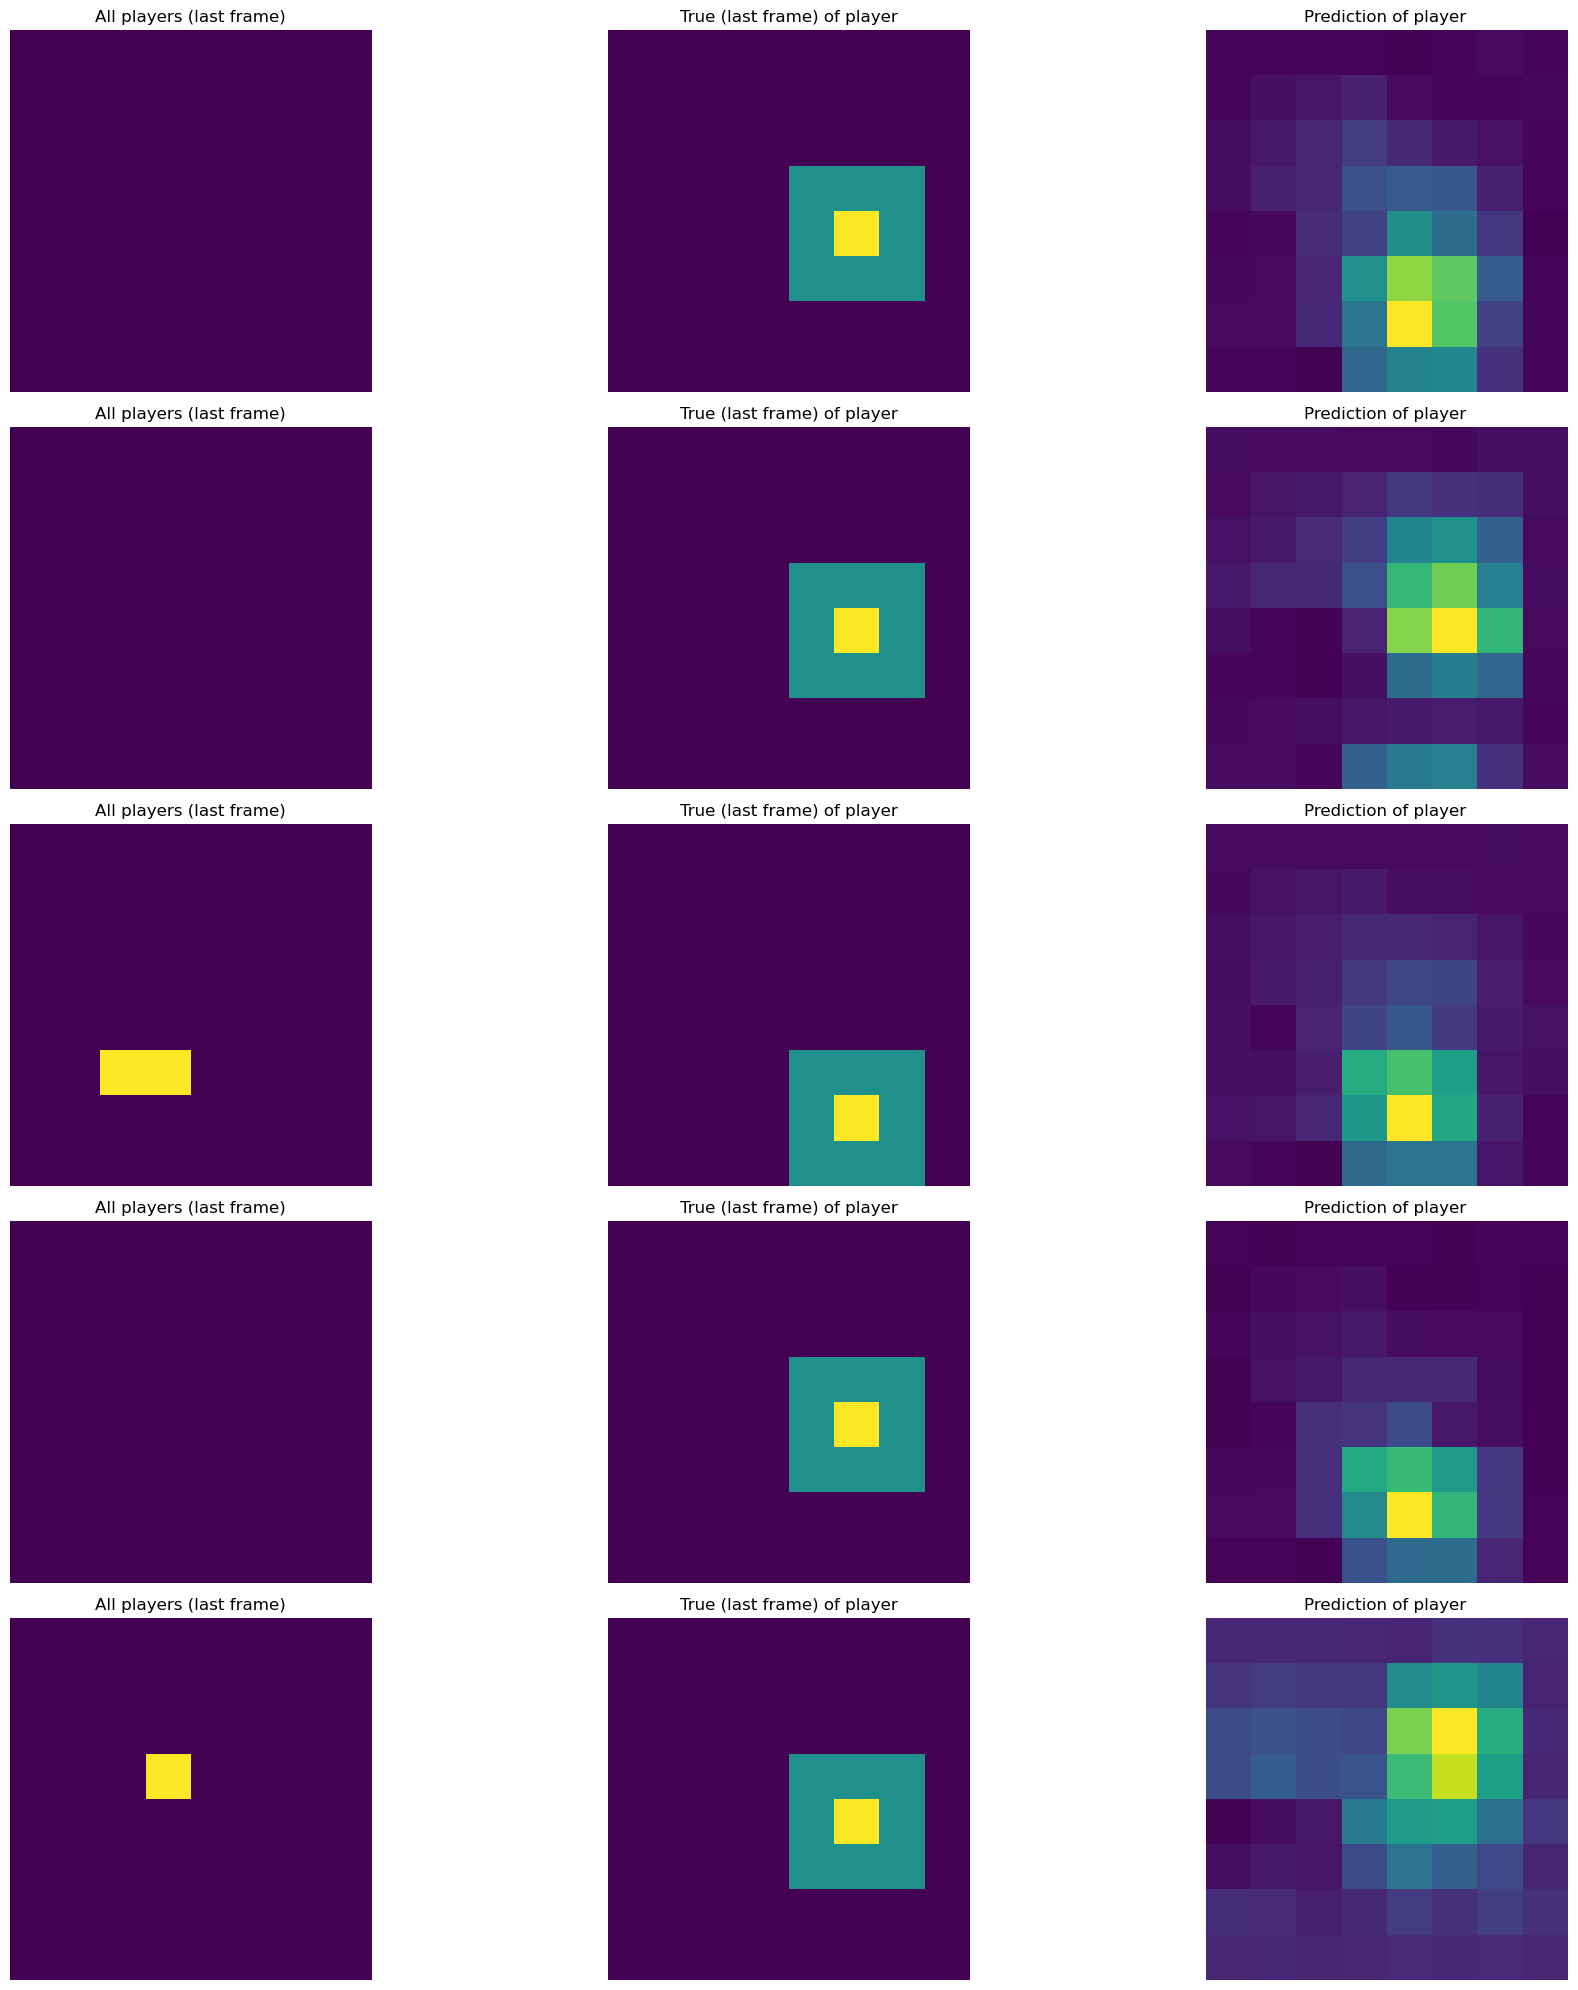

MODELO model1 - ESCENA Scene6
Epoch 1/50
39/39 [==============================] - 8s 152ms/step - loss: 0.0327 - mse: 0.0327 - mae: 0.0998 - val_loss: 0.0292 - val_mse: 0.0292 - val_mae: 0.0995
Epoch 2/50
39/39 [==============================] - 5s 136ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.0881 - val_loss: 0.0273 - val_mse: 0.0273 - val_mae: 0.0917
Epoch 3/50
39/39 [==============================] - 5s 138ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.0830 - val_loss: 0.0257 - val_mse: 0.0257 - val_mae: 0.0818
Epoch 4/50
39/39 [==============================] - 5s 138ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.0787 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.0855
Epoch 5/50
39/39 [==============================] - 5s 139ms/step - loss: 0.0220 - mse: 0.0220 - mae: 0.0794 - val_loss: 0.0257 - val_mse: 0.0257 - val_mae: 0.0855
Epoch 6/50
39/39 [==============================] - 5s 137ms/step - loss: 0.0215 - mse: 0.0215 - mae: 0.0774 - val_loss: 0.0244 - val_mse: 0.0244 - va

4/4 [==============================] - 1s 25ms/step


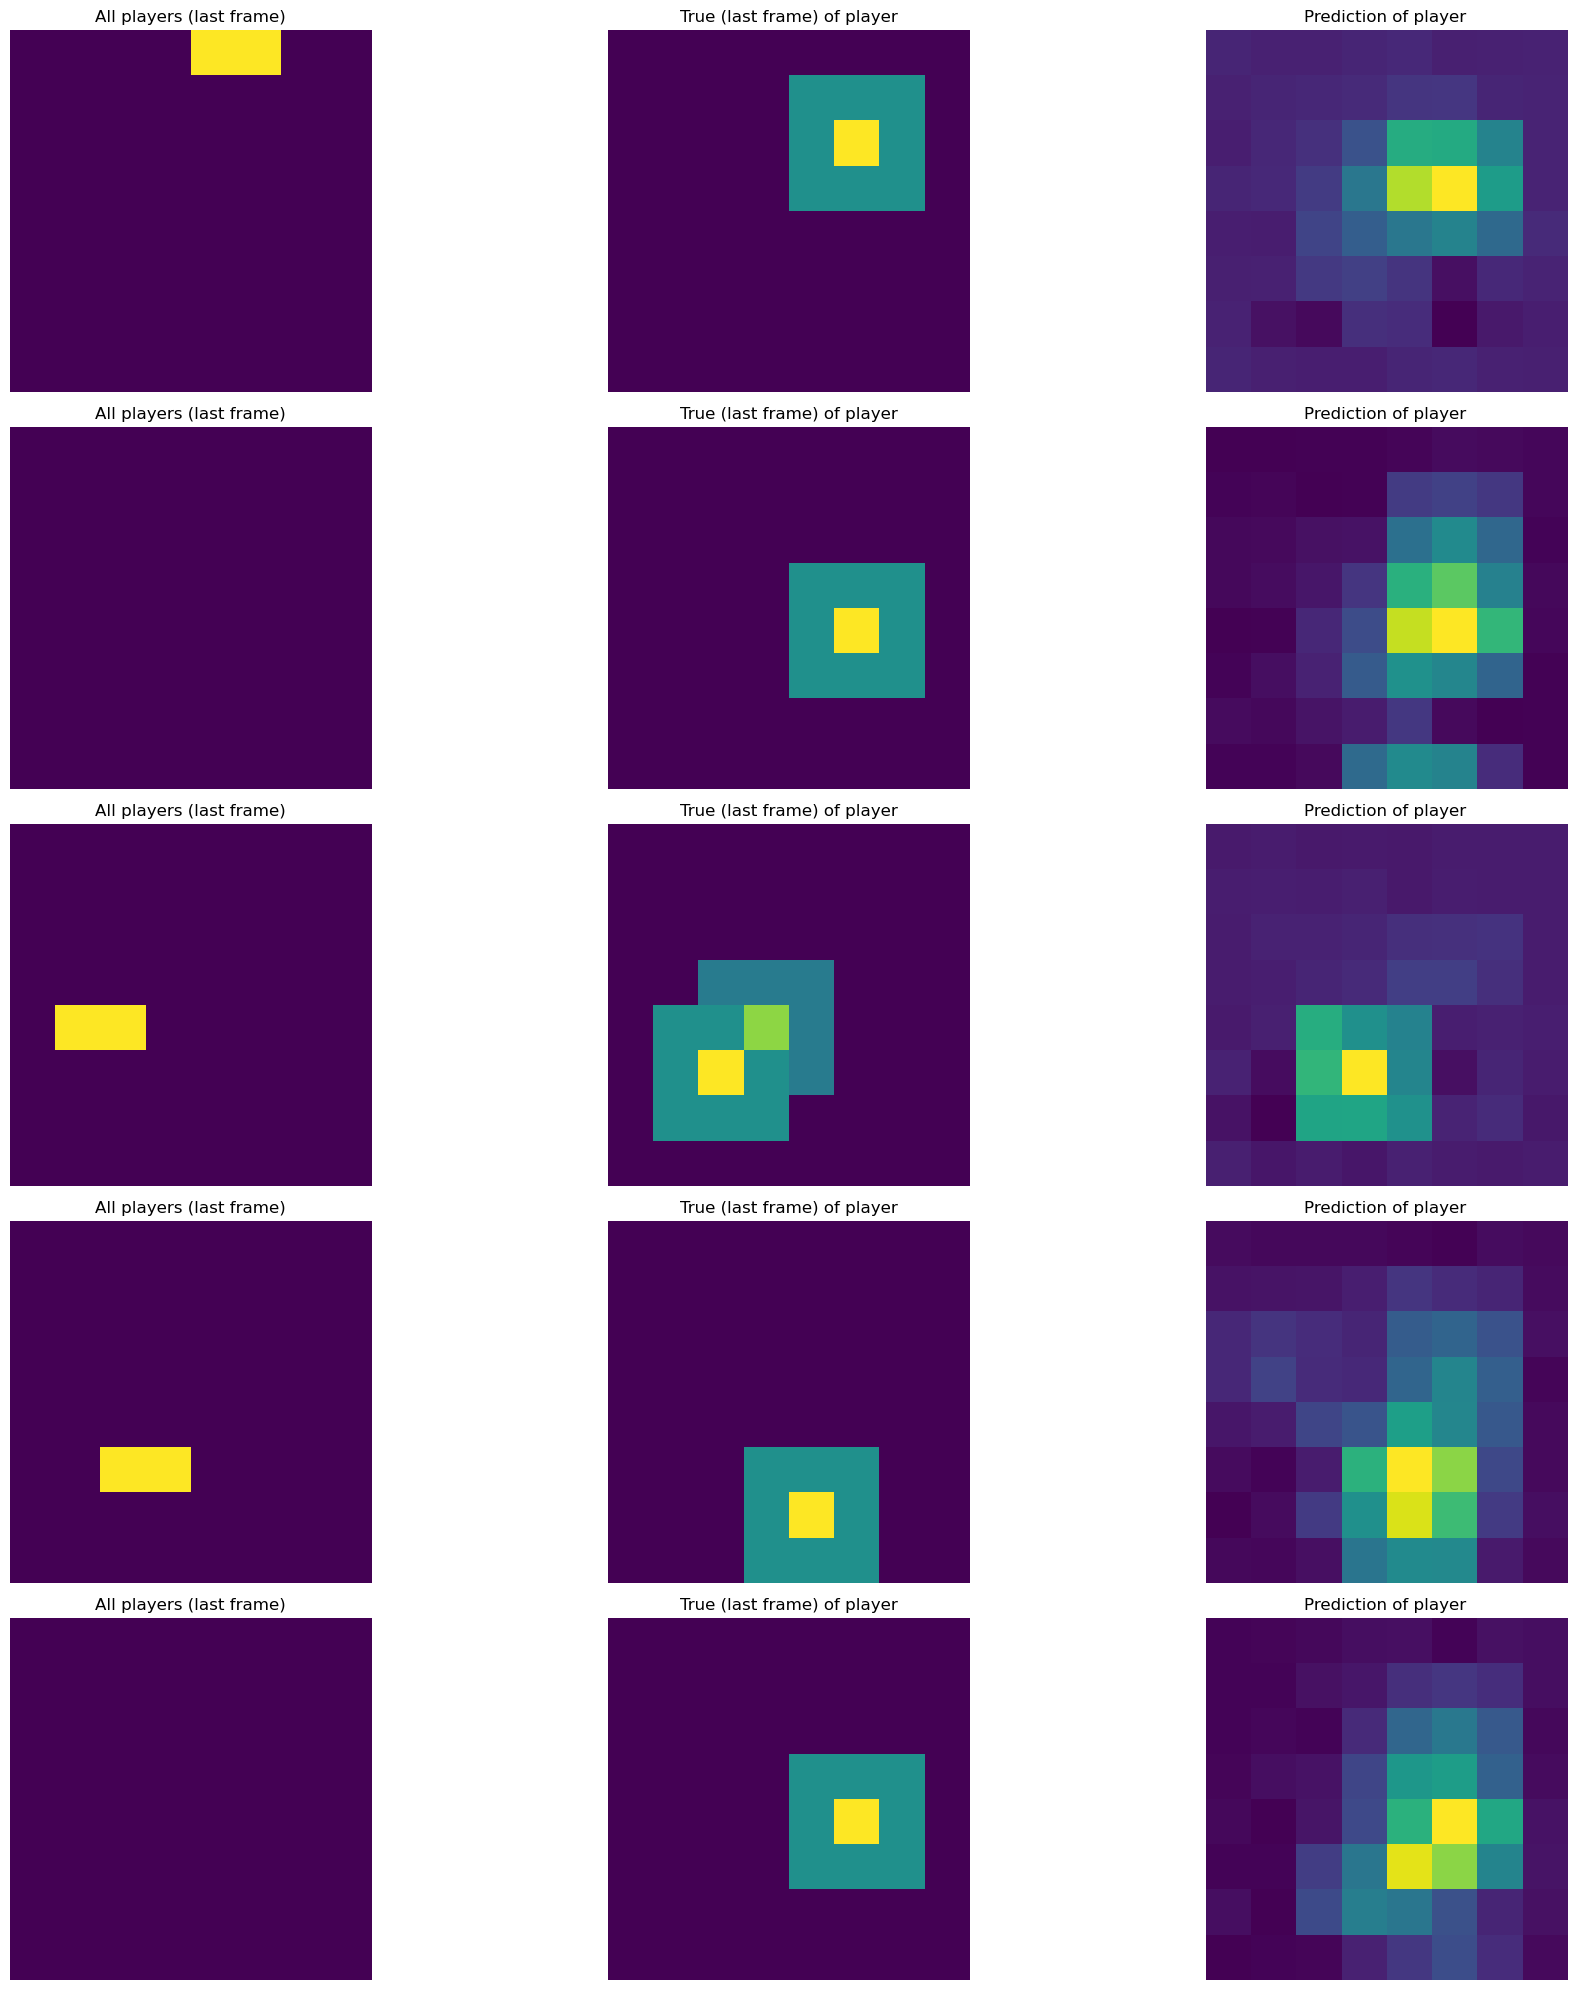

MODELO model2 - ESCENA Scene6
Epoch 1/50
39/39 [==============================] - 11s 237ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.0995 - val_loss: 0.0297 - val_mse: 0.0297 - val_mae: 0.1056
Epoch 2/50
39/39 [==============================] - 8s 215ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.0899 - val_loss: 0.0283 - val_mse: 0.0283 - val_mae: 0.0897
Epoch 3/50
39/39 [==============================] - 8s 218ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.0816 - val_loss: 0.0255 - val_mse: 0.0255 - val_mae: 0.0868
Epoch 4/50
39/39 [==============================] - 9s 219ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.0785 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.0880
Epoch 5/50
39/39 [==============================] - 8s 216ms/step - loss: 0.0215 - mse: 0.0215 - mae: 0.0781 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.0856
Epoch 6/50
39/39 [==============================] - 8s 217ms/step - loss: 0.0211 - mse: 0.0211 - mae: 0.0762 - val_loss: 0.0242 - val_mse: 0.0242 - v

4/4 [==============================] - 1s 86ms/step


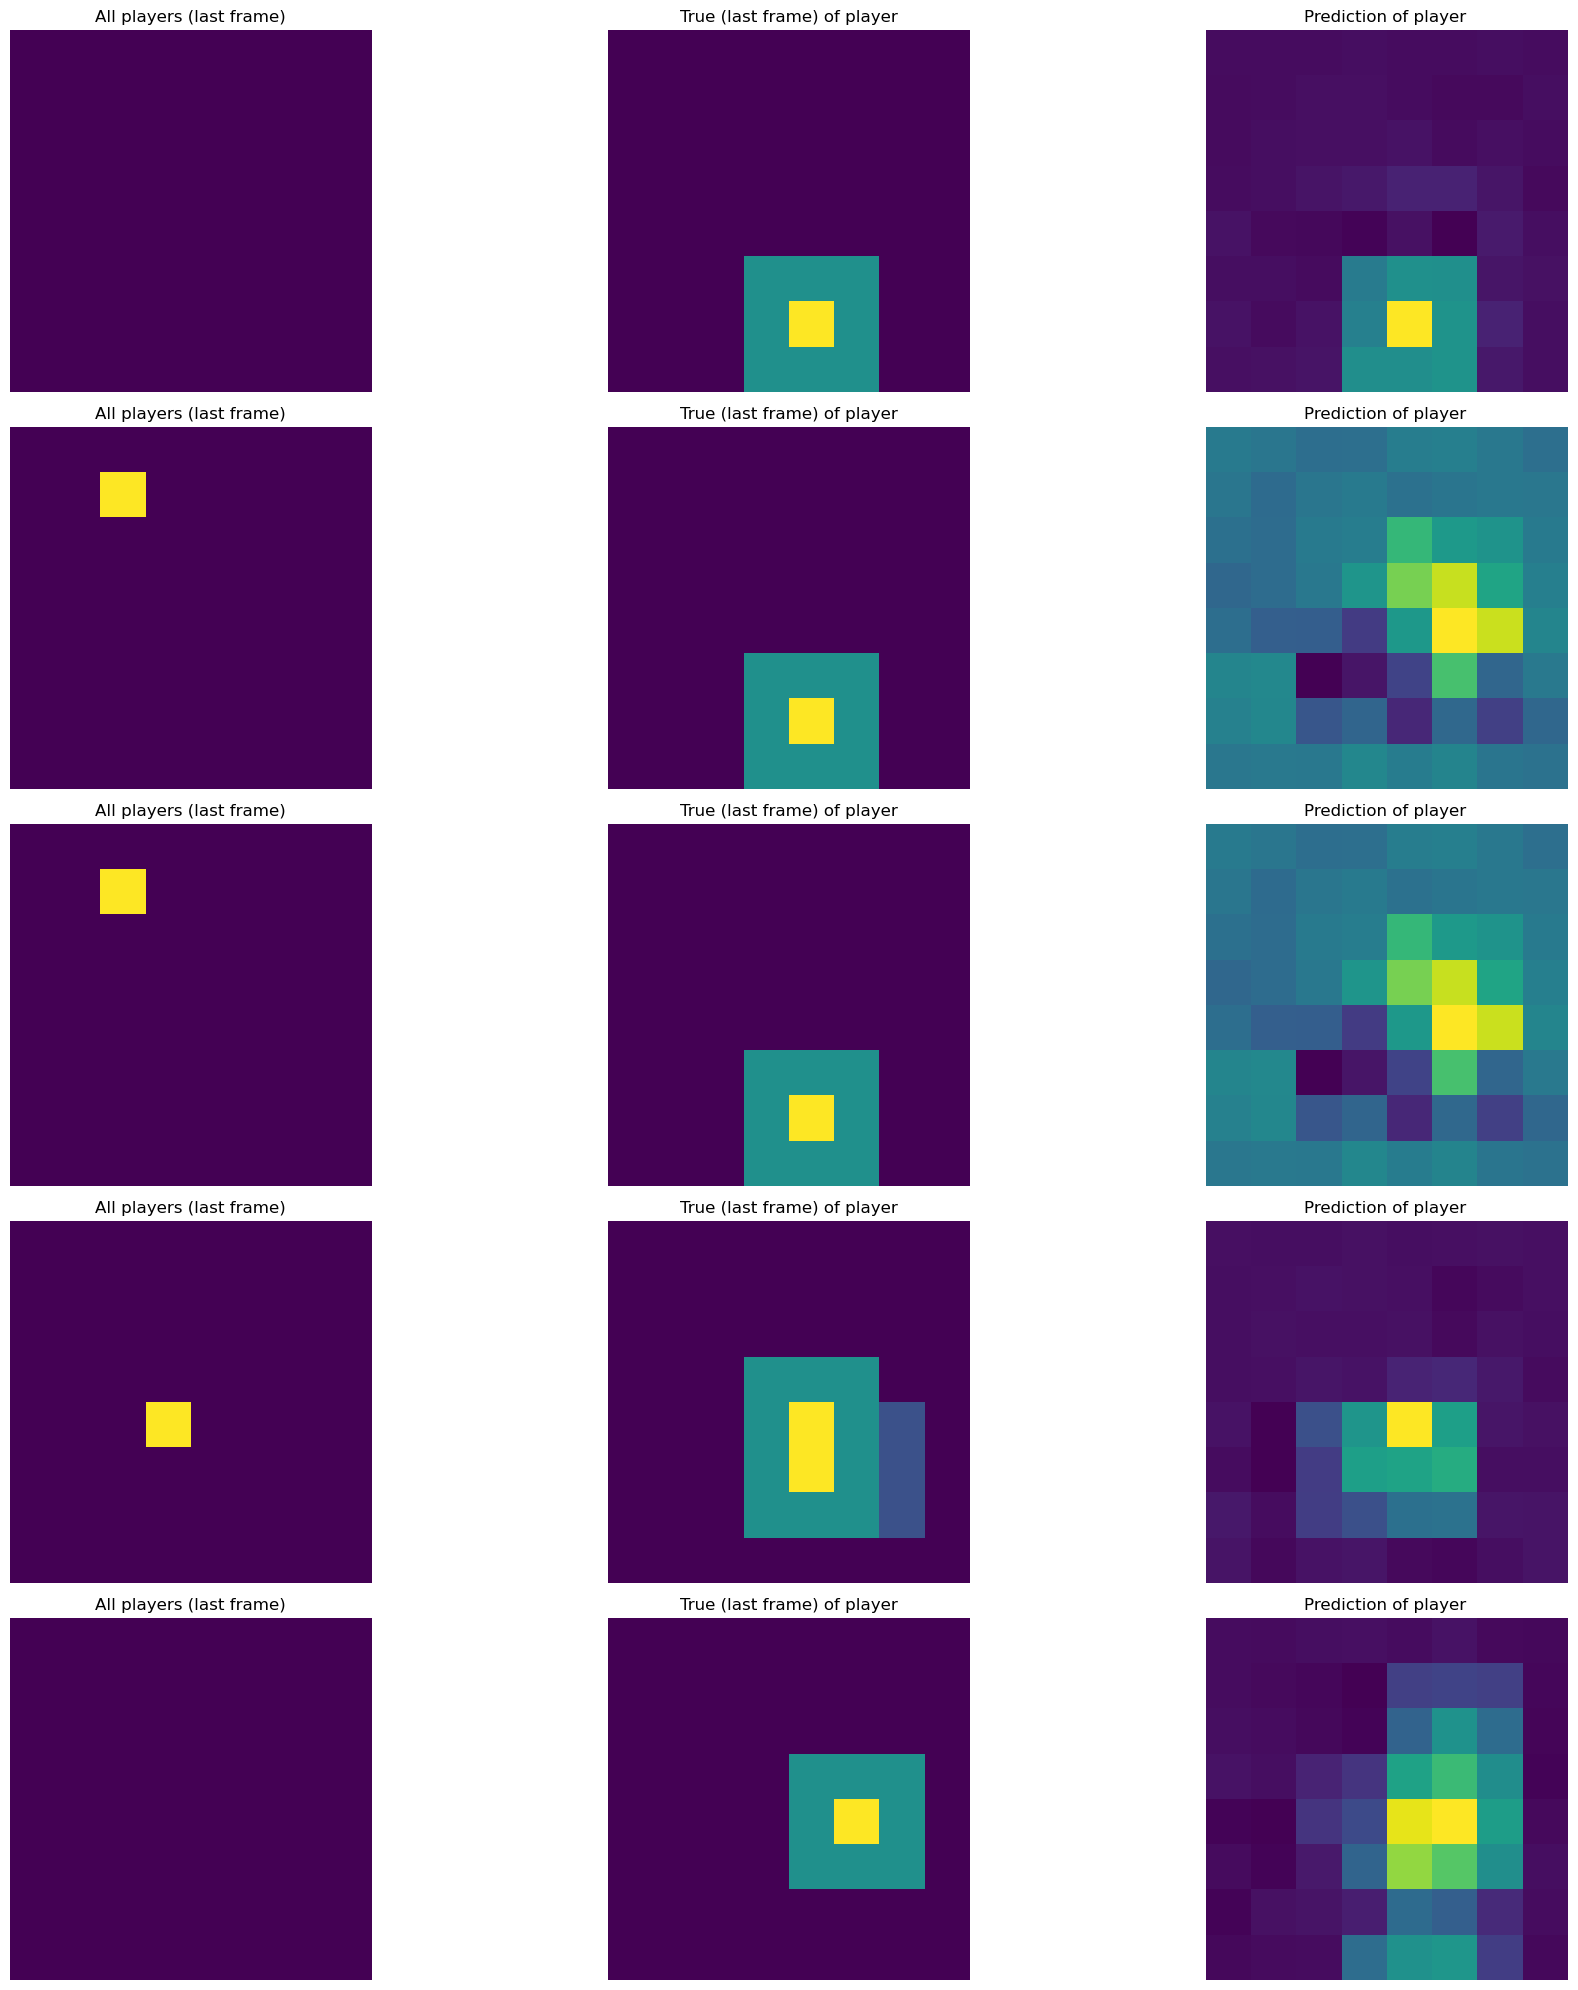

MODELO transf1 - ESCENA Scene6
Epoch 1/50
39/39 [==============================] - 90s 2s/step - loss: 0.0347 - mse: 0.0347 - mae: 0.1146 - val_loss: 0.0297 - val_mse: 0.0297 - val_mae: 0.1056
Epoch 2/50
39/39 [==============================] - 114s 3s/step - loss: 0.0268 - mse: 0.0268 - mae: 0.0970 - val_loss: 0.0281 - val_mse: 0.0281 - val_mae: 0.0922
Epoch 3/50
39/39 [==============================] - 104s 3s/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0896 - val_loss: 0.0281 - val_mse: 0.0281 - val_mae: 0.0887
Epoch 4/50
39/39 [==============================] - 105s 3s/step - loss: 0.0231 - mse: 0.0231 - mae: 0.0874 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.0868
Epoch 5/50
39/39 [==============================] - 104s 3s/step - loss: 0.0209 - mse: 0.0209 - mae: 0.0797 - val_loss: 0.0260 - val_mse: 0.0260 - val_mae: 0.0879
Epoch 6/50
39/39 [==============================] - 104s 3s/step - loss: 0.0204 - mse: 0.0204 - mae: 0.0779 - val_loss: 0.0255 - val_mse: 0.0255 - val_mae:

4/4 [==============================] - 6s 1s/step


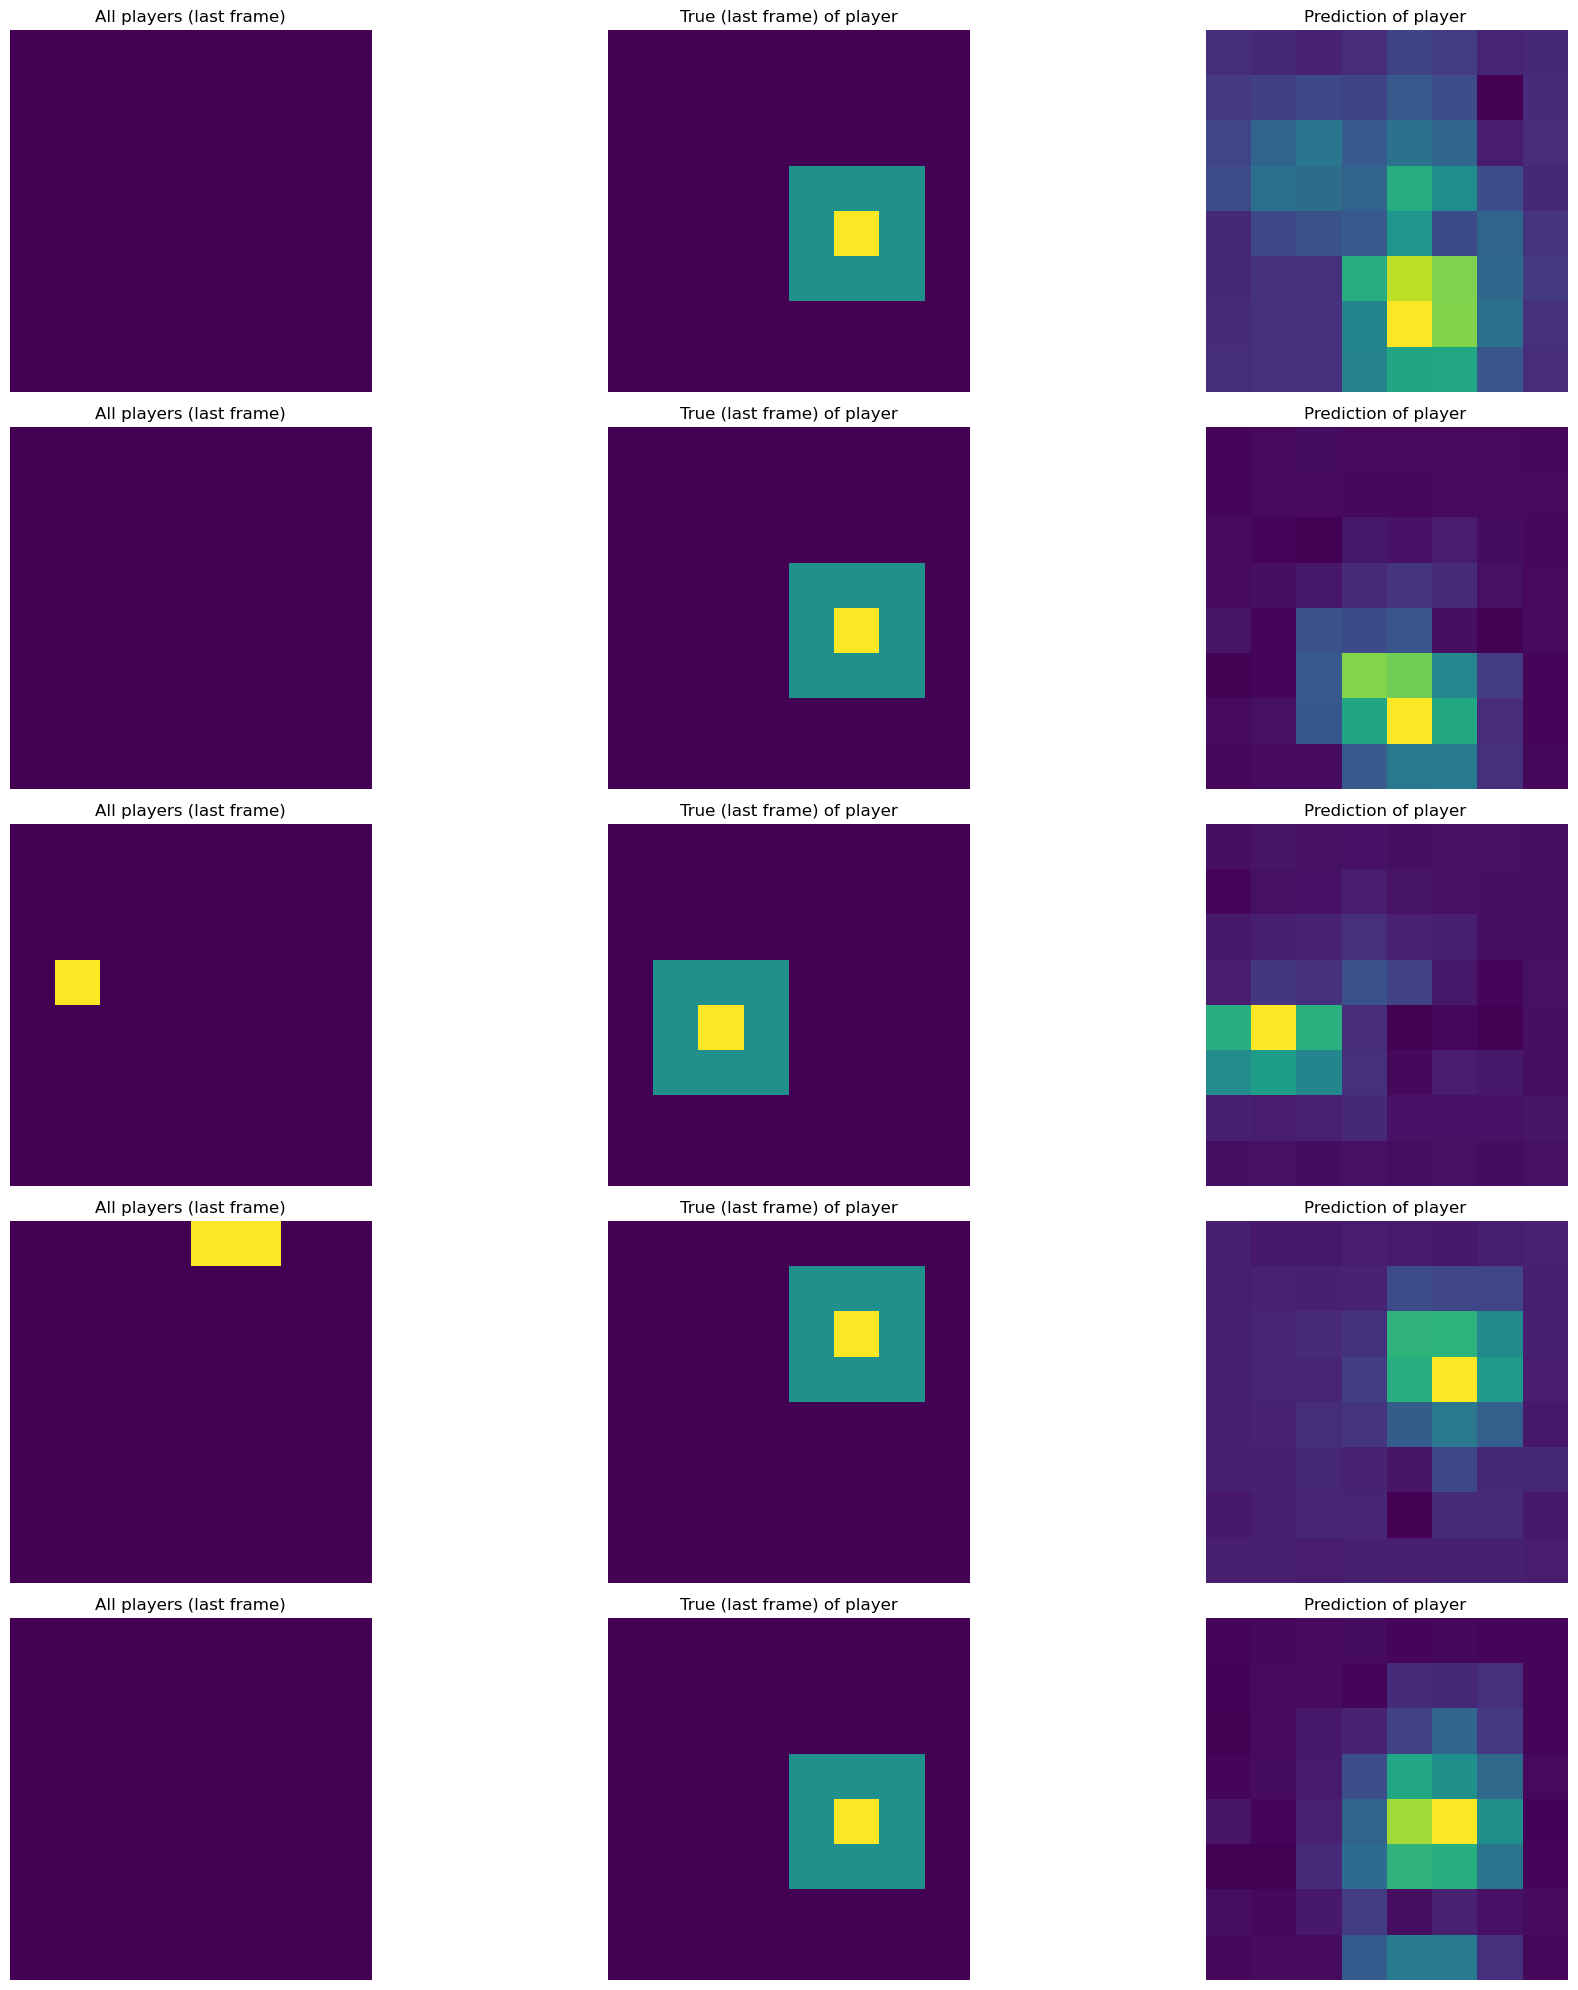

Resultados por escena:
Escena Scene1:
Modelo model0 - MSE: 0.0310, MAE: 0.0846, Tiempo: 58.14s
Modelo model1 - MSE: 0.0308, MAE: 0.0892, Tiempo: 35.82s
Modelo model2 - MSE: 0.0273, MAE: 0.0811, Tiempo: 85.03s
Modelo transf1 - MSE: 0.0320, MAE: 0.0867, Tiempo: 468.10s

Escena Scene2:
Modelo model0 - MSE: 0.0226, MAE: 0.0766, Tiempo: 277.01s
Modelo model1 - MSE: 0.0279, MAE: 0.0829, Tiempo: 131.22s
Modelo model2 - MSE: 0.0270, MAE: 0.0845, Tiempo: 192.69s
Modelo transf1 - MSE: 0.0258, MAE: 0.0795, Tiempo: 2739.66s

Escena Scene3:
Modelo model0 - MSE: 0.0231, MAE: 0.0804, Tiempo: 284.48s
Modelo model1 - MSE: 0.0263, MAE: 0.0827, Tiempo: 167.07s
Modelo model2 - MSE: 0.0262, MAE: 0.0799, Tiempo: 302.31s
Modelo transf1 - MSE: 0.0202, MAE: 0.0702, Tiempo: 2682.97s

Escena Scene4:
Modelo model0 - MSE: 0.0225, MAE: 0.0754, Tiempo: 385.65s
Modelo model1 - MSE: 0.0232, MAE: 0.0746, Tiempo: 248.61s
Modelo model2 - MSE: 0.0264, MAE: 0.0781, Tiempo: 410.51s
Modelo transf1 - MSE: 0.0226, MAE: 0.0713,

In [17]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss

# Assuming you have a function to calculate binary cross-entropy (log loss)
def binary_cross_entropy(y_true, y_pred):
    """
    Calcula la Binary Cross-Entropy (BCE) asegurando que y_true y y_pred sean válidos.
    Soporta etiquetas no binarias (soft labels).
    """
    # Asegurar que los valores de y_pred estén entre 0 y 1
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # Asegurar que los valores de y_true estén en el rango [0,1]
    y_true = np.clip(y_true, 0, 1)

    # Fórmula BCE: -(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))
    bce = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    return np.mean(bce)

np.random.seed(42)

# Lista de identificadores de modelo
model_ids = ["model0","model1","model2","transf1"] 


# Estructuras para almacenar resultados y tiempos de ejecución
mse_results = {model_id: [] for model_id in model_ids}
bce_results = {model_id: [] for model_id in model_ids} #binary cross entropy
mae_results = {model_id: [] for model_id in model_ids}
training_times = {model_id: [] for model_id in model_ids}
total_execution_time = {model_id: 0 for model_id in model_ids}

print(np.unique(S))

escenas_seleccionadas=np.unique(S)
#escenas_seleccionadas=escenas_seleccionadas[3:]
print("Para esta ejecución se han seleccionada las escenas: ")
print(escenas_seleccionadas)

for ixs, sc in enumerate(escenas_seleccionadas):
    # Índices para entrenamiento y prueba
    train_indices = np.where(S != sc)[0]
    test_indices = np.where(S == sc)[0]
    np.random.shuffle(train_indices)

    XYT_train = XYT[train_indices]
    rssiT_train = rssiT[train_indices]
    YT_train = YT[train_indices]

    XYT_test = XYT[test_indices]
    rssiT_test = rssiT[test_indices]
    YT_test = YT[test_indices]
    
    for model_id in model_ids:
        print(f"MODELO {model_id} - ESCENA {sc}")
        
        model = load_model(f"{model_id}.h5")

        start_time = time.time()

        history = model.fit([XYT_train, rssiT_train], YT_train,
                                  batch_size=16,
                                  validation_data=([XYT_test, rssiT_test], YT_test),
                                  epochs=50)
        end_time = time.time()
        training_time = end_time - start_time
        
        YT_prediction = model.predict([XYT_test, rssiT_test])

        plottingRandom(XYT_test, YT_test, YT_prediction)

        mse = mean_squared_error(YT_test.flatten(), YT_prediction.flatten())
        mae = mean_absolute_error(YT_test.flatten(), YT_prediction.flatten())
        bce = binary_cross_entropy(YT_test.flatten(), YT_prediction.flatten())

        mse_results[model_id].append(mse)
        mae_results[model_id].append(mae)
        bce_results[model_id].append(bce)
        
       
        training_times[model_id].append(training_time)
        total_execution_time[model_id] += training_time

# Calculando promedios y mostrando resultados

print("Resultados por escena:")
for i, sc in enumerate(escenas_seleccionadas):
    print(f"Escena {sc}:")
    for model_id in model_ids:
        print(f"Modelo {model_id} - MSE: {mse_results[model_id][i]:.4f}, MAE: {mae_results[model_id][i]:.4f}, Tiempo: {training_times[model_id][i]:.2f}s")
    print("")
    
print("RESUMEN RESULTADOS:")
for model_id in model_ids:
    average_mse = np.mean(mse_results[model_id])
    average_mae = np.mean(mae_results[model_id])
    average_bce = np.mean(bce_results[model_id])
    print(f"Modelo {model_id}:")
    print(f"Tiempo de ejecución total: {total_execution_time[model_id]:.2f} segundos")
    print(f"MSE promedio: {average_mse:.4f}")
    print(f"MAE promedio: {average_mae:.4f}\n")
    print(f"BCE promedio: {average_bce:.4f}\n")


In [18]:
ts.sort()
print(ts)

[1710615095, 1710615096, 1710615097, 1710615098, 1710615099, 1710615100, 1710615101, 1710615102, 1710615103, 1710615104, 1710615105, 1710615106, 1710615107, 1710615108, 1710615109, 1710615110, 1710615111, 1710615112, 1710615113, 1710615114, 1710615115, 1710615116, 1710615117, 1710615118, 1710615119, 1710615120, 1710615121, 1710615122, 1710615123, 1710615124, 1710615125, 1710615126, 1710615127, 1710615128, 1710615129, 1710615130, 1710615131, 1710615132, 1710615133, 1710615134, 1710615135, 1710615136, 1710615137, 1710615138, 1710615139, 1710615140, 1710615141, 1710615142, 1710615143, 1710615144, 1710615145, 1710615146, 1710615147, 1710615148, 1710615149, 1710615150, 1710615151, 1710615152, 1710615153, 1710615154, 1710615155, 1710615156, 1710615157, 1710615158, 1710615159, 1710615160, 1710615161, 1710615162, 1710615163, 1710615164, 1710615165, 1710615166, 1710615167, 1710615168, 1710615169, 1710615170, 1710615171, 1710615172, 1710615173, 1710615174, 1710615175, 1710615176, 1710615177, 171